# Сегментация пользователей банка

<font size="4"><b>О проекте:</b></font>

Отдел маркетинга регионального банка "Метанпром" проводит исследование клиентов банка с целью снижения критически возросшего оттока. В рамках этого исследования необходимо реализовать сегментацию клиентов с акцентом на признак оттока. На основе данной сегментации будут планироваться новые маркетинговые кампании, направленные на удержание клиентов.

Банк располагается в Ярославле и областных городах: Рыбинск и Ростов Великий.

***Цель проекта:*** *предложить возможные способы снижения оттока клиентов банка*

***Задачи:***
1. Провести исследовательский анализ данных
2. Сформировать сегменты пользователей
3. На основе полученных сегментов сформировать рекомендации для снижения оттока клиентов

<font size="4"><b>Описание данных:</b></font>

Датасет содержит данные о клиентах банка. Данные столбцов `score`, `equity` и `EST_SALARY` получены внешним источником.

* `USERID` — идентификатор пользователя;
* `score` — баллы кредитного скоринга;
* `city` — город;
* `gender` — пол;
* `edge` — возраст;
* `equity` — приблизительная оценка стоимости собственности клиента (в единицах специализированной шкалы);
* `balance` — баланс на счёте;
* `products` — количество продуктов, которыми пользуется клиент;
* `credit_card` — есть ли кредитная карта;
* `last_activity` — был ли клиент активен в последнее время (оценивается по любым действиям клиента);
* `EST_SALARY` — оценочный доход клиента в месяц;
* `churn` — признак оттока (признак, по которому нам достоверно известно, что клиент ушёл или собирается прекращать пользоваться услугами банка).



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о датасете</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Определение-функций" data-toc-modified-id="Определение-функций-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Определение функций</a></span><ul class="toc-item"><li><span><a href="#df_info()" data-toc-modified-id="df_info()-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span><code>df_info()</code></a></span></li><li><span><a href="#add_labels()" data-toc-modified-id="add_labels()-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span><code>add_labels()</code></a></span></li><li><span><a href="#pass_value_barh()" data-toc-modified-id="pass_value_barh()-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span><code>pass_value_barh()</code></a></span></li><li><span><a href="#get_dum()" data-toc-modified-id="get_dum()-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span><code>get_dum()</code></a></span></li><li><span><a href="#plot_hist()" data-toc-modified-id="plot_hist()-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span><code>plot_hist()</code></a></span></li><li><span><a href="#plot_pie()" data-toc-modified-id="plot_pie()-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span><code>plot_pie()</code></a></span></li><li><span><a href="#bar_plot()" data-toc-modified-id="bar_plot()-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span><code>bar_plot()</code></a></span></li><li><span><a href="#matr_corr()" data-toc-modified-id="matr_corr()-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span><code>matr_corr()</code></a></span></li><li><span><a href="#axline_plot()" data-toc-modified-id="axline_plot()-1.2.9"><span class="toc-item-num">1.2.9&nbsp;&nbsp;</span><code>axline_plot()</code></a></span></li><li><span><a href="#ratio_table()" data-toc-modified-id="ratio_table()-1.2.10"><span class="toc-item-num">1.2.10&nbsp;&nbsp;</span><code>ratio_table()</code></a></span></li><li><span><a href="#churn_ratio_per_category()" data-toc-modified-id="churn_ratio_per_category()-1.2.11"><span class="toc-item-num">1.2.11&nbsp;&nbsp;</span><code>churn_ratio_per_category()</code></a></span></li><li><span><a href="#two_req_check()" data-toc-modified-id="two_req_check()-1.2.12"><span class="toc-item-num">1.2.12&nbsp;&nbsp;</span><code>two_req_check()</code></a></span></li><li><span><a href="#segment_character()" data-toc-modified-id="segment_character()-1.2.13"><span class="toc-item-num">1.2.13&nbsp;&nbsp;</span><code>segment_character()</code></a></span></li></ul></li><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая информация</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-названий-столбцов" data-toc-modified-id="Преобразование-названий-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование названий столбцов</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Преобразование-датасета" data-toc-modified-id="Преобразование-датасета-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Преобразование датасета</a></span><ul class="toc-item"><li><span><a href="#Добавление-группы-возраста" data-toc-modified-id="Добавление-группы-возраста-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Добавление группы возраста</a></span></li><li><span><a href="#Добавление-групп-кредитного-скоринга" data-toc-modified-id="Добавление-групп-кредитного-скоринга-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Добавление групп кредитного скоринга</a></span></li><li><span><a href="#Кодировка-категориальных-переменных" data-toc-modified-id="Кодировка-категориальных-переменных-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Кодировка категориальных переменных</a></span></li></ul></li><li><span><a href="#Анализ-аномалий" data-toc-modified-id="Анализ-аномалий-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ аномалий</a></span><ul class="toc-item"><li><span><a href="#uid" data-toc-modified-id="uid-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span><code>uid</code></a></span></li><li><span><a href="#score" data-toc-modified-id="score-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span><code>score</code></a></span></li><li><span><a href="#city" data-toc-modified-id="city-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span><code>city</code></a></span></li><li><span><a href="#gender" data-toc-modified-id="gender-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span><code>gender</code></a></span></li><li><span><a href="#age" data-toc-modified-id="age-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span><code>age</code></a></span></li><li><span><a href="#equity" data-toc-modified-id="equity-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span><code>equity</code></a></span></li><li><span><a href="#balance" data-toc-modified-id="balance-2.5.7"><span class="toc-item-num">2.5.7&nbsp;&nbsp;</span><code>balance</code></a></span></li><li><span><a href="#products" data-toc-modified-id="products-2.5.8"><span class="toc-item-num">2.5.8&nbsp;&nbsp;</span><code>products</code></a></span></li><li><span><a href="#est_salary" data-toc-modified-id="est_salary-2.5.9"><span class="toc-item-num">2.5.9&nbsp;&nbsp;</span><code>est_salary</code></a></span></li></ul></li><li><span><a href="#Изменение-типов-столбцов" data-toc-modified-id="Изменение-типов-столбцов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Изменение типов столбцов</a></span></li><li><span><a href="#Итог-предобработки" data-toc-modified-id="Итог-предобработки-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Итог предобработки</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Портрет-клиента" data-toc-modified-id="Портрет-клиента-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Портрет клиента</a></span><ul class="toc-item"><li><span><a href="#Основной-город" data-toc-modified-id="Основной-город-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Основной город</a></span></li><li><span><a href="#Пол" data-toc-modified-id="Пол-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Пол</a></span></li><li><span><a href="#Возраст" data-toc-modified-id="Возраст-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Возраст</a></span></li><li><span><a href="#Среднее-количество-используемых-услуг" data-toc-modified-id="Среднее-количество-используемых-услуг-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Среднее количество используемых услуг</a></span></li><li><span><a href="#Ежемесячный-доход" data-toc-modified-id="Ежемесячный-доход-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Ежемесячный доход</a></span></li><li><span><a href="#Средняя-оценка-собственности" data-toc-modified-id="Средняя-оценка-собственности-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Средняя оценка собственности</a></span></li><li><span><a href="#Баланс-на-счетах-банка-среднестатистического-клиента" data-toc-modified-id="Баланс-на-счетах-банка-среднестатистического-клиента-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Баланс на счетах банка среднестатистического клиента</a></span></li><li><span><a href="#Средний-кредитный-балл" data-toc-modified-id="Средний-кредитный-балл-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Средний кредитный балл</a></span></li><li><span><a href="#Количество-клиентов,-пользующихся-кредитной-картой" data-toc-modified-id="Количество-клиентов,-пользующихся-кредитной-картой-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Количество клиентов, пользующихся кредитной картой</a></span></li><li><span><a href="#Полученные-особенности-среднестатистического-клиента-банка" data-toc-modified-id="Полученные-особенности-среднестатистического-клиента-банка-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>Полученные особенности среднестатистического клиента банка</a></span></li></ul></li><li><span><a href="#Углубленный-анализ-групп-клиентов" data-toc-modified-id="Углубленный-анализ-групп-клиентов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Углубленный анализ групп клиентов</a></span><ul class="toc-item"><li><span><a href="#Особенности-клиентов-разного-пола" data-toc-modified-id="Особенности-клиентов-разного-пола-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Особенности клиентов разного пола</a></span></li><li><span><a href="#Особенности-клиентов-разных-возрастных-категорий" data-toc-modified-id="Особенности-клиентов-разных-возрастных-категорий-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Особенности клиентов разных возрастных категорий</a></span></li><li><span><a href="#Особеннности-клиентов-разных-городов" data-toc-modified-id="Особеннности-клиентов-разных-городов-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Особеннности клиентов разных городов</a></span></li><li><span><a href="#Особенности-клиентов-владельцев-кредитной-карты" data-toc-modified-id="Особенности-клиентов-владельцев-кредитной-карты-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Особенности клиентов-владельцев кредитной карты</a></span></li><li><span><a href="#Особенности-клиентов-в-зависимости-от-количества-приобретенных-продуктов" data-toc-modified-id="Особенности-клиентов-в-зависимости-от-количества-приобретенных-продуктов-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Особенности клиентов в зависимости от количества приобретенных продуктов</a></span></li><li><span><a href="#Особенности-клиентов-в-зависимости-от-оценки-их-имущества" data-toc-modified-id="Особенности-клиентов-в-зависимости-от-оценки-их-имущества-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Особенности клиентов в зависимости от оценки их имущества</a></span></li><li><span><a href="#Особенности-клиентов-в-зависимости-от-их-дохода" data-toc-modified-id="Особенности-клиентов-в-зависимости-от-их-дохода-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>Особенности клиентов в зависимости от их дохода</a></span></li><li><span><a href="#Особенности-клиентов-в-зависимости-от-их-кредитного-скоринга." data-toc-modified-id="Особенности-клиентов-в-зависимости-от-их-кредитного-скоринга.-3.2.8"><span class="toc-item-num">3.2.8&nbsp;&nbsp;</span>Особенности клиентов в зависимости от их кредитного скоринга.</a></span></li></ul></li><li><span><a href="#Исследование-оттока" data-toc-modified-id="Исследование-оттока-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование оттока</a></span><ul class="toc-item"><li><span><a href="#Портрет-уходящего-клиента" data-toc-modified-id="Портрет-уходящего-клиента-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Портрет уходящего клиента</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Формирование-выборок" data-toc-modified-id="Формирование-выборок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Формирование выборок</a></span></li><li><span><a href="#Выбор-методов-статистического-теста" data-toc-modified-id="Выбор-методов-статистического-теста-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выбор методов статистического теста</a></span><ul class="toc-item"><li><span><a href="#Для-первой-гипотезы" data-toc-modified-id="Для-первой-гипотезы-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Для первой гипотезы</a></span></li><li><span><a href="#Для-второй-гипотезы" data-toc-modified-id="Для-второй-гипотезы-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Для второй гипотезы</a></span></li></ul></li><li><span><a href="#Статистические-тесты" data-toc-modified-id="Статистические-тесты-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Статистические тесты</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы-№1" data-toc-modified-id="Проверка-гипотезы-№1-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Проверка гипотезы №1</a></span></li><li><span><a href="#Проверка-гипотезы-№2" data-toc-modified-id="Проверка-гипотезы-№2-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Проверка гипотезы №2</a></span><ul class="toc-item"><li><span><a href="#Проверка-по-всем-данным" data-toc-modified-id="Проверка-по-всем-данным-4.3.2.1"><span class="toc-item-num">4.3.2.1&nbsp;&nbsp;</span>Проверка по всем данным</a></span></li></ul></li><li><span><a href="#Проверка-по-данным-среднестатистических-клиентов" data-toc-modified-id="Проверка-по-данным-среднестатистических-клиентов-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Проверка по данным среднестатистических клиентов</a></span></li></ul></li></ul></li><li><span><a href="#Сегментация-клиентов" data-toc-modified-id="Сегментация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сегментация клиентов</a></span><ul class="toc-item"><li><span><a href="#Отбор-признаков-для-сегментации" data-toc-modified-id="Отбор-признаков-для-сегментации-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Отбор признаков для сегментации</a></span></li><li><span><a href="#Формирование-сегментов" data-toc-modified-id="Формирование-сегментов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Формирование сегментов</a></span></li><li><span><a href="#Характеризация-сегментов" data-toc-modified-id="Характеризация-сегментов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Характеризация сегментов</a></span><ul class="toc-item"><li><span><a href="#Сегмент-1" data-toc-modified-id="Сегмент-1-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Сегмент 1</a></span></li><li><span><a href="#Сегмент-2" data-toc-modified-id="Сегмент-2-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Сегмент 2</a></span></li><li><span><a href="#Сегмент-3" data-toc-modified-id="Сегмент-3-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Сегмент 3</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Выводы-исследовательского-анализа" data-toc-modified-id="Выводы-исследовательского-анализа-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выводы исследовательского анализа</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Рекомендации</a></span></li><li><span><a href="#Визуализация-результатов" data-toc-modified-id="Визуализация-результатов-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Визуализация результатов</a></span></li></ul></li></ul></div>

## Общая информация о датасете

### Загрузка данных

In [1]:
# импортируем все необходимые библиотеки

import re
import math as mth
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from plotly import graph_objects as go


In [2]:
# загрузка данных

data_raw = pd.read_csv('/datasets/bank_scrooge.csv')


### Определение функций

- `df_info()` - для вывода общей информации о данных;
- `add_labels()` - для добавления числовых значений в графиках-рейтингах;
- `pass_value_barh()` - для подсчета пропусков в столбцах;
- `get_dum()` - функция для кодировки категориальных переменных;
- `plot_hist()` - функция для построения гистограмм;
- `plot_pie()` - функция для отрисовки круговых диаграмм;
- `bar_plot()` - для отрисовки столбчатых диаграмм;
- `matr_corr()` - построение корреляционных матриц;
- `axline_plot()` - для отрисовки горизонтальных линий на графиках;
- `ratio_table()` - построение таблиц с расчетом доли клиентов по категориям;
- `churn_ratio_per_category()` - построение столбчатых диаграмм по категориям с расчетом доли отточных;
- `two_req_check()` - проверка выполнения требований для сегментации;
- `segment_character()` - получение основных характеристик сегмента.

#### `df_info()`

In [3]:
# введём функцию, позволяющую вывести общую информацию о данных

def df_info(df, figsize=(14, 10)):
    
    """Вывод общей информации о данных

    df - датасет,
    figsize - размер гистограмм
    """
    
    print('Вид данных:')
    display(df.head())
    
    print()
    print('Общая информация о данных:')
    print()
    df.info()
    
    # Создадим список булева типа, чтобы выбрать поля, не являющиеся координатами
    cond = []
    for col in df.columns:
        if col == 'uid':
            cond.append(False)
        else:
            cond.append(True)
    
    # Построим гистограммы для тех числовых полей, которые не являются идентификаторами, если такие есть в датасете
    if len(df.loc[:, cond].select_dtypes(include=['int64', 'float64']).columns) != 0:
        print()
        print('Распределения числовых величин в данных:')
        df.loc[:, cond].hist(figsize=figsize, color='SteelBlue', grid=False, bins=60);


#### `add_labels()`

In [4]:
# добавление числовых значений на графиках-рейтингах (типа barh)
def add_labels(x, y, score=1, inter=0, percent=False, color='white'):
    
    """Функция добавляет подписи значений для графиков типа barh.
    
    Принимаемые параметры:
    х - названия категорий
    у - список значений параметра для каждой категории
    score - число для корректировки положения надписи относительно длины столбца: score умножается на значение параметра,
            например, если длина столбца - 20, a score=1/2, то подпись к этому столбцу будет расположена посередине столбца
    inter - число для корректировки положения надписи относительно длины столбца: добавляет к положению, определенному
            с помощью score сдвиг по оси Ох
    percent - когда True: добавляет значение доли данной категории относительно всех изображенных на графике,
              например, если всего 2 категории cat1 = 700, cat2=300, то подпишет, что доля cat1 = 70%, а доля cat2=30%
    color - цвет подписи значения столбца, не влияет на цвет подписи доли катигории (цвет доли всегда чёрный)
    """
    # для каждой категории 
    for i in range(len(x)):
        plt.text(
            y[i] * score + inter, # положение по оси Ох
            i,                    # положение по оси Оу 
            y[i],                 # отображаемое значение (значение столбца)
            ha = 'center', size=14, va='center', color=color, fontweight='bold' # форматирование выводимого текста
        )
        
        # выводим, если нужны доли категории относительно всех выведенных на графике
        if percent:
            plt.text(y[i] + y.max()/10, i, f'{round(y[i] / y.sum() * 100, 2)}%', 
                     ha = 'center', size=14, va='center', color='black')

#### `pass_value_barh()`

In [5]:
# посмотрим долю пропущенных значений в столбцах
def pass_value_barh(df):
    
    """Функция выводит долю пропущенных значений по столбцам.
    
    Принимаемые параметры:
    df - исследуемый датасет
    """
    
    # выделим пространство под график
    fig = plt.figure(figsize=(11,4))
    fig.suptitle('Доля пропусков в столбцах' + "\n", fontsize=18)
    fig.add_subplot(111)
    
    # группируем информацию
    df = (
        (df.isna().mean()*100)              # даёт долю пропущенных значений от всего датасета
        .to_frame()                         # чтобы работать как с DataFrame
        .rename(columns = {0:'ratio'})
        .query('ratio > 0')                 # рассмотрим только столбцы с пропущенными значениями
        .sort_values(by = 'ratio', ascending = True)
    )
    
    # построим график
    (
        plt
        .barh( 
            y=df.index,
            width=df['ratio'],
            color='SteelBlue',
            height=0.5
        )
    )
    
    # редактируем подписи
    plt.xlabel('Доля в столбце, %', fontsize=14)
    plt.yticks(fontsize=14)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    add_labels(df.index, df['ratio'], score=1, inter=1, color='black')

#### `get_dum()`

In [6]:
# функция для кодировки категориальных переменных
def get_dum(df, col):
    
    """Функция для кодировки категориальных переменных
    
    Принимаемые параметры:
    df - исследуемый датасет
    col - столбец датасета, значения которого надо закодировать
    """
    
    dummed = df[col]
    dummed = pd.get_dummies(df, columns=[col])
    dummed = dummed.loc[:, dummed.columns.str.find(col) != -1]
    
    return dummed

#### `plot_hist()`

In [7]:
# ф-ция для построения гистограмм

def plot_hist(df, col, title, xlabel='col', ylabel='Частота', bins=100):
    fig = plt.figure(figsize=(7, 5))
    df[col].hist(bins=bins)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12);

#### `plot_pie()`

In [8]:
def plot_pie(df, col, title, labels=None):
    
    if labels == None:
        (
            df
            .groupby(col)
            .agg('count')['uid']
            .sort_values()
            .plot(
                kind='pie', 
                colors = sns.color_palette('Set2'),
                ylabel='',
                autopct='%1.0f%%',
                textprops={'fontsize':14},
                title=title
            )
        )
    else:
        (
            df
            .groupby(col)
            .agg('count')['uid']
            .sort_values()
            .plot(
                kind='pie', 
                colors = sns.color_palette('Set2'),
                ylabel='',
                autopct='%1.0f%%',
                textprops={'fontsize':14},
                labels=labels,
                title=title
            )
        )

#### `bar_plot()`

In [9]:
def bar_plot(df, x, y, hue, est=np.median, title='', figsize=(9, 5), color=None):
    fig, ax = plt.subplots(figsize=figsize)
    sns.despine(left=False, ax=ax)
    
    if color == None:
        sns.barplot(
            x=x, y=y, hue=hue, data=df, 
            estimator=est, #ci=None, 
            ax=ax, palette = sns.color_palette('Set2')
        )
    else:
        sns.barplot(
            x=x, y=y, hue=hue, data=df, 
            estimator=est, #ci=None, 
            ax=ax, color = color
        )
        
    plt.title(title + '\n', fontsize=16)
    plt.xticks(fontsize=12)
    if hue != None:
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12, title=hue)
    

#### `matr_corr()`

In [10]:
# построение корреляционных матриц
def matr_corr(df, colls, title, annot=True, figsize=(7, 7), cols_show=None, pal='icefire'):
    
    # если отображаемые столбцы отдельно не выбраны, то рисуем все
    if cols_show == None:
        cols_show = df[colls].select_dtypes(include=['int64', 'float64', 'uint8']).columns
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df[colls].corr(method='spearman')[cols_show], ax=ax, cmap=pal, annot=annot, vmin=-1, vmax=1)
    plt.title(title, fontsize=16);

#### `axline_plot()`

In [11]:
def axline_plot(y, label, color='black'):
    plt.axhline(y=y, color=color, linestyle='--', label=label)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12)

#### `ratio_table()`

In [12]:
def ratio_table(df, index, cond='uid > -10', ratio_in_group=False):
    
    # агрегируем данные по группам
    table = (
        df.query(cond)
        .pivot_table(
            index=index,
            values='uid',
            aggfunc='count'
        )
        .sort_values(by='uid', ascending=False)
        .rename(columns={'uid' : 'Количество клиентов'})
    )
    
    if ratio_in_group:
        # рассчитаем долю внутри этой группы (нужно при наличии условия cond)
        table['Доля'] = 0
        
        for group in table.index.to_list():
            table.loc[group, 'Доля'] = round(
                table.loc[group, 'Количество клиентов'] / len(df[df[index] == group]),
                2
            )
    else:    
        # расчитаем долю от всего датасета
        table['Доля'] = round(table['Количество клиентов'] / len(df), 2)
    
    return table

#### `churn_ratio_per_category()`

In [13]:
def churn_ratio_per_category(df, cat, title_part='', figsize = (13, 5)):
    
    # пространство для графика
    fig, ax = plt.subplots(figsize = figsize)
    
    # порядок на диаграмме и агрегация данных
    r = range(len(df[cat].unique()))
    df_grouped = df.groupby([cat, 'churn'])['uid'].agg('count')
    raw = {'ушедшие' : df_grouped[:, 1], 'остающиеся' : df_grouped[:, 0]}
    df = pd.DataFrame(raw)
    
    # группы для диаграммы с подсчетом доли
    totals = [i+j for i, j in zip(df['ушедшие'], df['остающиеся'])]
    churn_uids = [i/j*100 for i, j in zip(df['ушедшие'], totals)]
    with_us = [i/j*100 for i, j in zip(df['остающиеся'], totals)]
    
    # толщина колонок и названия групп
    barWidth = 0.85
    names = df.index
    
    # первые колонки для оставшихся
    plt.bar(r, with_us, color=sns.color_palette('Set2')[0], edgecolor='white', width=barWidth, label='оставшиеся')
    for i in range(len(with_us)):
        plt.text(i, with_us[i] // 2, f'{round(with_us[i])}%', ha='center', va='center', size=14, fontweight='bold')
        
    # вторые колонки для ушедших
    plt.bar(r, churn_uids, bottom=with_us, color=sns.color_palette('Set2')[1], edgecolor='white', width=barWidth, label='ушедшие')
    for i in range(len(churn_uids)):
        plt.text(i, with_us[i] + churn_uids[i] // 2, f'{round(churn_uids[i])}%', ha='center', va='center', size=14, fontweight='bold')
        
     # подписи на оси х
    plt.xticks(r, names)

    # добавление легенды
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=14)
 
    # подписи и вывод графика
    plt.title('Доля отточных клиентов' + title_part + '\n', fontsize=16)
    plt.ylabel('Доля от всех клиентов группы, %', fontsize=12)
    plt.xlabel(cat, fontsize=12)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.set_ylim(0, 100)
    plt.tight_layout()
    plt.show()

#### `two_req_check()`

In [14]:
def two_req_check(segment):
    
    # проверяем кол-во клиентов в сегменте
    print(f"Количество клиентов в сегменте: {len(segment)}")
    if len(segment) >= 280 and len(segment) <= 3000:
        print('Критерий по количеству клиентов соблюден.')
    else:
        print('Критерий по количеству клиентов не соблюден.')
    
    print()
    
    # проверяем долю отточных клиентов в сегменте
    print('Доля отточных клиентов:', f"{segment['churn'].mean():.2%}")
    if segment['churn'].mean() < 0.1 or segment['churn'].mean() > 0.4:
        print('Критерий по доле отточных соблюден.')
    else:
        print('Критерий по доле отточных не соблюден.')

#### `segment_character()`

In [15]:
def segment_character(df, cond):
    
    df = df.query(cond)
    
    # выведем часть информации в текстовом виде
    print('Медианный кредитный скоринг:', round(df['score'].median()), f'(по всему датасету: {data["score"].median():.0f})')
    print('Средний возраст клиента:', round(df['age'].mean()), f'(по всему датасету: {data["age"].mean():.0f})')
    print('Медианный доход клиента:', round(df['est_salary'].median()), f'(по всему датасету: {data["est_salary"].median():.0f})')
    
    if cond != 'balance_flag == 1' :
        print('Медианный баланс клиента:', round(df['balance'].median()), f'(по всему датасету: {data["balance"].median():.0f})')
    
    # выведем информацию о долях по категориям с помощью круговых диаграмм
    
    # выделим пространство
    fig, axes = plt.subplots(3, 2, figsize=(15, 14))
    
    # пол клиента
    axes[0, 0].pie(
        df.groupby('gender').agg('count')['uid'], 
        labels=df.groupby('gender').agg('count')['uid'].index, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors = sns.color_palette('Set2')
    )
    axes[0, 0].set_title('Пол клиента', fontsize=14)
    
    # город клиента
    axes[0, 1].pie(
        df.groupby('city').agg('count')['uid'], 
        labels=df.groupby('city').agg('count')['uid'].index, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors = sns.color_palette('Set2')
    )
    axes[0, 1].set_title('Город клиента', fontsize=14)
    
    # категория возраста клиента
    axes[1, 0].pie(
        df.groupby('age_category').agg('count')['uid'], 
        labels=df.groupby('age_category').agg('count')['uid'].index, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors = sns.color_palette('Set2')
    )
    axes[1, 0].set_title('Возраст клиента', fontsize=14)
    
    # доля владельцев-кредитной карты
    axes[1, 1].pie(
        df.groupby('credit_card').agg('count')['uid'], 
        labels=df.groupby('credit_card').agg('count')['uid'].index, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors = sns.color_palette('Set2')
    )
    axes[1, 1].set_title('Доля владельцев кредитной карты', fontsize=14)
    
    # доля отточных
    axes[2, 0].pie(
        df.groupby('churn').agg('count')['uid'], 
        labels=df.groupby('churn').agg('count')['uid'].index, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors = sns.color_palette('Set2')
    )
    axes[2, 0].set_title('Отток', fontsize=14)
    
    # доля активных
    axes[2, 1].pie(
        df.groupby('last_activity').agg('count')['uid'], 
        labels=df.groupby('last_activity').agg('count')['uid'].index, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors = sns.color_palette('Set2')
    )
    axes[2, 1].set_title('Активность', fontsize=14)
    
    # добавим новое пространство для графиков
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # распределение по кол-ву продуктов
    sns.histplot(data=df, x="products", stat="probability", discrete=True, shrink=0.5, ax=axes[0], label='клиенты сегмента')
    sns.histplot(data=data, x="products", stat="probability", discrete=True, shrink=0.5, ax=axes[0], 
                 color='grey', label='среднестатистический клиент')
    axes[0].set_title('Распределение по количеству продуктов', fontsize=14)
    axes[0].legend()
    
    # распределение по оценке имущества
    sns.histplot(data=df, x="equity", stat="probability", discrete=True, shrink=0.5, ax=axes[1], label='клиенты сегмента')
    sns.histplot(data=data, x="equity", stat="probability", discrete=True, shrink=0.5, ax=axes[1],
                color='grey', label='среднестатистический клиент')
    axes[1].set_title('Распределение по оценке имущества', fontsize=14)
    axes[1].legend()

### Общая информация

Вид данных:


USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1


Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB

Распределения числовых величин в данных:


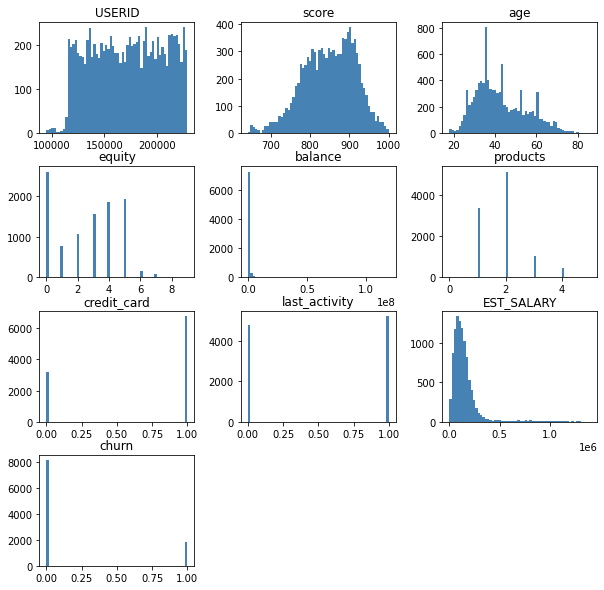

In [16]:
df_info(data_raw, figsize=(10, 10))

Каждая строка - информация о клиенте банка. Всего в датасете представлена информация о 10 000 клиентах, пропущенные значения встречаются только в двух столбцах: `age` и `balance`.

Распределение `score` нормальное с центром около значения 825, кроме этого наблюдается отдельный всплеск с максимумом у 900.

Распределение значений в колонке `age` имеет несколько странный тип - присутствует набор крупных узких дискретных значений, значительно выделяющихся из общего распределения. Возможно, в эти данные искуственно вносились изменения или это связано с особенностями построения гистограммы на данном шаге.

В распределении `equity` сильно выделяется значение 0, остальная картина близка к нормальному распределению с быстро спадающим хвостом справа.

Чаще всего клиенты пользуются двумя продуктами банка. Примерно в два раза больше клиентов, имеющих кредитную карту, чем клиентов без неё. У половины клиентов не наблюдалась активность в последнее время. Оценочный доход клиентов в среднем составляет менее 40 000 рублей.

## Предобработка данных

### Преобразование названий столбцов

In [17]:
data_raw = data_raw.rename(columns={
    'USERID' : 'uid',
    'EST_SALARY' : 'est_salary'
})

### Поиск дубликатов

In [18]:
# создадим копию исходного датасета для его преобразований
data = data_raw.copy()

In [19]:
# проверим датасет на явные дубликаты
if len(data[data.duplicated()]) != 0:
    print('Количество дубликатов:',
          len(data[data.duplicated()])
         )
else:
    print('Явные дубликаты не найдены')

Явные дубликаты не найдены


Поищем неявные дубликаты. Их будем искать на основе повторяющихся уникальных номеров клиентов uid.

In [20]:
if len(data[data['uid'].duplicated()]) == 0:
    print('Дубликаты по uid не найдены')
else:
    print('Количество дубликатов uid:',
          len(data[data['uid'].duplicated()]),
          '({:.2%})'.format(
              len(data[data['uid'].duplicated()]) / \
              len(data)
          )
         )

Количество дубликатов uid: 73 (0.73%)


In [21]:
# выведем дублирующиеся записи в датасете

# сохраним индексы дублируемых записей
dupl_indexes = []

for uid in data.loc[data['uid'].duplicated(), 'uid'].unique():
    display(
        data[data['uid'] == uid]
    )
    dupl_indexes.extend(data[data['uid'] == uid].index)

uid  score       city gender   age  equity    balance  products  \
231   190253  823.0    Рыбинск      М  37.0       4  373348.39         2   
1583  190253  726.0  Ярославль      М  49.0       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
231             0              1   131947.92      1  
1583            1              1   177700.78      0

uid  score       city gender   age  equity     balance  products  \
869   210662  962.0  Ярославль      Ж  54.0       5  5069231.39         1   
1837  210662  896.0    Рыбинск      Ж  37.0       0         NaN         2   

      credit_card  last_activity  est_salary  churn  
869             1              1   955144.85      1  
1837            0              0    90916.04      0

uid  score       city gender   age  equity     balance  products  \
904   131419  934.0  Ярославль      М  35.0       5  2348335.95         2   
2138  131419  739.0    Рыбинск      Ж  37.0       3  1307941.65         3   

      credit_card  last_activity  est_salary  churn  
904             0              0   217105.13      1  
2138            0              0   103867.47      0

uid  score       city gender   age  equity  balance  products  \
918   187635  918.0  Ярославль      Ж  44.0       0      NaN         1   
2165  187635  692.0    Рыбинск      Ж   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
918             1              1   162497.52      0  
2165            1              1   160368.82      0

uid  score       city gender   age  equity     balance  products  \
1740  220816  840.0  Ярославль      Ж  41.0       3  1193287.13         2   
2302  220816  934.0    Рыбинск      Ж  74.0       5  1294285.39         3   

      credit_card  last_activity  est_salary  churn  
1740            1              1    76434.94      1  
2302            1              0    95606.80      0

uid  score       city gender   age  equity  balance  products  \
1389  221156  687.0    Рыбинск      М  61.0       0      NaN         1   
2444  221156  913.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
1389            1              1   136361.72      0  
2444            1              1   135693.24      0

uid  score       city gender   age  equity    balance  products  \
1513  208081  873.0  Ярославль      М  31.0       2  232814.75         2   
2998  208081  821.0    Рыбинск      Ж  62.0       3  493608.26         2   

      credit_card  last_activity  est_salary  churn  
1513            1              1   122505.86      1  
2998            1              1    33491.45      0

uid  score       city gender   age  equity     balance  products  \
790   170312  901.0  Ярославль      М  33.0       4  3276783.93         3   
3039  170312  813.0    Рыбинск      Ж  47.0       3   370027.67         2   

      credit_card  last_activity  est_salary  churn  
790             0              1   358700.96      1  
3039            0              0   129835.56      0

uid  score       city gender   age  equity     balance  products  \
150   185748  850.0    Рыбинск      М  36.0       5  1203376.67         2   
3106  185748  912.0  Ярославль      Ж  47.0       5  1598218.98         2   

      credit_card  last_activity  est_salary  churn  
150             0              1    89401.82      1  
3106            0              0   180256.98      0

uid  score       city gender   age  equity    balance  products  \
1359  211130  833.0  Ярославль      М  55.0       3  1231184.9         4   
3817  211130  918.0    Рыбинск      Ж  55.0       0        NaN         2   

      credit_card  last_activity  est_salary  churn  
1359            0              1   187758.38      1  
3817            1              1   244202.04      0

uid  score       city gender   age  equity    balance  products  \
1970  217643  845.0  Ярославль      М  29.0       5  733098.45         4   
4186  217643  804.0    Рыбинск      Ж  40.0       2  301836.65         2   

      credit_card  last_activity  est_salary  churn  
1970            1              1    41443.01      1  
4186            1              1    81137.22      0

uid  score       city gender   age  equity      balance  products  \
2597  226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
4216  226719  903.0    Рыбинск      Ж  63.0       0          NaN         1   

      credit_card  last_activity  est_salary  churn  
2597            0              0   934412.61      1  
4216            1              0   138582.58      0

uid  score       city gender   age  equity     balance  products  \
161   197364  928.0    Рыбинск      Ж  53.0       6  1347183.86         2   
4870  197364  889.0  Ярославль      М  33.0       0         NaN         2   

      credit_card  last_activity  est_salary  churn  
161             0              1   168189.49      1  
4870            1              1    96173.48      0

uid  score       city gender   age  equity    balance  products  \
3274  155765  863.0  Ярославль      М  30.0       5  1036114.5         5   
5197  155765  923.0    Рыбинск      М  30.0       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
3274            1              1    150744.5      1  
5197            1              1    120296.6      0

uid  score       city gender   age  equity     balance  products  \
4850  126368  909.0  Ярославль      Ж  30.0       4  1322623.29         2   
5420  126368  832.0    Рыбинск      Ж  33.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
4850            0              1   140675.66      1  
5420            0              0   118465.34      0

uid  score       city gender   age  equity    balance  products  \
7     218868  825.0  Ярославль      Ж  38.0       4  458145.40         2   
5470  218868  827.0    Рыбинск      Ж   NaN       4  448959.07         2   

      credit_card  last_activity  est_salary  churn  
7               1              1    68085.48      0  
5470            1              1    67835.95      0

uid  score       city gender   age  equity    balance  products  \
3683  151662  960.0  Ярославль      Ж  37.0       4  2527032.7         4   
5495  151662  884.0    Рыбинск      Ж   NaN       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
3683            1              0   231648.50      0  
5495            1              1   137500.77      0

uid  score       city gender   age  equity     balance  products  \
5369  143592  885.0    Рыбинск      Ж  56.0       4  1201087.46         2   
5557  143592  764.0  Ярославль      Ж  68.0       3   508919.15         2   

      credit_card  last_activity  est_salary  churn  
5369            1              1    88223.89      1  
5557            0              1    71211.66      0

uid  score       city gender   age  equity     balance  products  \
2276  141265  858.0  Ярославль      М  37.0       4   471599.16         2   
5569  141265  811.0    Рыбинск      Ж  33.0       3  1044316.88         2   

      credit_card  last_activity  est_salary  churn  
2276            1              1   148806.88      1  
5569            1              0    46055.32      0

uid  score       city gender   age  equity    balance  products  \
3350  208815  877.0    Рыбинск      М  25.0       4  239421.18         1   
5570  208815  773.0  Ярославль      М  39.0       4  288110.09         2   

      credit_card  last_activity  est_salary  churn  
3350            1              1    48638.00      1  
5570            1              0    56971.91      0

uid  score       city gender   age  equity    balance  products  \
690   152479  768.0    Рыбинск      Ж  42.0       0  126787.79         4   
5705  152479  723.0  Ярославль      Ж  22.0       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
690             1              1   143233.23      1  
5705            1              0    83955.65      0

uid  score       city gender   age  equity    balance  products  \
4611  217619  903.0    Рыбинск      Ж  59.0       5  844055.83         2   
5807  217619  766.0  Ярославль      М  52.0       2  218199.47         1   

      credit_card  last_activity  est_salary  churn  
4611            0              1   133999.76      1  
5807            1              0   120356.44      0

uid  score       city gender   age  equity     balance  products  \
1580  208738  897.0    Рыбинск      Ж  45.0       5   859018.19         2   
5840  208738  839.0  Ярославль      М  60.0       5  1102438.37         2   

      credit_card  last_activity  est_salary  churn  
1580            1              1   145510.08      1  
5840            0              1   116500.81      0

uid  score       city gender   age  equity     balance  products  \
5863  120258  908.0    Рыбинск      Ж  38.0       4  2213581.63         2   
5896  120258  905.0  Ярославль      М  30.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
5863            0              1   160327.77      1  
5896            1              1   146427.96      0

uid  score       city gender   age  equity    balance  products  \
5454  188957  853.0  Ярославль      М  35.0       1  374959.62         2   
6005  188957  882.0    Рыбинск      Ж  64.0       3  893392.91         3   

      credit_card  last_activity  est_salary  churn  
5454            1              1   197600.97      1  
6005            1              0    69622.58      0

uid  score       city gender   age  equity     balance  products  \
1247  228075  932.0  Ярославль      М   NaN       5  7601719.20         2   
6457  228075  839.0    Рыбинск      М  39.0       5   507199.85         3   

      credit_card  last_activity  est_salary  churn  
1247            1              1   408121.16      0  
6457            0              1    85195.80      0

uid  score       city gender   age  equity     balance  products  \
2941  172142  896.0  Ярославль      Ж  30.0       4  1009073.14         4   
6756  172142  751.0    Рыбинск      Ж  69.0       3   396568.03         2   

      credit_card  last_activity  est_salary  churn  
2941            1              0    70866.29      1  
6756            0              1    45608.45      0

uid  score       city gender   age  equity    balance  products  \
3564  163207  853.0    Рыбинск      М  42.0       4  543839.62         1   
6786  163207  838.0  Ярославль      Ж  42.0       4  652776.60         2   

      credit_card  last_activity  est_salary  churn  
3564            1              1   105281.97      1  
6786            1              1    97545.36      0

uid  score       city gender   age  equity     balance  products  \
3230  210135  974.0  Ярославль      Ж  50.0       5  5680148.93         4   
7236  210135  908.0    Рыбинск      Ж   NaN       4  1120340.31         3   

      credit_card  last_activity  est_salary  churn  
3230            1              1   338471.66      0  
7236            1              1    85002.15      0

uid  score       city gender   age  equity  balance  products  \
1010  219343  921.0  Ярославль      Ж  33.0       0      NaN         1   
7248  219343  920.0    Рыбинск      Ж   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
1010            1              0   159475.61      0  
7248            1              0   159248.67      0

uid  score       city gender   age  equity    balance  products  \
58    164676  860.0  Ярославль      М  37.0       5  648594.03         2   
7271  164676  790.0    Рыбинск      Ж  77.0       1  111202.01         1   

      credit_card  last_activity  est_salary  churn  
58              1              1   213586.86      1  
7271            1              0    32835.45      0

uid  score       city gender   age  equity    balance  products  \
431   214031  856.0    Рыбинск      М  36.0       2  386426.67         4   
7409  214031  777.0  Ярославль      М   NaN       2  171510.23         1   

      credit_card  last_activity  est_salary  churn  
431             1              1    72767.85      0  
7409            1              1    75409.63      0

uid  score       city gender   age  equity     balance  products  \
1608  140377  802.0  Ярославль      М  26.0       3   539863.29         4   
7487  140377  930.0    Рыбинск      Ж  34.0       5  1123967.02         1   

      credit_card  last_activity  est_salary  churn  
1608            1              1   112167.83      1  
7487            1              1   148336.26      0

uid  score       city gender   age  equity     balance  products  \
4866  117943  855.0    Рыбинск      Ж  32.0       6  1036832.93         4   
7542  117943  880.0  Ярославль      Ж  40.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
4866            1              1   107792.71      1  
7542            1              0   137718.93      0

uid  score       city gender   age  equity    balance  products  \
1893  116540  883.0    Рыбинск      Ж  55.0       1  362756.49         3   
7694  116540  887.0  Ярославль      Ж  38.0       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0

uid  score       city gender   age  equity     balance  products  \
4986  210792  884.0    Рыбинск      М  48.0       4  2228037.20         2   
7814  210792  839.0  Ярославль      М  42.0       2   662646.97         1   

      credit_card  last_activity  est_salary  churn  
4986            0              1   207978.09      1  
7814            1              0   138403.60      0

uid  score       city gender   age  equity     balance  products  \
3859  191520  773.0    Рыбинск      М  36.0       3  1219918.08         4   
7931  191520  767.0  Ярославль      М  45.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
3859            1              1   119933.13      1  
7931            1              1   880005.05      0

uid  score       city gender   age  equity  balance  products  \
1181  198635  896.0    Рыбинск      Ж  32.0       0      NaN         1   
8015  198635  670.0  Ярославль      Ж   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
1181            1              1   170866.01      0  
8015            1              1   168699.33      0

uid  score       city gender   age  equity  balance  products  \
6412  226550  939.0  Ярославль      М  34.0       0      NaN         1   
8070  226550  940.0    Рыбинск      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
6412            1              1   145913.73      0  
8070            0              1   147696.95      0

uid  score       city gender   age  equity    balance  products  \
946   149365  877.0  Ярославль      М  41.0       5  819182.01         2   
8272  149365  793.0    Рыбинск      Ж  61.0       0  476496.99         2   

      credit_card  last_activity  est_salary  churn  
946             0              0   212316.47      1  
8272            1              1    46147.06      0

uid  score       city gender   age  equity  balance  products  \
4401  216848  929.0    Рыбинск      М  68.0       0      NaN         1   
8293  216848  930.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
4401            1              1   195902.59      0  
8293            1              1   199542.51      0

uid  score       city gender   age  equity     balance  products  \
5252  148826  895.0  Ярославль      М  32.0       5  1470273.14         2   
8364  148826  909.0    Рыбинск      Ж  32.0       0         NaN         3   

      credit_card  last_activity  est_salary  churn  
5252            0              0   118058.52      1  
8364            1              0    28843.54      0

uid  score       city gender   age  equity  balance  products  \
5889  206759  917.0  Ярославль      М  22.0       0      NaN         1   
8385  206759  915.0    Рыбинск      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
5889            1              0    70617.52      0  
8385            1              0    71179.53      0

uid  score       city gender   age  equity  balance  products  \
6685  210898  934.0    Рыбинск      Ж  35.0       0      NaN         1   
8449  210898  805.0  Ярославль      Ж   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
6685            0              1   912105.84      0  
8449            0              1   922080.25      0

uid  score       city gender   age  equity    balance  products  \
8205  227795  840.0    Рыбинск      М  34.0       2  350768.03         1   
8497  227795  839.0  Ярославль      М  34.0       2  326593.14         2   

      credit_card  last_activity  est_salary  churn  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0

uid  score       city gender   age  equity     balance  products  \
7453  210627  864.0  Ярославль      Ж  38.0       4  1527225.32         4   
8521  210627  804.0    Рыбинск      М  30.0       2   347818.88         3   

      credit_card  last_activity  est_salary  churn  
7453            1              1   162999.17      1  
8521            1              0   129015.25      0

uid  score       city gender   age  equity  balance  products  \
440   221197  663.0    Рыбинск      М  27.0       0      NaN         1   
8632  221197  893.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
440             1              1   172573.13      0  
8632            1              0   173929.92      0

uid  score       city gender   age  equity   balance  products  \
1411  123461  829.0  Ярославль      Ж  59.0       0  96222.44         2   
8638  123461  934.0    Рыбинск      М  34.0       0       NaN         2   

      credit_card  last_activity  est_salary  churn  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0

uid  score       city gender   age  equity     balance  products  \
2989  181526  918.0  Ярославль      Ж  37.0       5  1366382.35         4   
8705  181526  895.0    Рыбинск      М  29.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
2989            1              1    97932.95      1  
8705            1              1   124786.53      0

uid  score       city gender   age  equity    balance  products  \
5629  162053  921.0    Рыбинск      М  33.0       3  857011.13         2   
8733  162053  786.0  Ярославль      М  29.0       4  205824.97         3   

      credit_card  last_activity  est_salary  churn  
5629            1              1   113512.57      1  
8733            1              0   121371.73      0

uid  score       city gender   age  equity   balance  products  \
4443  127440  846.0    Рыбинск      М  66.0       1  57405.67         2   
8785  127440  663.0  Ярославль      М   NaN       0       NaN         1   

      credit_card  last_activity  est_salary  churn  
4443            0              1    17831.63      0  
8785            1              1   117197.56      0

uid  score       city gender   age  equity     balance  products  \
2499  199312  948.0  Ярославль      М  41.0       5  3095721.85         4   
8822  199312  911.0    Рыбинск      Ж  43.0       0         NaN         2   

      credit_card  last_activity  est_salary  churn  
2499            1              1   307234.69      1  
8822            1              1   152189.72      0

uid  score       city gender   age  equity    balance  products  \
6446  222480  776.0  Ярославль      Ж  38.0       5  823145.83         2   
9104  222480  776.0    Рыбинск      Ж   NaN       5  796735.09         1   

      credit_card  last_activity  est_salary  churn  
6446            1              1    55777.44      0  
9104            1              1    55073.63      0

uid  score       city gender   age  equity    balance  products  \
8584  183510  922.0  Ярославль      М  26.0       5  448542.42         3   
9146  183510  800.0    Рыбинск      Ж  42.0       7  473293.81         2   

      credit_card  last_activity  est_salary  churn  
8584            0              1    66063.13      1  
9146            1              0    54049.88      0

uid  score       city gender   age  equity    balance  products  \
9035  200863  933.0    Рыбинск      М  29.0       7  766924.56         2   
9175  200863  832.0  Ярославль      М  42.0       5  620064.73         2   

      credit_card  last_activity  est_salary  churn  
9035            0              1    89323.33      1  
9175            0              0   188054.46      0

uid  score       city gender   age  equity   balance  products  \
2439  150667  813.0    Рыбинск      Ж  44.0       0  62504.47         4   
9267  150667  931.0  Ярославль      М  41.0       0       NaN         1   

      credit_card  last_activity  est_salary  churn  
2439            1              0   152393.79      1  
9267            0              0   261904.44      0

uid  score       city gender   age  equity  balance  products  \
8897  202983  941.0  Ярославль      Ж  39.0       0      NaN         1   
9301  202983  942.0    Рыбинск      Ж   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
8897            0              1   159348.84      0  
9301            1              1   163804.73      0

uid  score       city gender   age  equity     balance  products  \
1080  155872  896.0  Ярославль      М  36.0       3  1113656.92         3   
9363  155872  714.0    Рыбинск      Ж  29.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
1080            0              1   291176.85      1  
9363            1              0   118052.84      0

uid  score       city gender   age  equity  balance  products  \
4720  187459  895.0  Ярославль      М  48.0       0      NaN         1   
9380  187459  894.0    Рыбинск      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
4720            1              0   180887.50      0  
9380            1              0   178012.28      0

uid  score       city gender   age  equity    balance  products  \
4623  217826  842.0  Ярославль      М  39.0       4  439747.65         2   
9406  217826  790.0    Рыбинск      Ж  46.0       4  430414.80         2   

      credit_card  last_activity  est_salary  churn  
4623            0              1   116736.75      1  
9406            1              1    49400.37      0

uid  score       city gender   age  equity  balance  products  \
4343  141945  929.0    Рыбинск      М  33.0       0      NaN         1   
9457  141945  929.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
4343            1              0   381868.89      0  
9457            1              0   381868.89      0

uid  score       city gender   age  equity    balance  products  \
3988  129785  904.0    Рыбинск      М  33.0       5  2427737.6         3   
9504  129785  949.0  Ярославль      М  43.0       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
3988            0              1   188856.75      1  
9504            1              1   166845.37      0

uid  score       city gender   age  equity     balance  products  \
3936  160075  899.0  Ярославль      М  34.0       4  1647814.67         4   
9508  160075  824.0    Рыбинск      Ж  57.0       3   355047.33         2   

      credit_card  last_activity  est_salary  churn  
3936            1              0   151888.42      1  
9508            0              0    64351.81      0

uid  score       city gender   age  equity  balance  products  \
3668  185829  925.0    Рыбинск      М  40.0       0      NaN         1   
9632  185829  927.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
3668            1              0   228305.64      0  
9632            1              0   231254.86      0

uid  score       city gender   age  equity  balance  products  \
9322  221809  917.0    Рыбинск      М  45.0       0      NaN         1   
9634  221809  917.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
9322            1              1   199728.29      0  
9634            1              1   192644.15      0

uid  score       city gender   age  equity    balance  products  \
4587  171751  874.0    Рыбинск      Ж  26.0       5  292054.42         2   
9653  171751  862.0  Ярославль      М  42.0       4  481992.19         2   

      credit_card  last_activity  est_salary  churn  
4587            0              1    20528.56      1  
9653            1              0    71816.86      0

uid  score       city gender   age  equity     balance  products  \
2226  195884  906.0  Ярославль      М  49.0       6  1354552.83         2   
9659  195884  767.0    Рыбинск      Ж  45.0       1   335652.56         3   

      credit_card  last_activity  est_salary  churn  
2226            0              0   270678.42      1  
9659            1              1   100197.67      0

uid  score       city gender   age  equity     balance  products  \
6670  163657  903.0    Рыбинск      М  45.0       4  1343339.70         4   
9667  163657  849.0  Ярославль      М   NaN       4  1254013.85         2   

      credit_card  last_activity  est_salary  churn  
6670            0              1    83741.65      0  
9667            1              1   119106.67      0

uid  score       city gender   age  equity    balance  products  \
8164  124450  859.0  Ярославль      Ж  38.0       6  516811.20         1   
9775  124450  758.0    Рыбинск      Ж  36.0       0   73574.07         2   

      credit_card  last_activity  est_salary  churn  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0

uid  score       city gender   age  equity    balance  products  \
5020  168998  886.0  Ярославль      Ж  35.0       4  394780.61         2   
9785  168998  895.0    Рыбинск      М  44.0       0  282653.53         3   

      credit_card  last_activity  est_salary  churn  
5020            1              1   510577.10      1  
9785            0              0   255296.47      0

uid  score       city gender   age  equity    balance  products  \
4212  140934  919.0  Ярославль      Ж  29.0       4  603946.18         3   
9819  140934  832.0    Рыбинск      Ж   NaN       3  385763.16         2   

      credit_card  last_activity  est_salary  churn  
4212            0              1   158438.79      0  
9819            0              1    59651.35      0

uid  score       city gender   age  equity     balance  products  \
7055  217412  879.0    Рыбинск      М  42.0       5   568140.15         3   
9880  217412  886.0  Ярославль      Ж  35.0       3  1026172.14         2   

      credit_card  last_activity  est_salary  churn  
7055            0              0   231658.67      1  
9880            1              0    53099.16      0

uid  score       city gender   age  equity    balance  products  \
7753  175730  846.0  Ярославль      Ж  32.0       7  216764.74         4   
9970  175730  816.0    Рыбинск      М  36.0       4  477892.07         3   

      credit_card  last_activity  est_salary  churn  
7753            1              1    77100.85      1  
9970            1              0    81100.60      0

Во всех случаях дублирования uid наблюдаем, что пары-дубликаты принадлежат разным городам. Можно было бы предположить, что информация об одном и том же клиенте, которые активно пользуются услугами в *разных* городах, по каким-то причинам дважды хранится в общей БД. В некоторых случаях это, вероятно, действительно так: в записях указан один пол, часто одинаковые или близкие значения других признаков и у одной из дубликатов отсутствуют данные в колонке с возрастом. Однако большинство записей отличаются ещё и возрастом, полом и количеством используемых продуктов.

Все похожие записи - случаи, когда в одном из дубликатов не указан возраст - обработаем вручную. Если по остальным параметрам записи близки - оставим ту запись, где указан возраст, вторую удалим. Под близостью понимается следующее: в колонках `balance` и `est_salary` примерно одинаковые значения (отличаются не более, чем на 5%), числа в `products` отличаются не более, чем на единицу, а значения в остальных колонках одинаковы. В противном случае - удалим обе записи.

In [22]:
# на основе индексов датасета удалим сначала одну запись в группах тех дубликатов, где признаки близки
for index in [2165, 2444, 5470, 7248, 8015, 8293, 8385, 210898, 9104, 9380, 9457, 9632, 9634]:
    data = data[~(data.index == index)]

In [23]:
# теперь удалим все оставшиеся дубликаты
for index in dupl_indexes:
    data = data[~(data.index == index)]

In [24]:
# проверим, что все удаления были произведены успешно
if len(data[data['uid'].duplicated()]) == 0:
    print('Дубликаты по uid не найдены')

Дубликаты по uid не найдены


### Работа с пропусками

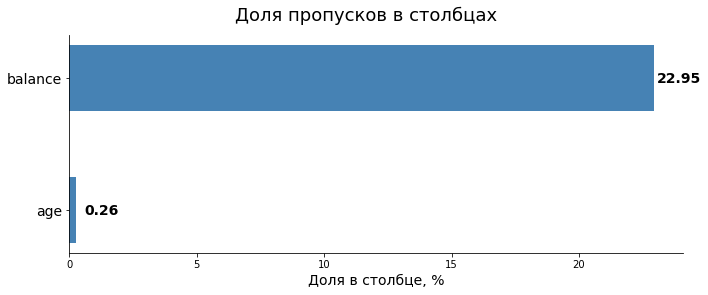

In [25]:
# построим график, отражающий для каждого столбца долю пропусков в нём
pass_value_barh(data_raw)

Пропуски встречаются только в двух столбцах: 
* `age` - связан с возрастом клиента, пропуски в столбце составляют менее половины процента
* `balance` - отображает баланс клиента на счетах в банке, это значение пропущено для 23% клиентов датасета

Пропуски в столбце `age`, вероятно, связаны с ошибками при выгрузке данных, т.к. клиент банка оформляет свои услуги только по паспорту и в базе данных должна присутствовать информация о дате рождения клиента. То есть эти пропуски не связаны с остальными данными о клиенте. Кроме того, пропуски составляют малую долю процента от датасета, поэтому можно заполнить эти пропуски средним значением по датасету.

In [26]:
# заполним пропуски в столбце `age` 
data.loc[data['age'].isna(), 'age'] = int(data['age'].mean())

Отсутствие информации о балансе на счетах может быть связано с тем, что клиент пользуется услугами банка, не связанными с наличием каких-либо счетов внутри этого банка (банковских карт или вкладов). Например, у клиента может быть оформлена страховка в банке или арендованы сейфовые ячейки или иные сервисные услуги, которые предоставляет банк.

Однако вызывает вопросы отсутствие информации о счетах клиента в случае наличия кредитной карты. Посмотрим, сколько таких клиентов в датасете.

In [27]:
print('Количество клиентов с кредитной картой и пропуском в балансе:',
      len(data[(data['credit_card'] == 1) & (data['balance'].isna())]),
      '({:.0%})'.format(
          len(data[(data['credit_card'] == 1) & (data['balance'].isna())]) / len(data)
      )
     )
print('Количество клиентов БЕЗ кредитной карты и пропуском в балансе:',
      len(data[(data['credit_card'] == 0) & (data['balance'].isna())]),
      '({:.0%})'.format(
          len(data[(data['credit_card'] == 0) & (data['balance'].isna())]) / len(data)
      )
     )

Количество клиентов с кредитной картой и пропуском в балансе: 1831 (19%)
Количество клиентов БЕЗ кредитной карты и пропуском в балансе: 415 (4%)


В действительности, большинство клиентов с пропусками имеют кредитную карту.

Посмотрим, насколько сильно отличаются другие признаки клиента в зависимости от наличия пропуска в `balance`.

In [28]:
# создадим новый столбец-метку, в котором:
# 0 - в `balance` нет пропуска
# 1 - в `balance` пропуск

data['balance_flag'] = 0
data.loc[data['balance'].isna(), 'balance_flag'] = 1

In [29]:
# построим сводную таблицу с агреггированными значениями признаков клиента
# в зависимости от наличия/отсутствия пропуска в `balance`

(
    data
    .groupby('balance_flag')
    .agg({
        'score' : 'mean',         # так как из шага 1.3 известно, что распределение близко к нормальному
        'age' : 'mean',
        'equity' : 'median',
        'products' : 'median',
        'credit_card' : 'mean',   # покажет долю клиентов, которые имеют кредитную карту в данной группе
        'last_activity' : 'mean', # покажет долю клиентов, которые были активны недавно
        'est_salary' : 'mean',
        'churn' : 'mean'          # покажет долю клиентов, которые уходят
    })
    .rename(index={
        0 : 'exist',
        1 : 'no information'
    })
)

score        age  equity  products  credit_card  \
balance_flag                                                           
exist           843.572161  42.936777       4         2     0.640510   
no information  865.203028  42.138468       0         1     0.815227   

                last_activity     est_salary     churn  
balance_flag                                            
exist                0.513670  124225.370887  0.230941  
no information       0.548531  226654.861888  0.005788

Из таблицы видно, что между группами сильно отличаются показатели `equity` и `churn`, `est_salary` отличается практически в 2 раза, также есть заметное отличие по показателю `products`. Рассмотрим это подробнее.

In [30]:
# сначала посмотрим на распределение `equity`
display(
    data
    .pivot_table(
        index='equity',
        columns='balance_flag',
        values='uid',
        aggfunc='count'
    )
    .rename(columns={
        0 : 'exist',
        1 : 'no information'
    })
)
print('Доля клиентов с оценкой имущества 0 ед. среди клиентов, у которых отсутсвует информация о балансе:',
      '{:.1%}'.format(
          len(data[(data['balance_flag'] == 1) & (data['equity'] == 0)]) / \
          len(data[data['balance_flag'] == 1])
      )
)

balance_flag   exist  no information
equity                              
0              406.0          2131.0
1              655.0           114.0
2             1043.0             NaN
3             1526.0             1.0
4             1822.0             NaN
5             1892.0             NaN
6              157.0             NaN
7               77.0             NaN
8               17.0             NaN
9               13.0             NaN

Доля клиентов с оценкой имущества 0 ед. среди клиентов, у которых отсутсвует информация о балансе: 94.9%


На шаге 1.3 отмечалось наличие особенности в распределении `equity` у значения 0, теперь видно, что эта особенность связана с группой клиентов, для которых отсутствует информация о их балансе на счетах.

In [31]:
# распределение `products`
display(
    data
    .pivot_table(
        index='products',
        columns='balance_flag',
        values='uid',
        aggfunc='count'
    )
    .rename(columns={
        0 : 'exist',
        1 : 'no information'
    })
)

print('Доля клиентов с 1 продуктом среди клиентов, у которых отсутсвует информация о балансе:',
      '{:.1%}'.format(
          len(data[(data['balance_flag'] == 1) & (data['products'] == 1)]) / \
          len(data[data['balance_flag'] == 1])
      )
     )

balance_flag   exist  no information
products                            
0                NaN             1.0
1             1380.0          1907.0
2             4760.0           310.0
3              993.0            28.0
4              457.0             NaN
5               18.0             NaN

Доля клиентов с 1 продуктом среди клиентов, у которых отсутсвует информация о балансе: 84.9%


По таблице видно, что в датасете есть клиент, у которого нет ни одного продукта на данный момент. Эту запись изучим позднее при анализе аномалий. 
Среди клиентов с пропусками, 85% пользуются только одним продуктом банка. Т.е. по данному параметру две группы также отличаются значительно.

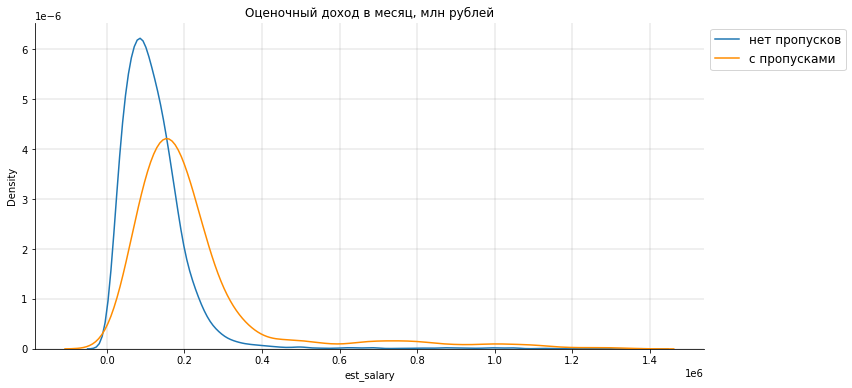

In [32]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data[data['balance_flag']==0], x='est_salary', ax=ax, 
            fill=False, common_norm=False, label='нет пропусков')
sns.kdeplot(data=data[data['balance_flag']==1], x='est_salary', ax=ax, color='darkorange',
            fill=False, common_norm=False, label='с пропусками')
ax.grid( color='grey', lw=0.25)
ax.set_title("Оценочный доход в месяц, млн рублей")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12);

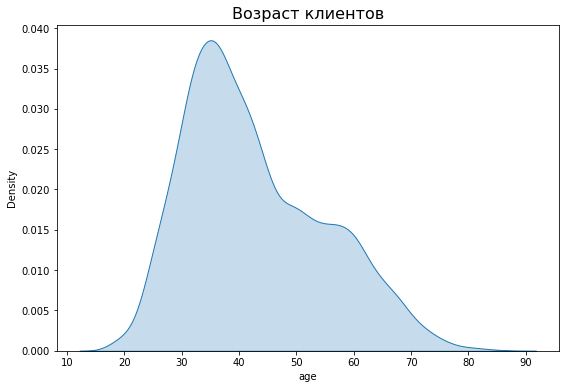

In [34]:
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(data['age'], shade=True, ax=ax, bw_adjust=1)
plt.title('Возраст клиентов', fontsize=16);

Несмотря на то, что вид распределения в обоих случаях похож, на графиках заметно не только смещение максимума распределения в сторону больших сумм, но и увеличение относительной доли клиентов с доходом более 400 000 рублей.

*Итак, клиенты с пропусками в столбце `balance` в основном пользуются только 1 продуктом (85%), имеют доход в среднем больше, чем у остальных, их имущество оценивается в 0 ед. (95%), а доля уходящих составляет всего 0,5% (в сравнении с 38% среди остальных клиентов).*

Так как в среднем клиенты данной категории имеют больший доход, но данные об их имуществе говорят о низкой оценки собственности и вносят аномалии в распределение столбца `equity`, то, вероятно, значение 0 в `equity` для данных клиентов - это на самом деле пропуски. Наличие значения 0 вместо пропуска объясняется тем, что данные этого столбца являются внешними для банка данными и поэтому они могли быть заполнены автоматически.

Удалять эти пропуски не будем, т.к. данные составляют большую часть датасета и исказят результаты. Кроме того, заменим для этих этих записей значения в столбце `equity` на -1, чтобы дополнительно отделить клиентов этой группы по данному признаку.

In [35]:
data.loc[(data['balance'].isna()), 'equity'] = -1

### Преобразование датасета

#### Добавление группы возраста

Разделим возраст клиентов на 4 категории:
* *дети* - до 18 лет
* *молодежь* - от 19 до 35 лет
* *средний возраст* - от 36 до 60 лет
* *пожилые* - старше 60 лет

Добавим значение категории в новый столбец датасета: `age_category`.

In [36]:
# создадим новый столбец
data['age_category'] = ''

# заполняем значение столбца по условиям
data.loc[data['age'] < 18, 'age_category'] = 'дети'
data.loc[(data['age'] <= 35) & (data['age'] >= 18), 'age_category'] = 'молодежь'
data.loc[(data['age'] <= 60) & (data['age'] > 35), 'age_category'] = 'средний возраст'
data.loc[data['age'] > 60, 'age_category'] = 'пожилые'

#### Добавление групп кредитного скоринга

Кредитный скоринг - рейтинговые баллы, характеризующие кредитоспособность клиента. Вероятно, этот параметр может быть связан с доходом клиента, оценкой его имущества, возможно, даже оттоком. Для удобства оценивания средних значений некоторых из этих параметров, в зависимости от высокого или низкого кредитного рейтинга клиента, добавим в датасет дополнительные группы.

In [37]:
print('Минимальный рейтинг:', data['score'].min())
print('Максимальный рейтинг:', data['score'].max())

Минимальный рейтинг: 642.0
Максимальный рейтинг: 1000.0


Сформируем группы на основе равного шага: в первую группу попадут клиенты от 640 до 649 включительно, во вторую - от 650 до 659 включительно и так далее. Выбираем такой подход, так как скоринг - это своебразные рейтинговые баллы, присужденные клиентам, поэтому и разделять их будем в равном диапазоне.

In [38]:
# создадим новый столбец
data['score_rating'] = 0

# заполним значение столбца по условиям
for i in (data['score'] // 10 * 10).value_counts().sort_index().index.to_list():
    data.loc[(data['score'] // 10 * 10) == i, 'score_rating'] = i

#### Кодировка категориальных переменных

Для каждого категориального признака создадим дополнительно колонки-маркеры со значениями булева типа.

In [39]:
# перед кодировкой создадим переменную с названиями столбцов-признаков,
# для удобства при дальнейшем анализе
cols = data.columns
cols = [i for i in cols if i != 'balance_flag']

In [40]:
# получим датасеты с закодированными категориями
city_data = get_dum(data, 'city')
age_data = get_dum(data, 'age_category')
gender_data = get_dum(data, 'gender')

# добавим новые столбцы на основе этих датасетов в data
data = data.join([city_data, age_data, gender_data])

In [41]:
data.head()

uid  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0      -1         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  ...     age_category  score_rating  \
0            0              1  ...         молодежь           850   
1            1              0  ...  средний возраст           860   
2            1              1  ...         молодежь           890   
3            0              1  ...  средний возраст           860   
4            1              0  ...         молодежь           730   

   city_Ростов city_Рыбинск  city_Ярославль  age_category_молодежь  \
0            0            1               0                      1   
1            0            1               0                      0   
2            0            1               0                      1   
3            0            0               1                      0   
4            0            0               1                      1   

   age_category_пожилые  age_category_средний возраст  gender_Ж  gender_М  
0                     0                             0         1         0  
1                     0                             1         1         0  
2                     0                             0         1         0  
3                     0                             1         1         0  
4                     0                             0         0         1  

[5 rows x 23 columns]

In [42]:
# добавим для удобства имена новых колонок по группам
city_cols = city_data.columns.tolist()
age_cols = age_data.columns.tolist()
gender_cols = gender_data.columns.tolist()

### Анализ аномалий

Посмотрим на значения, которые встречаются в каждом из признаков. Оценим, насколько они соотностяся с реальностью, а также выделим диапазоны, характеризующие типичного клиента банка.

#### `uid`

In [46]:
print('Минимальный uid в датасете:', data['uid'].min())
print('Максимальный uid в датасете:', data['uid'].max())

Минимальный uid в датасете: 94561
Максимальный uid в датасете: 229145


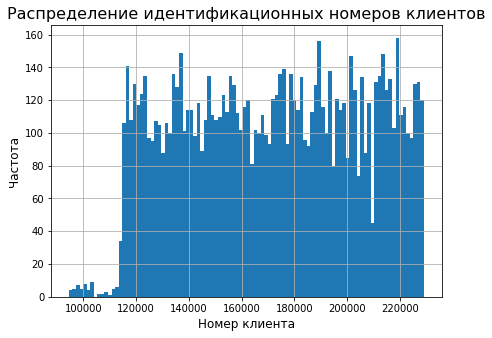

In [47]:
plot_hist(data, 'uid', 'Распределение идентификационных номеров клиентов', xlabel='Номер клиента')

По какой-то причине в датасете неравномерно представлены клиенты: часть идентификаторов, связанных с пользователями, пришедшими раньше всего среди клиентов этого датасета, утеряно. В остальном особенностей не обнаружено, а повторяющиеся номера были исключены из датасета в ходе поиска дубликатов.

#### `score`

In [48]:
print('Минимальный score в датасете:', data['score'].min())
print('Максимальный score в датасете:', data['score'].max())

Минимальный score в датасете: 642.0
Максимальный score в датасете: 1000.0


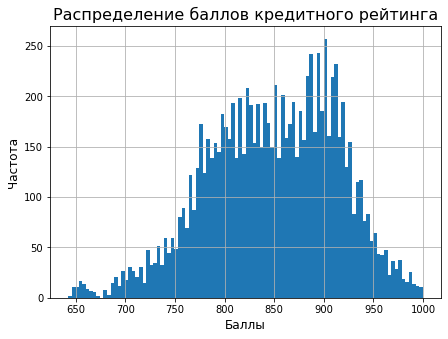

In [49]:
plot_hist(data, 'score', 'Распределение баллов кредитного рейтинга', xlabel='Баллы')

Аномалий не обнаружено.

#### `city`

In [50]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

В датасете нет аномлий в колонке с городом - во всех указанных населенных пунктах присутствуют филиалы банка.

#### `gender`

In [51]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

Как положено, присутствует 2 пола.

#### `age`

In [52]:
print('Минимальный возраст в датасете:', data['age'].min())
print('Максимальный возраст в датасете:', data['age'].max())

Минимальный возраст в датасете: 18.0
Максимальный возраст в датасете: 86.0


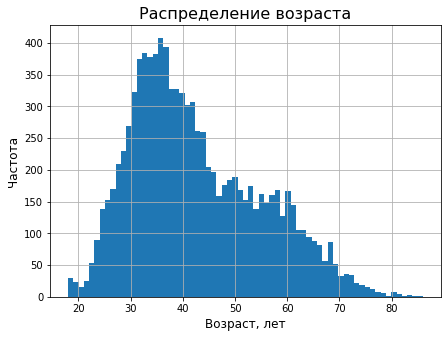

In [53]:
plot_hist(data, 'age', 'Распределение возраста', xlabel='Возраст, лет', bins=67)

Клиенты банка - только совершеннолетние. Аномалий не обнаружено.

#### `equity`

In [54]:
print('Минимальный equity в датасете:', data['equity'].min())
print('Максимальный equity в датасете:', data['equity'].max())

Минимальный equity в датасете: -1
Максимальный equity в датасете: 9


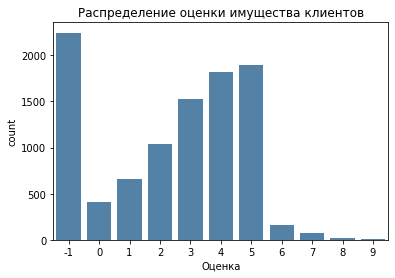

In [55]:
# посмотрим на всё распределение
sns.countplot(data=data, x='equity', color='steelblue')
plt.title('Распределение оценки имущества клиентов')
plt.xlabel('Оценка');

Проверим, что значения -1 - это значения добавленные в ходе работы с пропусками, т.е. связаны только с теми записями, где есть пропуск в балансе.

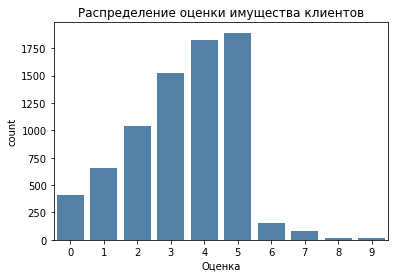

In [56]:
# посмотрим на всё распределение
sns.countplot(data=data[~(data['balance'].isna())], x='equity', color='steelblue')
plt.title('Распределение оценки имущества клиентов')
plt.xlabel('Оценка');

Аномалий не обнаружено.

#### `balance`

In [57]:
data['balance'].describe()

count    7.608000e+03
mean     8.238616e+05
std      1.982674e+06
min      0.000000e+00
25%      2.945396e+05
50%      5.226297e+05
75%      9.754941e+05
max      1.191136e+08
Name: balance, dtype: float64

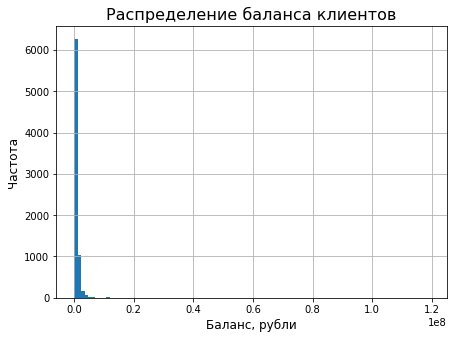

In [58]:
plot_hist(data, 'balance', 'Распределение баланса клиентов', xlabel='Баланс, рубли')

Как и ожидается, отрицательных значений в данной колонке нет. Аномалий не обнаружено.

#### `products`

In [59]:
print('Минимальное количество продуктов в датасете:', data['products'].min())
print('Максимальное количество продуктов в датасете:', data['products'].max())

Минимальное количество продуктов в датасете: 0
Максимальное количество продуктов в датасете: 5


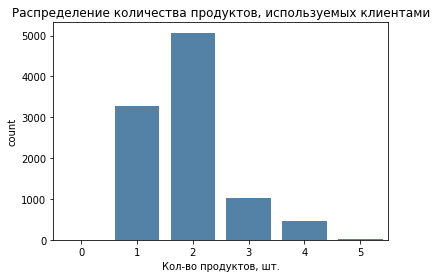

In [60]:
# посмотрим на всё распределение
sns.countplot(data=data, x='products', color='steelblue')
plt.title('Распределение количества продуктов, используемых клиентами')
plt.xlabel('Кол-во продуктов, шт.');

In [61]:
# посмотрим на клиента без продуктов:
data.loc[data['products'] == 0, cols]

uid  score     city gender   age  equity  balance  products  \
8957  147837  962.0  Рыбинск      Ж  79.0      -1      NaN         0   

      credit_card  last_activity  est_salary  churn age_category  score_rating  
8957            0              0    25063.96      1      пожилые           960

Этот клиент перестал пользоваться услугами нашего банка. Вероятно, в БД сохранилась информация об этом не только в параметре churn, но и в информации о количестве продуктов. Удалим этого клиента.

In [62]:
data = data[data['products'] != 0]

#### `est_salary`

In [63]:
data['est_salary'].describe()

count    9.853000e+03
mean     1.475843e+05
std      1.389944e+05
min      2.546300e+03
25%      7.509219e+04
50%      1.194601e+05
75%      1.744920e+05
max      1.395064e+06
Name: est_salary, dtype: float64

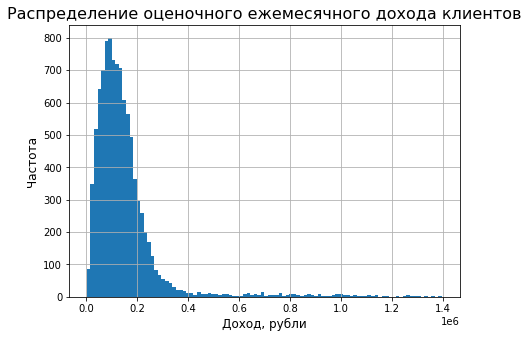

In [64]:
plot_hist(data, 'est_salary', 'Распределение оценочного ежемесячного дохода клиентов', xlabel='Доход, рубли')

Отрицательных значений не обнаружено, неккоректных значений не обнаружено.

### Изменение типов столбцов

In [65]:
# посмотрим, в каких столбцах можно изменить тип
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9853 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   uid                           9853 non-null   int64  
 1   score                         9853 non-null   float64
 2   city                          9853 non-null   object 
 3   gender                        9853 non-null   object 
 4   age                           9853 non-null   float64
 5   equity                        9853 non-null   int64  
 6   balance                       7608 non-null   float64
 7   products                      9853 non-null   int64  
 8   credit_card                   9853 non-null   int64  
 9   last_activity                 9853 non-null   int64  
 10  est_salary                    9853 non-null   float64
 11  churn                         9853 non-null   int64  
 12  balance_flag                  9853 non-null   int64  
 13  age

In [66]:
# заменим тип столбца возраста
data['age'] = data['age'].astype('int')
data['score'] = data['score'].astype('int')

### Итог предобработки

In [67]:
# оценим "потери"
print(
    'Доля данных, которая осталась после предобработки:',
      '{:.1%}'.format(len(data) / len(data_raw))
     )

Доля данных, которая осталась после предобработки: 98.5%


1. **Удалены дубликаты по uid**
2. **Определена выделенная группа клиентов на основе пропусков в столбце `balance`.** Клиенты с пропусками в столбце `balance` в основном пользуются только 1 продуктом (85%), имеют доход в среднем больше, чем у остальных, доля уходящих составляет всего 0,5% (в сравнении с 38% среди остальных клиентов), более 80% имеют кредитную карту. Для этих клиентов в столбце `equity` было заменено значение на -1.
3. Добавлен столбец-категории возраста
4. Произведена кодировка категориальных признаков
5. Проведен анализ аномалий. Аномалий обнаружено не было.

## Исследовательский анализ данных 

In [68]:
print('Всего клиентов в датасете:', len(data))
print('В банке присутствуют клиенты возрастом от',
      data['age'].min(), 'до', data['age'].max(), 'лет.'
     )
print('Количество продуктов, которым пользуются клиенты:',
     'от', data['products'].min(), 'до', data['products'].max(), 'штук.'
     )
print('Границы получаемого кредитного скоринга:',
     'от', data['score'].min(), 'до', data['score'].max(), 'eд.'
     )
print('Границы специализированной оценки имущества клиента:',
     'от', data['equity'].min(), 'до', data['equity'].max(), 'eд.'
     )

Всего клиентов в датасете: 9853
В банке присутствуют клиенты возрастом от 18 до 86 лет.
Количество продуктов, которым пользуются клиенты: от 1 до 5 штук.
Границы получаемого кредитного скоринга: от 642 до 1000 eд.
Границы специализированной оценки имущества клиента: от -1 до 9 eд.


### Портрет клиента

Посмотрим на средние параметры признаков, чтобы получить общий портрет клиента банка.

#### Основной город

In [69]:
ratio_table(data, 'city')

Количество клиентов  Доля
city                                
Ярославль                 5815  0.59
Рыбинск                   2621  0.27
Ростов                    1417  0.14

60% клиентов были зарегистрированы в Ярославле. Следующим по численности идёт Рыбинск - 27% и только потом Ростов Великий - 14%.

#### Пол

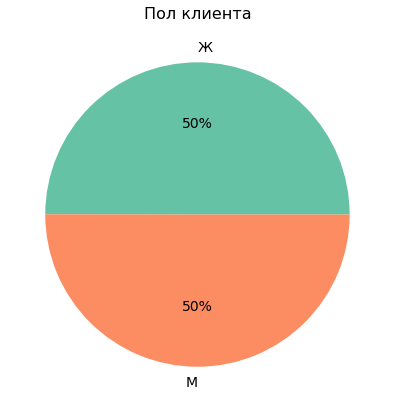

In [70]:
fig, ax = plt.subplots(figsize=(7,7))
plot_pie(data, 'gender', None)
plt.title('Пол клиента', fontsize=16);

**В датасете присутствуют в равной степени как мужчины, так и женщины.**

#### Возраст

In [71]:
data['age'].describe()

count    9853.000000
mean       42.751142
std        12.181941
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

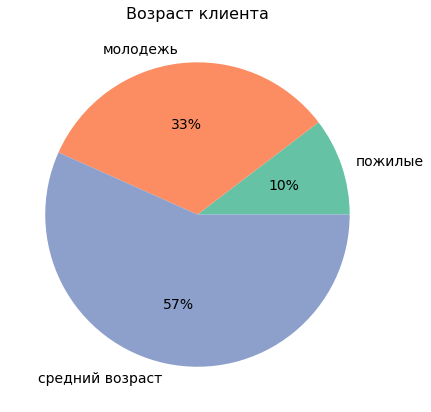

In [72]:
fig, ax = plt.subplots(figsize=(7,7))
plot_pie(data, 'age_category', None)
plt.title('Возраст клиента', fontsize=16);

В банке не обслуживаются счета несовершеннолетних. **Более половины клиентов (57%) - среднего возраста**, треть - молодежь, оставшиеся 10% - люди старше 60 лет.

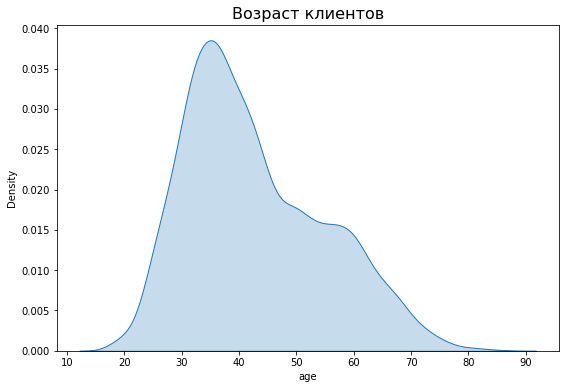

In [73]:
# посмотрим на распределение
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(data['age'], shade=True, ax=ax, bw_adjust=1)
plt.title('Возраст клиентов', fontsize=16);

Несмотря на то, что большинство клиентов относятся к среднему возрасту, а среднее значение по датасету составляет 42 года, в распределении хорошо прослеживаются две группы возрастов:
- ***30-40 лет:*** *самая многочисленная группа*
- ***55-60 лет:*** *группа, примерно в 2 раза меньше предыдущей*

На основе этого дополнительного разделения, добавим в датасет столбцы-метки, маркирующие отношение клиента к определенной группе.

In [74]:
# внесём дополнительный признак в датасет
data['is_30_40_years_group'] = 0
data.loc[(data['age'] >= 30) & (data['age'] <= 40), 'is_30_40_years_group'] = 1
data['is_55_60_years_group'] = 0
data.loc[(data['age'] >= 55) & (data['age'] <= 60), 'is_55_60_years_group'] = 1

age_groups_cols = ['is_30_40_years_group', 'is_55_60_years_group']

#### Среднее количество используемых услуг

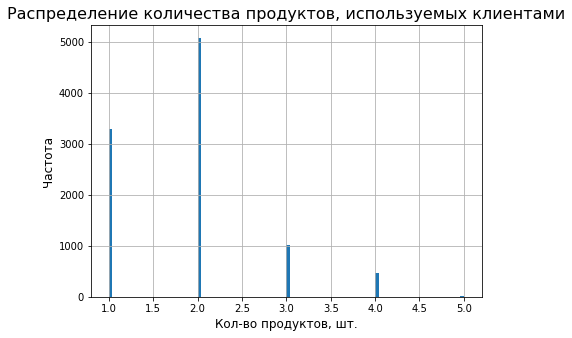

In [75]:
plot_hist(data, 'products', 'Распределение количества продуктов, используемых клиентами', xlabel='Кол-во продуктов, шт.')

In [76]:
ratio_table(data, 'products')

Количество клиентов  Доля
products                           
2                        5070  0.51
1                        3287  0.33
3                        1021  0.10
4                         457  0.05
5                          18  0.00

Более половины клиентов пользуются двумя услугами банка. **Только около 16% имеют более 2-х продуктов.**

#### Ежемесячный доход

In [77]:
data['est_salary'].describe()

count    9.853000e+03
mean     1.475843e+05
std      1.389944e+05
min      2.546300e+03
25%      7.509219e+04
50%      1.194601e+05
75%      1.744920e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [78]:
fig = px.box(data, y="est_salary")
fig.show()

Видно, что средний ежемесячный доход клиента имеет длинный хвост в сторону высоких значений. Посмотрим на распределение дохода среднестатистического клиента.

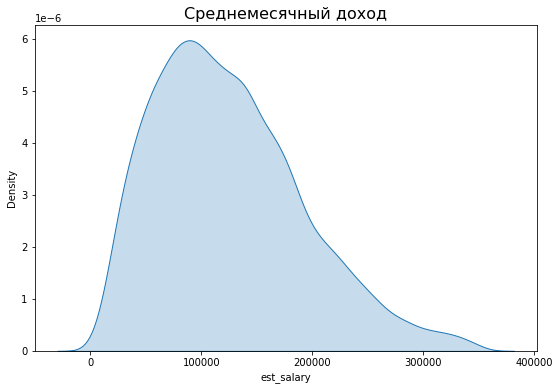

In [79]:
# посмотрим на распределение
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(data.loc[data['est_salary'] <= 350000, 'est_salary'], shade=True, ax=ax, bw_adjust=1)
plt.title('Среднемесячный доход', fontsize=16);

**Доход клиента в среднем составляет 80-120 тыс. рублей в месяц.**

#### Средняя оценка собственности

Данный признак характеризует актуальную стоимость имущества клиента по специализированной шкале от 0 до 9. Также в колонке встречается значение -1, указывающее на особых клиентов, для которых отсутствует информация об их балансе.

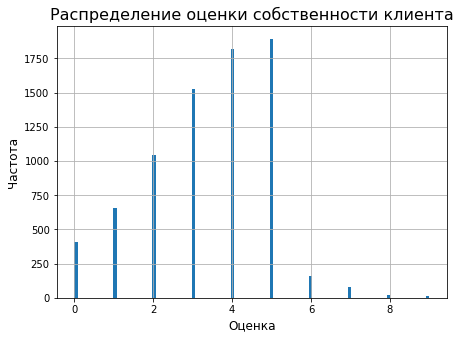

In [80]:
# посмотрим на распределение без клиентов с пропусками в балансе
plot_hist(data[~(data['balance'].isna())], 'equity', 'Распределение оценки собственности клиента', xlabel='Оценка')

In [81]:
ratio_table(data, 'equity')

Количество клиентов  Доля
equity                           
-1                     2245  0.23
 5                     1892  0.19
 4                     1822  0.18
 3                     1526  0.15
 2                     1043  0.11
 1                      655  0.07
 0                      406  0.04
 6                      157  0.02
 7                       77  0.01
 8                       17  0.00
 9                       13  0.00

Самая многочисленная группа (23%) - это группа клиентов с пропуском в балансе. Далее идут клиенты с оценкой в 5-3 бала (суммарно 48%). Т.е. **имущество большинства клиентов оценивается в 3-5 баллов или меньше**, более высокая оценка имущества - уже крайне редкое явление.

#### Баланс на счетах банка среднестатистического клиента

In [82]:
data['balance'].describe()

count    7.608000e+03
mean     8.238616e+05
std      1.982674e+06
min      0.000000e+00
25%      2.945396e+05
50%      5.226297e+05
75%      9.754941e+05
max      1.191136e+08
Name: balance, dtype: float64

**Медианный баланс составляет около 530 тыс. рублей.**

По числовому описанию уже видно, что распределение имеет довольно длинный хвост вплоть до сотен миллионов рублей на счету клиента. Оценим распределение с помощью боксплота, а затем посмотрим на баланс среднестатистического клиента.

In [83]:
fig = px.box(data, y="balance")
fig.show()

Верхняя граница внутри доверительного интервала и самый дальний выброс отличаются на порядок. В целом, клиенты с крупными суммами на счетах также не единичный случай. Посмотрим на распределение баланса для клиентов с суммами не более, чем 2 млн. рублей (верхняя граница интервала).

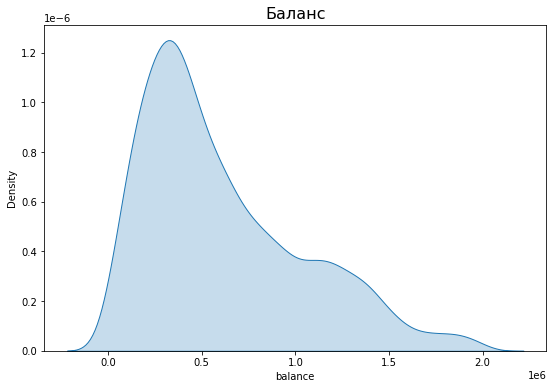

In [84]:
# посмотрим на распределение
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(data.loc[data['balance'] <= 2000000, 'balance'], shade=True, ax=ax, bw_adjust=1)
plt.title('Баланс', fontsize=16);

Итак, **большинство клиентов хранят на счетах около 400-500 тыс. рублей**. В распредлении выделяются ещё две группы: с суммой около 1,2-1,4 млн рублей, что в целом соотносится с максимальной суммой, которая застраховывается банком, а также уже довольно малочисленная группа с суммой около 1,8 млн рублей.

In [85]:
# на основе наблюдений выше, внесём в датасет дополнительные столбцы-метки отдельных групп

# группа с 400-500 рублей на балансе
data['is_balance_450'] = 0
data.loc[(data['balance'] >= 400000) & (data['balance'] <= 500000), 'is_balance_450'] = 1

# группа с 1,2-1,4 млн рублей на балансе
data['is_balance_1M'] = 0
data.loc[(data['balance'] >= 1200000) & (data['balance'] <= 1400000), 'is_balance_1M'] = 1

# группа с ~1,8 млн рублей на балансе
data['is_balance_2M'] = 0
data.loc[(data['balance'] >= 1700000) & (data['balance'] <= 1900000), 'is_balance_2M'] = 1

balance_groups_cols = ['is_balance_450', 'is_balance_1M', 'is_balance_2M']

#### Средний кредитный балл

In [86]:
data['score'].describe()

count    9853.000000
mean      848.490916
std        65.385878
min       642.000000
25%       802.000000
50%       852.000000
75%       899.000000
max      1000.000000
Name: score, dtype: float64

Клиентам назначают кредитные баллы от 642 до 1000. **Медианный балл - 852**.

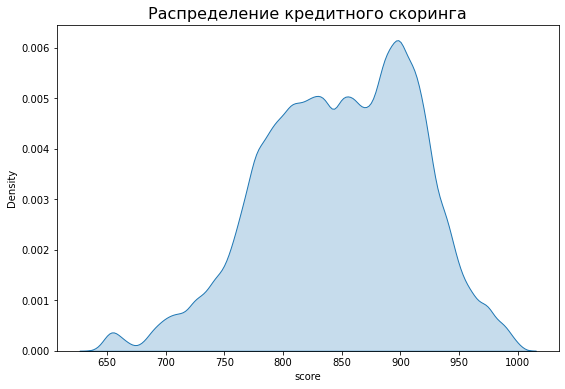

In [87]:
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(data['score'], shade=True, ax=ax, bw_adjust=0.5)
plt.title('Распределение кредитного скоринга', fontsize=16);

Распределение баллов в целом близко к нормальному, большинство клиентов получают 800-900 баллов. *Внутри этого большинства* клиентов выделяется 3 отдельные группы: 
- ***790-820 баллов:*** *отнесем группу к "среднему рейтингу",*
- ***840-860 баллов:*** *группа "повышенный рейтинг",*
- ***880-910 баллов:*** *группа "высокий рейтинг".*

Больше всего клиентов банка имеют именно высокий рейтинг. Средний и повышенный встречается примерно равнозначно.

In [88]:
# на основе наблюдений выше, внесём в датасет дополнительные столбцы-метки отдельных групп

# группа с 790-820 баллами
data['is_score_800'] = 0
data.loc[(data['score'] >= 790) & (data['score'] <= 820), 'is_score_800'] = 1

# группа с 840-860 баллами
data['is_score_850'] = 0
data.loc[(data['score'] >= 840) & (data['score'] <= 860), 'is_score_850'] = 1

# группа с 880-910 баллами
data['is_score_900'] = 0
data.loc[(data['score'] >= 880) & (data['score'] <= 910), 'is_score_900'] = 1

score_groups_cols = ['is_score_800', 'is_score_850', 'is_score_900']

#### Количество клиентов, пользующихся кредитной картой

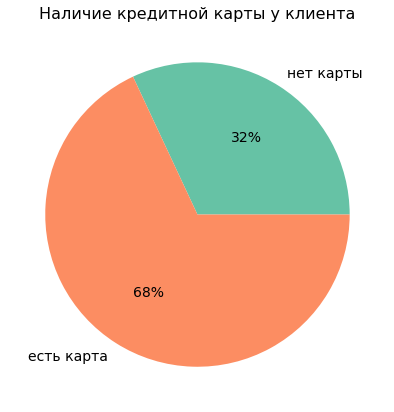

In [89]:
fig, ax = plt.subplots(figsize=(7,7))
plot_pie(data, 'credit_card', None, labels=['нет карты', "есть карта"])
plt.title('Наличие кредитной карты у клиента', fontsize=16);

**У 68% клиентов есть кредитная карта.**

#### Полученные особенности среднестатистического клиента банка

1. *Как и ожидалось, большинство клиентов находятся в Ярославле.*
2. *В банке одинаковое количество женщин и мужчин.*
3. ***В основном клиенты - люди среднего возраста.*** *Кроме того, их можно разделить на подгруппы: 30-40 лет (самая многочисленная группа) и 55-60 лет.*
4. ***Клиенты пользуются в основном не более, чем 2 продуктами*** *(85%). Более половины клиентов используют ровно 2 продукта банка.*
5. ***Доход*** *клиента в месяц в среднем составляет* ***80-120 тыс. рублей.***
6. ***Имущество клиента оценивается средне:*** *около 3-5 баллов или меньше. Большую оценку получают редко.*
7. ***Большинство клиентов хранят на счетах около 400-500 тыс. рублей.*** *Присутствует ещё 2 подгруппы: 1,2-1,4 млн рублей и около 1,8 млн рублей.*
8. ***Медианный кредитный балл - 852.*** *Клиенты делятся на 3 подгруппы: "средний рейтинг" - 790-820 баллов, "повышенный рейтинг" - 840-860 баллов и "высокий рейтинг" - 880-910 баллов.*
9. ***Большинство клиентов банка пользуются кредитной картой (68%).***
10. *Кроме того, есть отдельная группа клиентов с пропусками в столбце balance, которые в основном пользуются только 1 продуктом (85%), имеют доход в среднем больше, чем у остальных, их имущество оценивается в 0 ед. (95%).*

### Углубленный анализ групп клиентов

Исследуем особенности клиентов по признакам и зависимости между этими признаками. Первичный взгляд на взаимосвязи оценим с помощью общей матрицы корреляций, а далее подробнее рассмотрим видимые на ней зависимости.

In [90]:
# добавим условия для выделения среднестатистического клиента
condition = 'balance <= 2000000 and est_salary <= 350000'

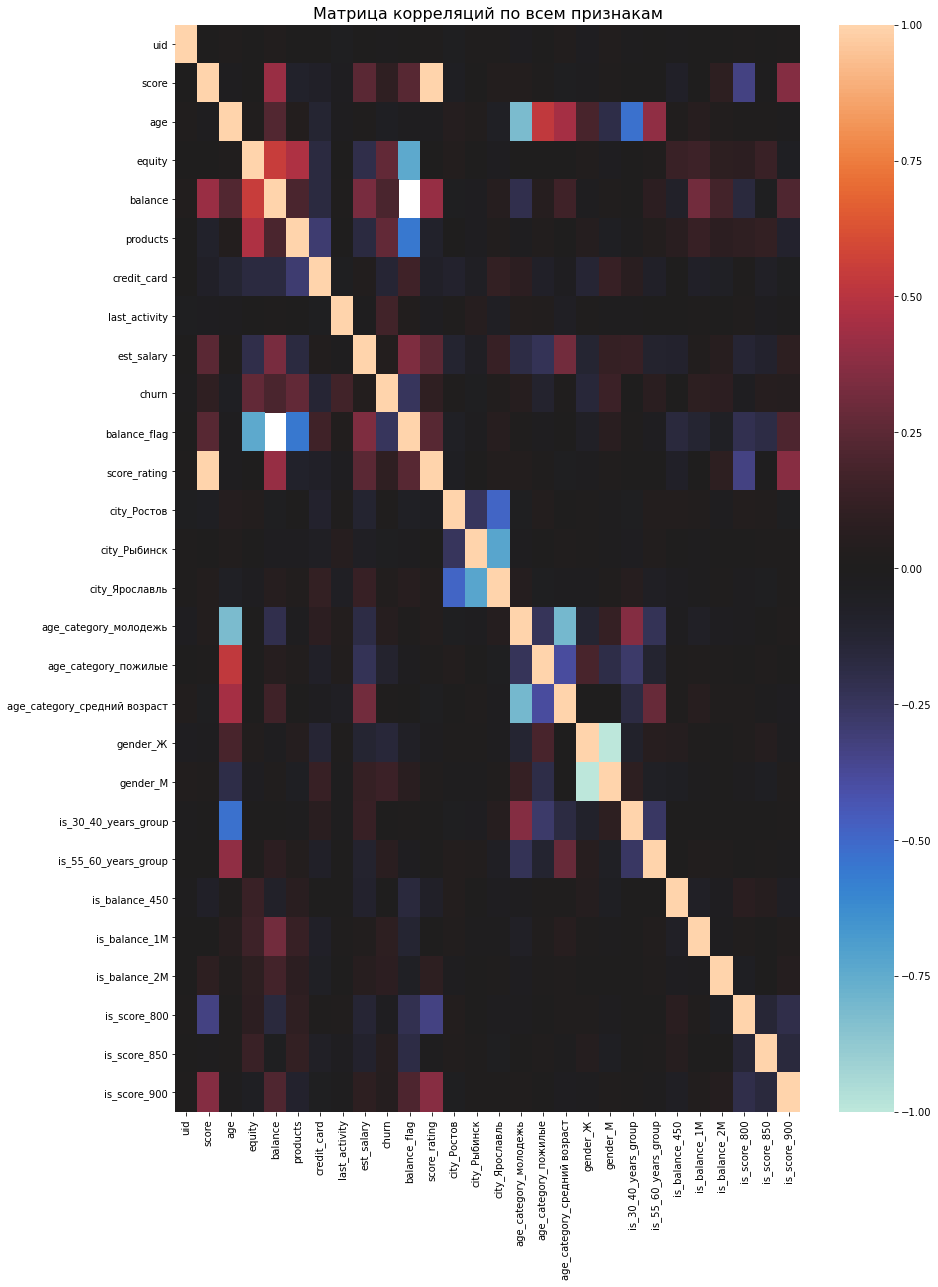

In [91]:
# посмотрим матрицу корреляции для всего датасета
matr_corr(data, data.columns, 'Матрица корреляций по всем признакам', False, (14,20))

Самые высокие значения коэффициента Пирсона проявляются у столбцов `score`, `equity`, `balance`, `products`, `balance_flag`. Практически со всем признаками так или иначе коррелируют `credit_card` и `est_salary`. Кроме того, прослеживается связь между возрастом и полом клиента.

#### Особенности клиентов разного пола

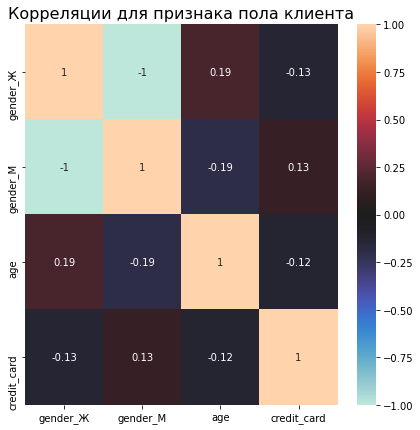

In [94]:
# посмотрим на самые сильные корреляции
matr_corr(data, gender_cols + ['age', 'credit_card'], 'Корреляции для признака пола клиента')

***Из матрицы корреляций видно, что в среднем среди клиентов банка женщины старше мужчин, при этом женщины менее охотно заводят кредитные карты.*** Посмотрим на разницу количественно.

In [95]:
(
    data
    .groupby('gender')
    .agg({
        'age' : 'mean',
        'credit_card' : 'mean'
    })
)

age  credit_card
gender                        
Ж       45.339155     0.620634
М       40.165754     0.740110

Средний возраст клиентов женского пола 45 лет, мужского - 40. При этом среди мужчин кредитную карту заводят 74% клиентов, а среди женщин - 62%. Посмотрим, меняется ли соотношение между долями клиентов, владеющих кредитной картой, в разрезе их пола с изменением возрастной категории.

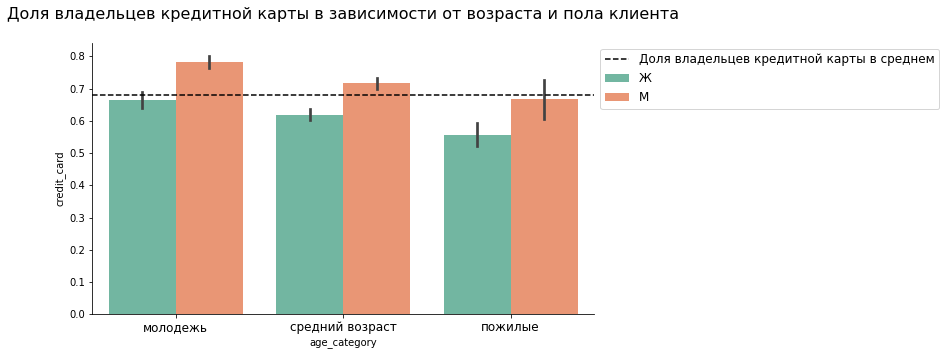

In [96]:
bar_plot(data, "age_category", "credit_card", "gender", np.mean,
         title='Доля владельцев кредитной карты в зависимости от возраста и пола клиента')

# отметим на графике среднюю долю по всему датасету
axline_plot(data['credit_card'].mean(), 'Доля владельцев кредитной карты в среднем')

Никаких качественных отличий между разными возрастными категориями нет. Можно только отметить ***постепенное снижение доли владельцев кредитной карты с повышением возраста для обоих полов***.

***Итак:***
1. *Средний возраст клиентов женского пола выше, чем мужского (45 лет и 40).*
2. *Среди женщин меньше владельцев кредитных карт, чем среди мужчин (значения долей отличаются на ~10%). Эта тенденция не меняется с возрастом клиента.*
3. *Чем старше клиент, тем менее охотно он пользуется кредитной картой.*

#### Особенности клиентов разных возрастных категорий

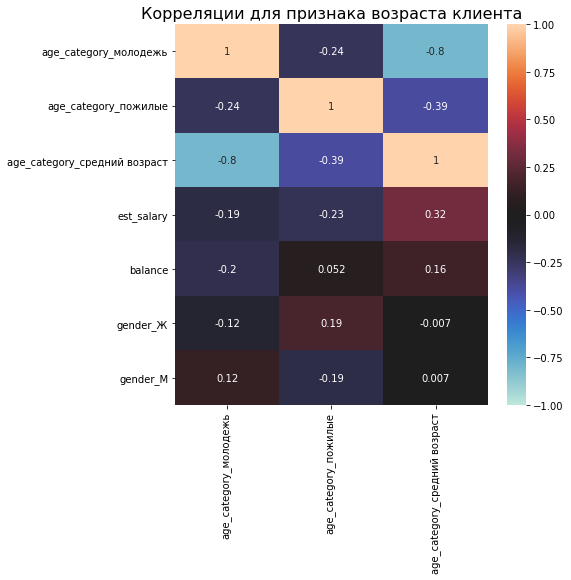

In [97]:
matr_corr(data, age_cols + ['est_salary', 'balance'] + gender_cols, 'Корреляции для признака возраста клиента',
         cols_show = age_cols
         )

Прослеживается небольшая зависимость баланса на счетах клиента и оценочного ежемесячного дохода с возрастной группой клиента. Зависимость от пола клиента была изучена в предыдущем пункте.

Воспользуемся диаграммами рассеяния.

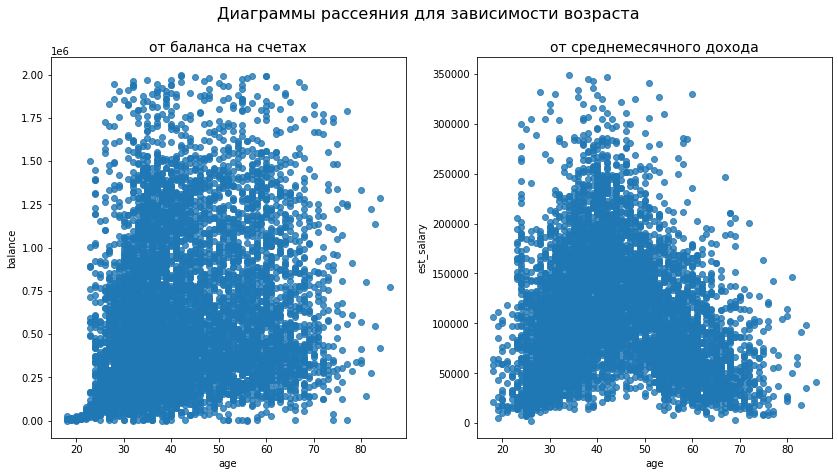

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Диаграммы рассеяния для зависимости возраста' +'\n', fontsize=16)

sns.regplot(x=data.query(condition)['age'], y=data.query(condition)['balance'], fit_reg=False, ax=axes[0])
axes[0].set_title('от баланса на счетах', fontsize=14)

sns.regplot(x=data.query(condition)['age'], y=data.query(condition)['est_salary'], fit_reg=False, ax=axes[1])
axes[1].set_title('от среднемесячного дохода', fontsize=14);

В случае с балансом на счете сильная зависимость от возраста присутствуют только для клиентов в возрасте до ~24 лет: баланс этих клиентов сильно ограничен. Кроме того заметно, что в среднем нижняя граница баланса имеет тенденцию к повышению с ростом возраста клиента.

In [99]:
print('Медианный баланс клиентов в возрасте до 25 лет:',
     data[data['age'] < 25]['balance'].median())

Медианный баланс клиентов в возрасте до 25 лет: 77347.31


Медианное значение для самых молодых клиентов отличается от среднестатистического клиента на порядок (медиана по всему датасету: 530 тыс. рублей).

Зависимость дохода клиента от возраста иметь чуть более сложный характер: молодые люди имеют самый низкий доход, к среднему возрасту доход возрастает, к пожилому - снова снижается. Эта тенденция тоже является естественной.

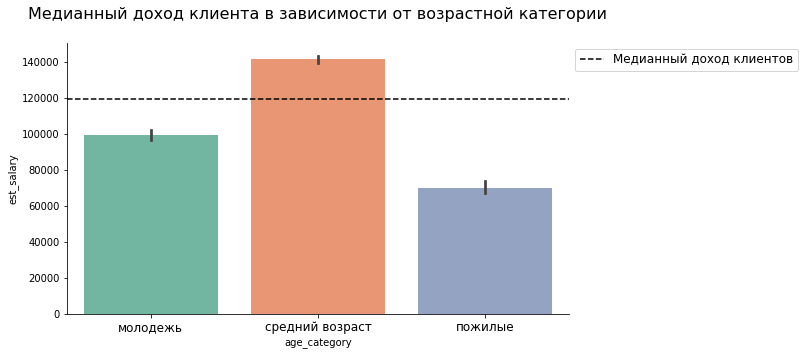

In [100]:
# подтвердим утверждение выше расчетом медианного дохода клиентов
bar_plot(data, "age_category", "est_salary", None,
         title='Медианный доход клиента в зависимости от возрастной категории')

# отметим на графике медианный доход по всему датасету
axline_plot(data['est_salary'].median(), 'Медианный доход клиентов')

***Итак:***
1. *Средний возраст клиентов женского пола выше, чем мужского.*
2. *Клиенты в возрасте до 25 лет хранят ограниченные суммы на счетах банка (медианное значение - 77 тыс. рублей против 530 тыс. для среднестатистического клиента).*
3. *Самый высокий ежемесячный доход в среднем имеют клиенты среднего возраста, следующими идут молодые клиенты, на последнем месте - пожилые.*

#### Особеннности клиентов разных городов

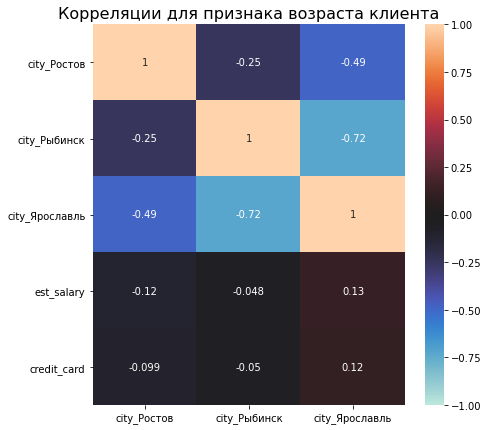

In [101]:
matr_corr(data, city_cols + ['est_salary', 'credit_card'], 'Корреляции для признака возраста клиента',
         cols_show = city_cols
         )

Прослеживается небольшая взаимосвязь между местом жительства клиента и его доходом, а также наличием кридитной карточки.

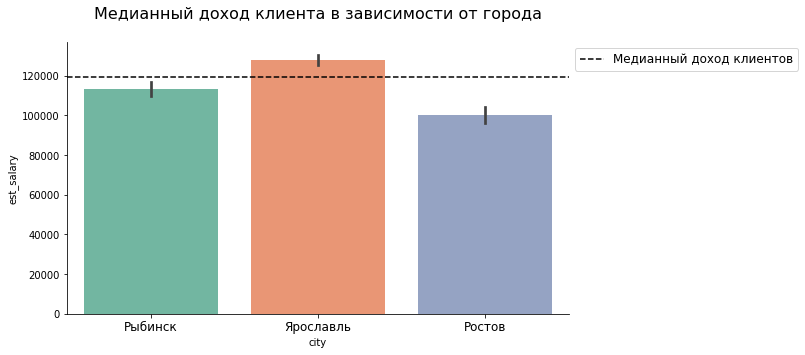

In [102]:
bar_plot(data, "city", "est_salary", None,
         title='Медианный доход клиента в зависимости от города')

# отметим на графике медианный доход по всему датасету
axline_plot(data['est_salary'].median(), 'Медианный доход клиентов')

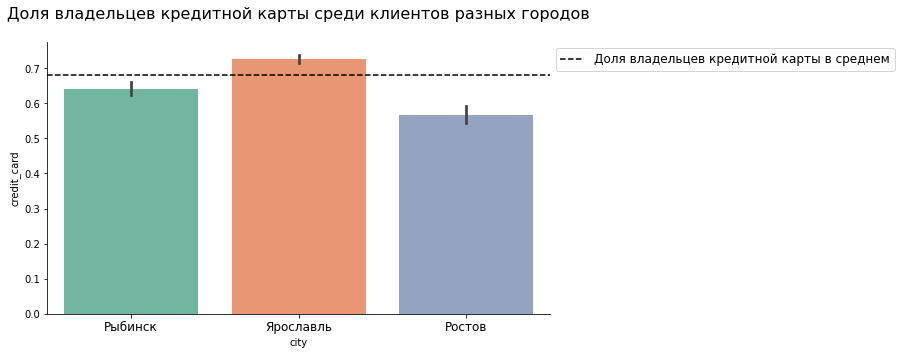

In [103]:
bar_plot(data, "city", "credit_card", None, np.mean,
         title='Доля владельцев кредитной карты среди клиентов разных городов')

# отметим на графике среднюю долю по всему датасету
axline_plot(data['credit_card'].mean(), 'Доля владельцев кредитной карты в среднем')

Клиенты Ярославля имеют в среднем более высокий ежемесячный доход, среди них также больше владельцев кредитных карт (около 70%).

***Итак:***
1. *Самый высокий ежемесячный доход - в Ярославле. Следующий в рейтинге - Рыбинск, затем - Ростов Великий.*
2. *Больше всего владельцев кредитных карт среди клиентов Ярославля (70%). Меньше всего - Ростова Великого (55%).*

####  Особенности клиентов-владельцев кредитной карты

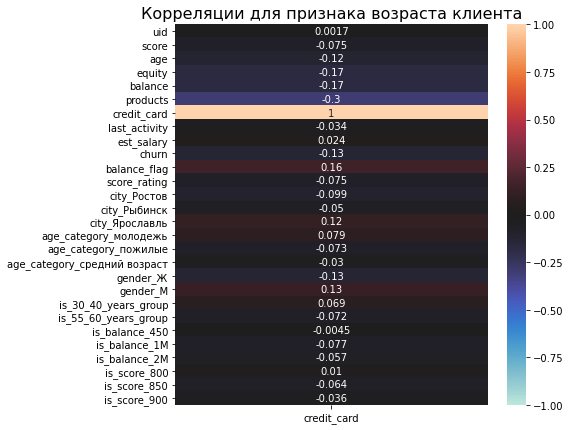

In [104]:
matr_corr(data, data.columns, 'Корреляции для признака возраста клиента',
         cols_show = ['credit_card']
         )

Наличие кредитной карты связано с признаками возраста, оценки собственности, количеством продуктов, наличием пропусков в столбце с балансом, жительством клиента в Ярославле и полом. Корреляция с кредитным скорингом слабая, самая высокая корреляция - с количеством продуктов клиента.

***Из предыдущих пунктов известно:***
1. *мужчины более охотно заводят кридитную карту, чем женщины (в среднем доли отличаются на 12%)*
2. *с возрастом клиенты менее охотно пользуются кредитными картами*
3. *чаще всего становятся владельцами кредитной карты в Ярославле (70% клиентов), реже всего - в Ростове Великом (55%).*

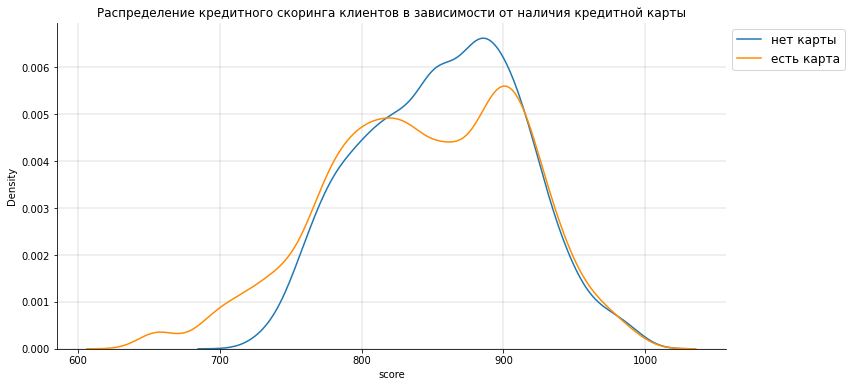

In [105]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data[data['credit_card']==0], x='score', ax=ax, 
            fill=False, common_norm=False, label='нет карты')
sns.kdeplot(data=data[data['credit_card']==1], x='score', ax=ax, color='darkorange',
            fill=False, common_norm=False, label='есть карта')
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение кредитного скоринга клиентов в зависимости от наличия кредитной карты")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12);

Интересно, что владельцы кредитных карт имеют более высокий разброс в баллах кредитного скоринга и более низкое медианное значение. Возможно, это связано с уже имеющейся кредитной нагрузкой клиента в связи с наличием кредитной карты, а потому и более низким итоговым кредитным скорингом у некоторых клиентов.

В ходе работы с пропусками было отмечено, что существует особая группа клиентов с пропусками в столбце `balance`. Особенностью этой группы является повышенная доля владельцев кредитных карт по сравнению с остальными клиентами, отобразим это на графике ниже.

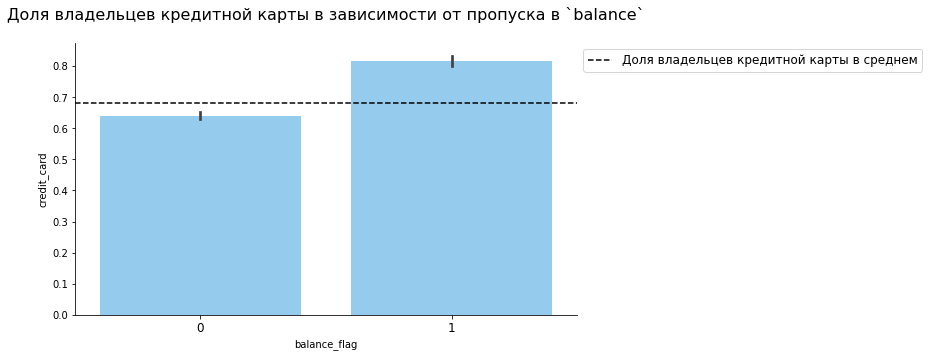

In [107]:
bar_plot(data, "balance_flag", "credit_card", None, np.mean,
         title='Доля владельцев кредитной карты в зависимости от пропуска в `balance`', color='lightskyblue')

# отметим на графике среднюю долю по всему датасету
axline_plot(data['credit_card'].mean(), 'Доля владельцев кредитной карты в среднем')

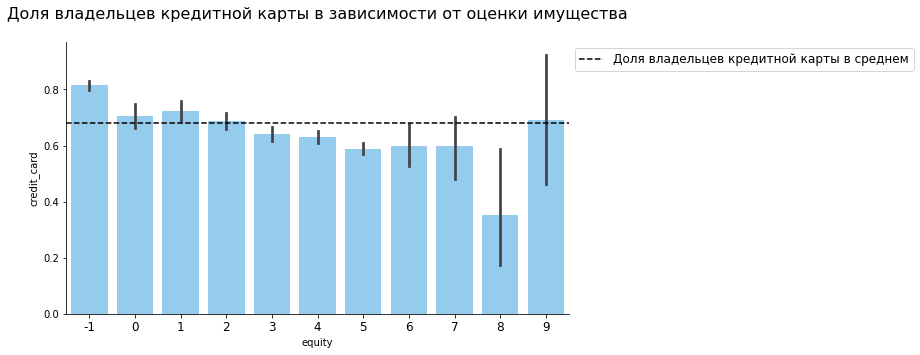

In [108]:
bar_plot(data, "equity", "credit_card", None, np.mean,
         title='Доля владельцев кредитной карты в зависимости от оценки имущества', color='lightskyblue')

# отметим на графике среднюю долю по всему датасету
axline_plot(data['credit_card'].mean(), 'Доля владельцев кредитной карты в среднем');

В большинстве случаев доля владельцев карты составляет 60-70%. Выделяются 2 категории клиентов. Первая - со значением "-1" - это категория с пропусками в столбце `balance`, которую выделяли выше. Вторая - со значением "8" - обладает удивительно низкой долей владельцев кредитных карт: менее 40%.

In [110]:
(
    data
    .groupby('equity')
    .agg({
        'score' : 'mean',         # так как из шага 1.3 известно, что распределение близко к нормальному
        'age' : 'mean',
        'equity' : 'median',
        'products' : 'median',
        'credit_card' : 'mean',   # покажет долю клиентов, которые имеют кредитную карту в данной группе
        'last_activity' : 'mean', # покажет долю клиентов, которые были активны недавно
        'est_salary' : 'mean'
    })
)

score        age  equity  products  credit_card  last_activity  \
equity                                                                        
-1      865.159911  42.122049      -1         1     0.815590       0.548775   
 0      815.103448  42.233990       0         2     0.704433       0.517241   
 1      819.937405  42.625954       1         2     0.723664       0.508397   
 2      823.678811  43.019175       2         2     0.687440       0.470757   
 3      835.025557  43.501966       3         2     0.642202       0.508519   
 4      850.940176  42.677827       4         2     0.628979       0.521405   
 5      865.322410  43.018499       5         2     0.589323       0.525370   
 6      862.789809  42.515924       6         2     0.598726       0.566879   
 7      867.532468  41.909091       7         2     0.597403       0.623377   
 8      888.882353  46.352941       8         2     0.352941       0.647059   
 9      891.384615  38.692308       9         2     0.692308       0.461538   

           est_salary  
equity                 
-1      226744.657390  
 0      109037.527833  
 1      107323.864137  
 2      112066.492253  
 3      118346.088971  
 4      127287.751411  
 5      141571.245174  
 6      130781.379809  
 7      117658.263247  
 8      127470.032941  
 9      117564.523846

Эти клиенты в среднем старше остальных на 3-5 лет, кроме того 65% этих клиентов были активны в последнее время.

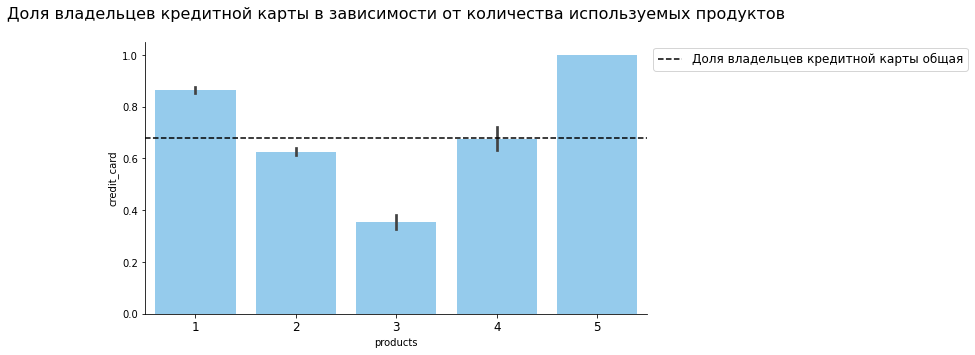

In [111]:
bar_plot(data, "products", "credit_card", None, np.mean,
         title='Доля владельцев кредитной карты в зависимости от количества используемых продуктов', color='lightskyblue')

# отметим на графике среднюю долю по всему датасету
axline_plot(data['credit_card'].mean(), 'Доля владельцев кредитной карты общая');

В разрезе по количеству используемых клиентом продуктов, доля владельцев кредитных карт сильно отличается. Все клиенты, владующие 5-ю продуктами, пользуются в том числе и кредитной картой. Меньше всего доля пользователей кредитной карты среди владельцев 3-х продуктов (около 30%).

Возможно, владельцы 3-х продуктов пользуются каким-то конкретным пакетом услуг, включающих в себя 3 продукта, среди которых обычно нет кредитной карты, и тогда именно по этой причине мы наблюдаем особенности для этих клиентов. Максимальное значение доли владельцев кредитной карты среди клиентов с 5-ю продуктами так же закономерно: вероятно, эти клиенты используют все продукты, предлагаемые нашим банком, в том числе и кредитную карту.

***Итак:***
1. *Мужчины более охотно заводят кридитную карту, чем женщины (в среднем доли отличаются на 12%).*
2. *С возрастом клиенты менее охотно пользуются кредитными картами.*
3. *Чаще всего становятся владельцами кредитной карты в Ярославле (70% клиентов), реже всего - в Ростове Великом (55%).*
4. *Среди клиентов, для которых отсутствует информация о балансе на их счетах, доля владельцев кредитной карты повышена: около 80%.*
5. *Клиенты с оценкой имущества в 8 единиц характеризуются значительно пониженой долей владельцев кредитной карты - менее 40%.*
6. *Все клиенты, пользующиеся 5-ю продуктами банка, владеют кредитной картой.*
7. *Среди клиентов, пользующихся только 3-мя продуктами банка, менее 40% владеют кредитной картой.*

#### Особенности клиентов в зависимости от количества приобретенных продуктов

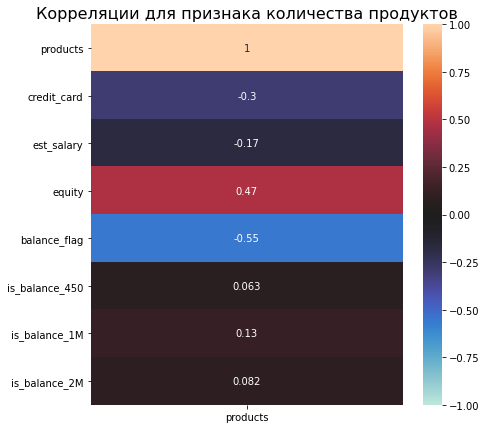

In [112]:
matr_corr(data, ['products', 'credit_card', 'est_salary', 'equity', 'balance_flag'] + balance_groups_cols, 
          'Корреляции для признака количества продуктов',
         cols_show = ['products']
         )

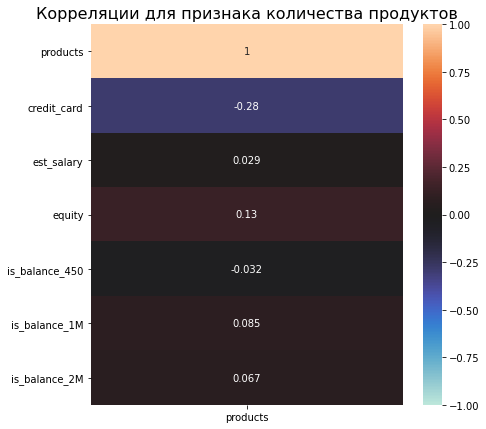

In [113]:
# посмотрим на корреляции без группы клиентов с пропусками в балансе
matr_corr(data[data['balance_flag'] == 0], ['products', 'credit_card', 'est_salary', 'equity'] + balance_groups_cols, 
          'Корреляции для признака количества продуктов',
         cols_show = ['products']
         )

Наибольшая корреляция признака кол-ва продуктов наблюдается с признаками оценки имущества и наличием пропуска в информации о счетах клиента.

**Из предыдущих пунктов:**
1. *Все клиенты, владеющие 5-ю продуктами, пользуются в том числе и кредитной картой. Меньше всего доля пользователей кредитной карты среди владельцев 3-х продуктов (около 30%). Второе место по доле клиентов с кредиткой - это пользователи одного продукта.*

In [114]:
(
    data[['products', 'balance_flag'] + balance_groups_cols]
    .groupby('products')
    .agg('mean')
    .sort_values(by='is_balance_1M', ascending=False)
)

balance_flag  is_balance_450  is_balance_1M  is_balance_2M
products                                                            
5             0.000000        0.000000       0.166667       0.000000
4             0.000000        0.070022       0.100656       0.045952
3             0.027424        0.093046       0.095005       0.019589
2             0.061144        0.095266       0.052465       0.011834
1             0.580164        0.048981       0.014299       0.001521

Среди клиентов с 5-ю продуктами 17% - это клиенты с суммой около 1 млн рублей на счетах. Среди клиентов, пользующихся только 1-м продуктом, 58% - это клиенты с отсутствием данных о их балансе.

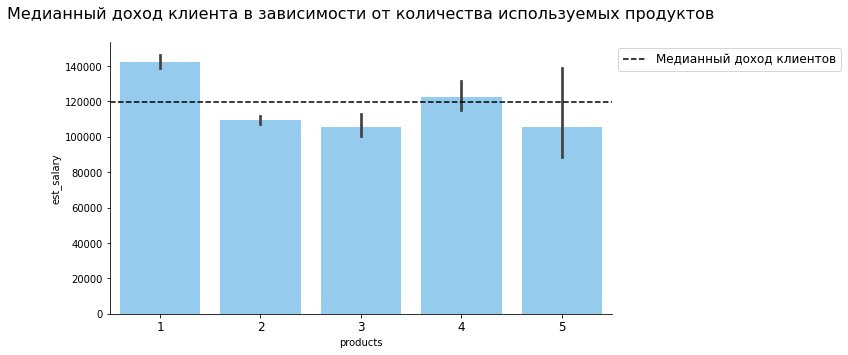

In [115]:
bar_plot(data, "products", "est_salary", None,
         title='Медианный доход клиента в зависимости от количества используемых продуктов', color='lightskyblue')

# отметим на графике медианный доход по всему датасету
axline_plot(data['est_salary'].median(), 'Медианный доход клиентов')

Клиенты с одним продуктом в среднем имеют больший доход (медианное значение составляет 140 тыс. рублей) и с 4-мя продуктами (120000). Так как с одним продуктом - это в основном пользователи, у которых отсутствует информация о балансе, а нам известно, что в среднем доход этих пользователей выше, оценим эту взаимосвязь, исключив этих пользователей.

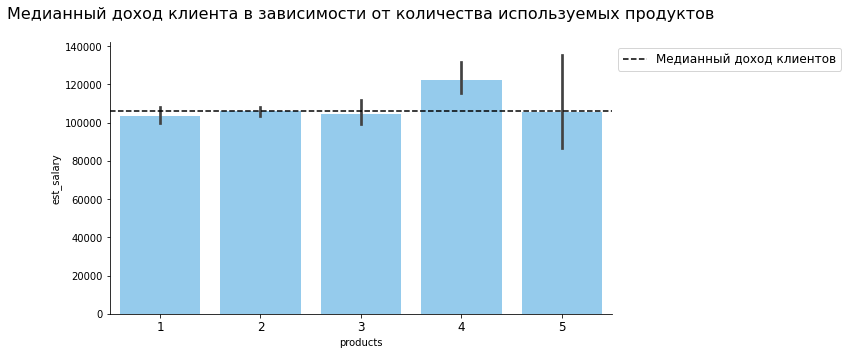

In [116]:
bar_plot(data[data['balance_flag'] == 0], "products", "est_salary", None,
         title='Медианный доход клиента в зависимости от количества используемых продуктов', color='lightskyblue')

# отметим на графике медианный доход по всему датасету
axline_plot(data.loc[data['balance_flag'] == 0, 'est_salary'].median(), 'Медианный доход клиентов')

Как видим, в таком случае выделяется только  группа пользователей с 4-мя продуктами.

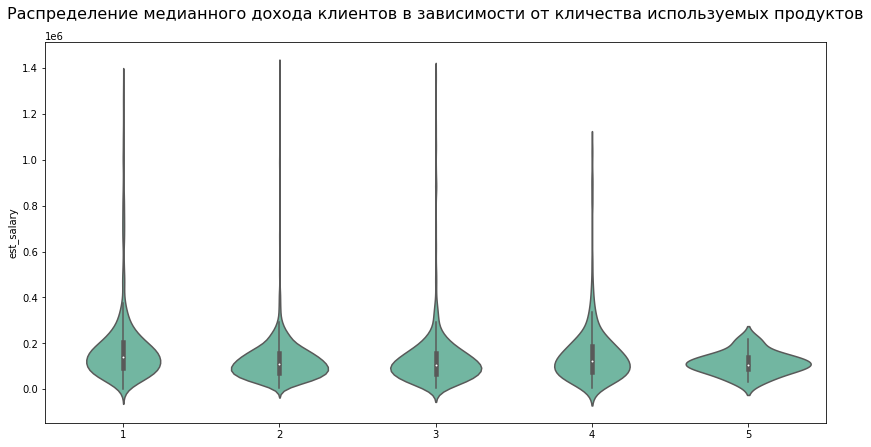

In [117]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.violinplot(x='products', y='est_salary', data=data, ax=ax, color = sns.color_palette('Set2')[0])
plt.xlabel('')
plt.title('Распределение медианного дохода клиентов в зависимости от кличества используемых продуктов' + '\n', fontsize=16);

Интересно, что у клиентов с 5-ю продуктами, в отличие от всех остальных групп, отсутствует широкий разброс ежемесячного дохода.

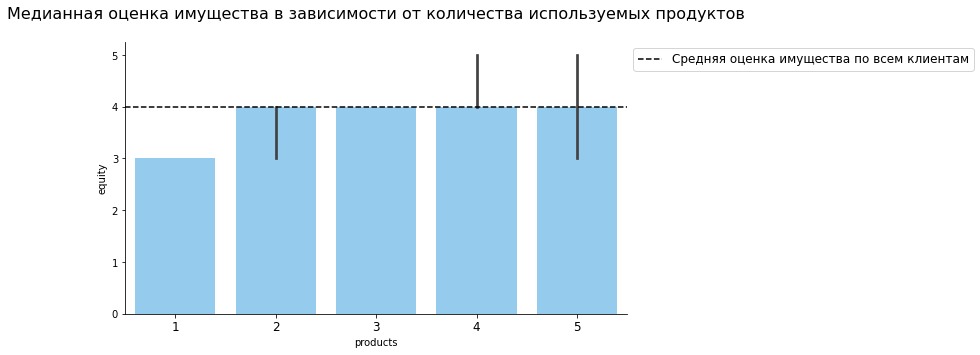

In [118]:
bar_plot(data[data['equity'] != -1], "products", "equity", None,
         title='Медианная оценка имущества в зависимости от количества используемых продуктов', color='lightskyblue')

# отметим на графике медианный доход по всему датасету
axline_plot(data.loc[data['equity'] != -1, 'equity'].median(), 'Средняя оценка имущества по всем клиентам')

***Итак:***
1. *Все клиенты, владеющие 5-ю продуктами, пользуются в том числе и кредитной картой. Меньше всего доля пользователей кредитной карты среди владельцев 3-х продуктов (около 30%). Второе место по доле клиентов с кредиткой - это пользователи одного продукта.*
2. *Среди клиентов с 5-ю продуктами 17% - это клиенты с суммой около 1 млн рублей на счетах. Среди клиентов, пользующихся только 1-м продуктом, 58% - это клиенты с отсутствием данных о их балансе.*
3. *Не считая клиентов с пропусками в данных о балансе, клиенты, пользующиеся 4-мя продуктами, в среднем имеют более высокий доход (медиана: более 120 тыс. рублей против 105 тыс.).*
4. *Не считая клиентов с пропусками в данных о балансе, клиенты с одним продуктом обладают в среднем более низкой оценкой имущества.*

#### Особенности клиентов в зависимости от оценки их имущества

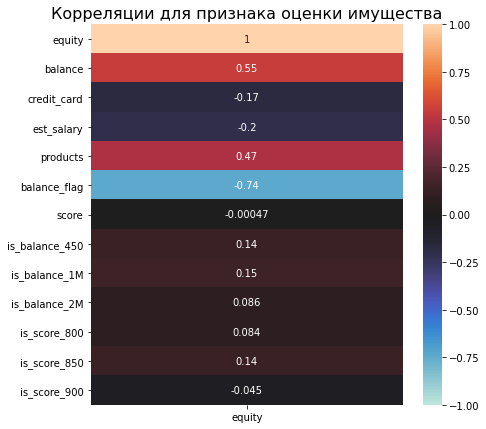

In [119]:
matr_corr(data, 
          ['equity', 'balance', 'credit_card', 'est_salary', 'products', 'balance_flag', 'score'] + \
          balance_groups_cols + score_groups_cols, 
          'Корреляции для признака оценки имущества',
         cols_show = ['equity']
         )

Наибольшая корреляция наблюдается с признаками количества продуктов и доходом клиента. Зависимость с колонкой `balance_flag` связана с тем, что практически для всей группы пользователей с пропуском в `balance` значение в `equity` было заменено на "-1".

***Из предыдущих пунктов:***
1. *Клиенты с оценкой имущества в 8 единиц характеризуются значительно пониженой долей владельцев кредитной карты - менее 40%.*
2. *Не считая клиентов с пропусками в данных о балансе, клиенты с одним продуктом обладают в среднем более низкой оценкой имущества.*

In [120]:
(
    data[['equity', 'balance_flag'] + balance_groups_cols]
    .groupby('equity')
    .agg('mean')
    .sort_values(by='is_balance_450', ascending=False)
)

balance_flag  is_balance_450  is_balance_1M  is_balance_2M
equity                                                            
 4               0.0        0.163008       0.079583       0.014819
 9               0.0        0.153846       0.000000       0.076923
 3               0.0        0.122543       0.064220       0.011796
 6               0.0        0.108280       0.031847       0.012739
 2               0.0        0.093960       0.035475       0.006711
 7               0.0        0.090909       0.000000       0.000000
 5               0.0        0.067125       0.088795       0.025899
 8               0.0        0.058824       0.000000       0.058824
 1               0.0        0.050382       0.007634       0.001527
 0               0.0        0.004926       0.002463       0.000000
-1               1.0        0.000000       0.000000       0.000000

В случае с остальными группами клиентов в зависимости от различных групп баланса, сложно выделить значимые закономерности.

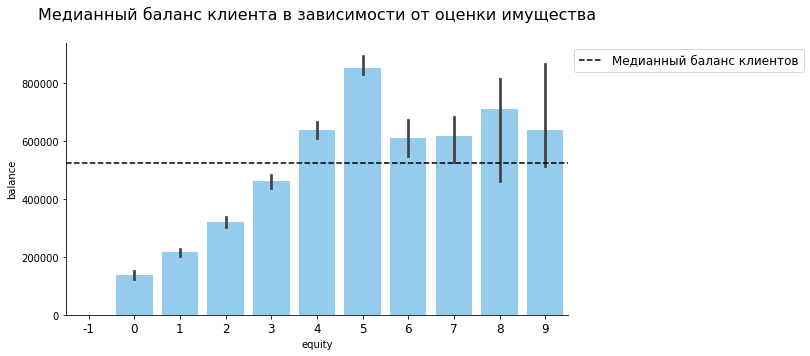

In [121]:
bar_plot(data, "equity", "balance", None,
         title='Медианный баланс клиента в зависимости от оценки имущества', color='lightskyblue')

# отметим на графике медианный доход по всему датасету
axline_plot(data['balance'].median(), 'Медианный баланс клиентов')

Клиенты с более высокой оценкой имущества хранят большие суммы на счетах в банке. Зависимость стабильно отслеживается для оценок от 0 до 5 единиц. Для оценок 6-9 на графике эта тенденция якобы отсутствует, однако так ли это в действительности сказать нельзя, так как количество клиентов с такими баллами на порядки меньше, чем количество для любой оценки от 0 до 5, поэтому, возможно, что она сохранялась бы и в дальнейшем.

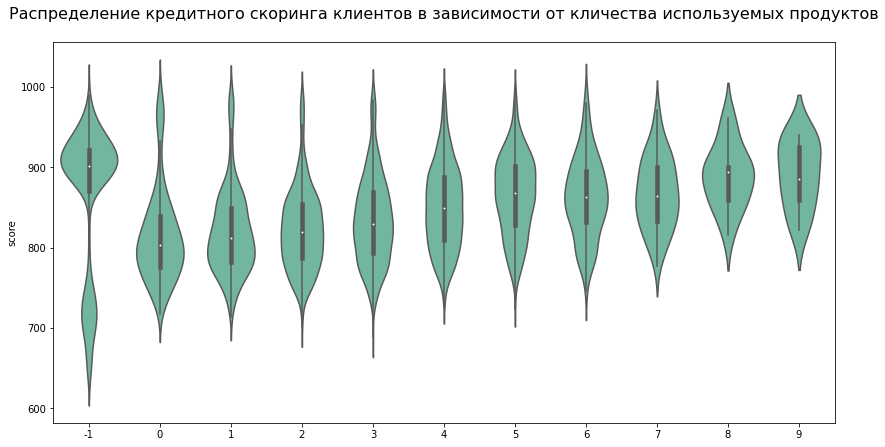

In [122]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.violinplot(x='equity', y='score', data=data, ax=ax, color = sns.color_palette('Set2')[0])
plt.xlabel('')
plt.title('Распределение кредитного скоринга клиентов в зависимости от кличества используемых продуктов' + '\n', fontsize=16);

Аналогично с зависимостью `equity` и баланса на счетах, кредитный скоринг в среднем выше, если выше оценка имущества клиента. Тенденция для оценки имущества в 6-9 не может быть однозначно определена по имеющимся данным. 

Клиенты отделенной группы со значением `equity` = "-1" (клиенты с пропуском в балансе) обладают в среднем самым высоким кредитным скорингом среди всех групп, несмотря и на самый высокий  разброс и наличие немаленькой группы людей с баллами ниже 700.

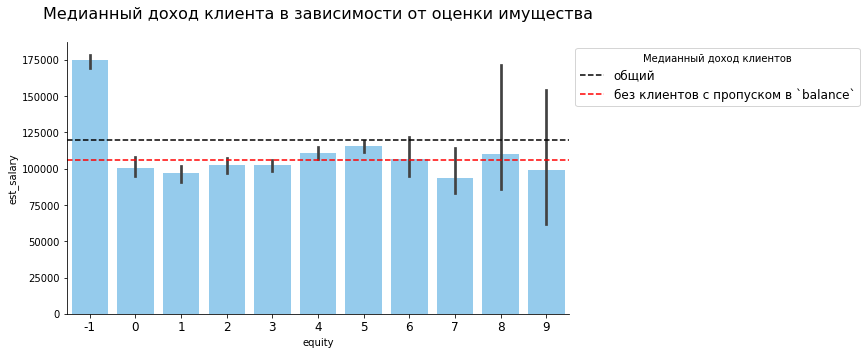

In [123]:
bar_plot(data, "equity", "est_salary", None,
         title='Медианный доход клиента в зависимости от оценки имущества', color='lightskyblue')

# отметим на графике медианный доход по всему датасету
axline_plot(data['est_salary'].median(), 'общий')
axline_plot(data.loc[data['balance_flag'] == 0, 'est_salary'].median(), 'без клиентов с пропуском в `balance`', color='red')
plt.legend(title='Медианный доход клиентов', loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12);

Можно отметить, что основная зависимость между `equity` и `est_salary` связана с отдельной группой клиентов, для которых значение в `equity` изменено искусственно.

***Итак:***
1. *Клиенты с оценкой имущества в 8 единиц характеризуются значительно пониженой долей владельцев кредитной карты - менее 40%.*
2. *Не считая клиентов с пропусками в данных о балансе, клиенты с одним продуктом обладают в среднем более низкой оценкой имущества.*
3. *Клиенты с более высокой оценкой имущества в среднем хранят большие суммы на счетах в банке.*
4. *Кредитный скоринг в среднем выше, если выше оценка имущества клиента.*
5. *Клиенты отделенной группы со значением equity = "-1" (клиенты с пропуском в балансе) обладают в среднем самым высоким кредитным скорингом.*
6. *Значительно более высокий медианный доход имеют клиенты, информация о балансе которых отсутствует в датасете.*

#### Особенности клиентов в зависимости от их дохода

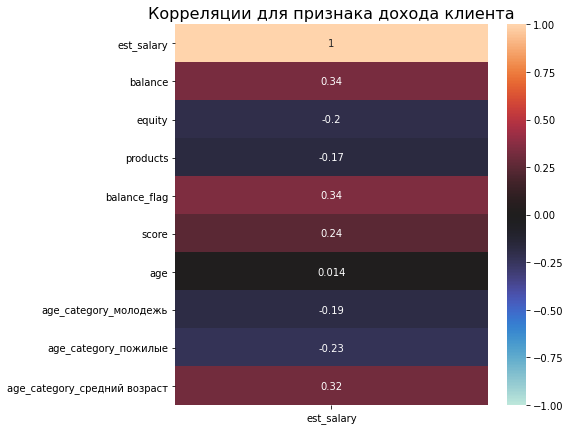

In [124]:
matr_corr(data, 
          ['est_salary', 'balance', 'equity', 'products', 'balance_flag', 'score', 'age'] + age_cols,
          'Корреляции для признака дохода клиента',
         cols_show = ['est_salary']
         )

Наиболее сильная корреляция параметра `est_salary` с признаками `balance_flag`, `balance` и `equity`. Посмотрим также на взаимосвязи на датасете без клиентов с пропусками в балансе.

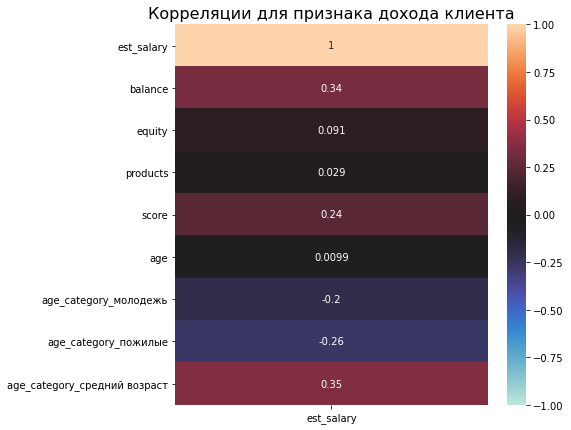

In [125]:
matr_corr(data[data['balance_flag'] == 0], 
          ['est_salary', 'balance', 'equity', 'products', 'score', 'age'] + age_cols,
          'Корреляции для признака дохода клиента',
         cols_show = ['est_salary']
         )

Корреляция с возрастом и кредитным рейтином увеличились, а вот с количеством продуктов и оценкой имущества - значительно снизились. Это связано с уже выявленной раннее особенностью клиентов с пропуском в `balance`.

***Из предыдущих пунктов:***
1. *Самый высокий ежемесячный доход в среднем имеют клиенты среднего возраста, следующими идут молодые клиенты, на последнем месте - пожилые.*
2. *Самый высокий ежемесячный доход - в Ярославле. Следующий в рейтинге - Рыбинск, затем - Ростов Великий.*
3. *Не считая клиентов с пропусками в данных о балансе, клиенты, пользующиеся 4-мя продуктами, в среднем имеют более высокий доход (медиана: более 120 тыс. рублей против 105 тыс.).*
4. *Клиенты с пропуском в `balance` в среднем имеют значительно более высокий доход, чем остальные клиенты.*

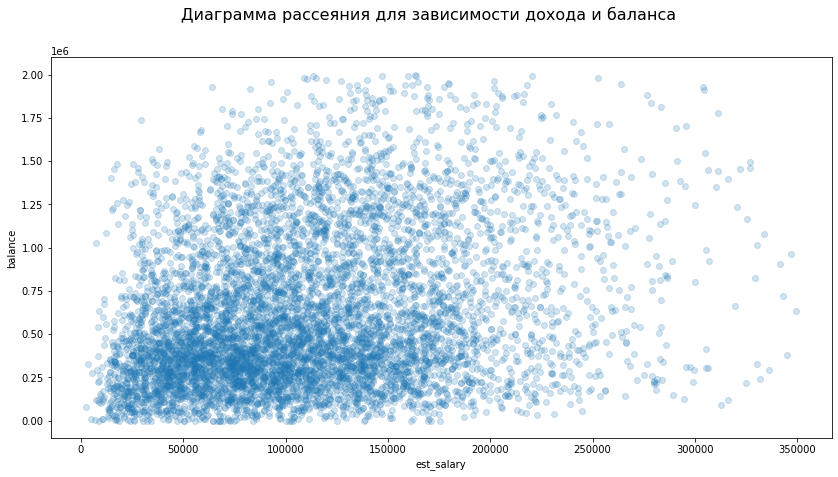

In [126]:
fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Диаграмма рассеяния для зависимости дохода и баланса' +'\n', fontsize=16)

sns.regplot(x=data.query(condition)['est_salary'], y=data.query(condition)['balance'], 
            fit_reg=False, ax=ax, scatter_kws={"alpha":0.2});

Сильной линейной зависимости не наблюдается. Можно отметить, что чем ниже доход клиента, тем больше вероятность, что и баланс на его счете будет невысок.

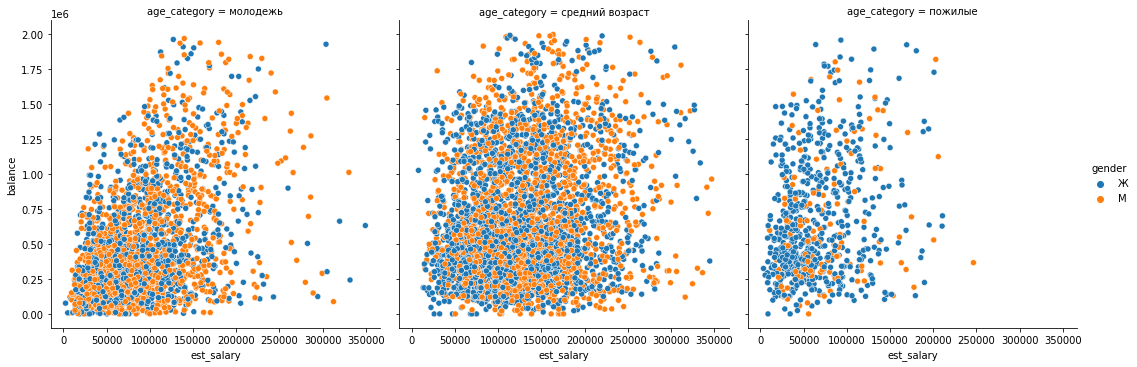

In [127]:
sns.relplot(
    data=data.query(condition), x="est_salary", y="balance",
    col="age_category", hue="gender", 
    kind="scatter"
);

В разрезе по возрастной группе клиента, можно заметить, что практически никакой связи баланса от дохода нет для клиентов среднего возраста. Другая картина в случае с молодежью и пожилыми людьми, для них заметна некоторая восходящая зависимость: чем больше доход, тем выше баланс на счете.

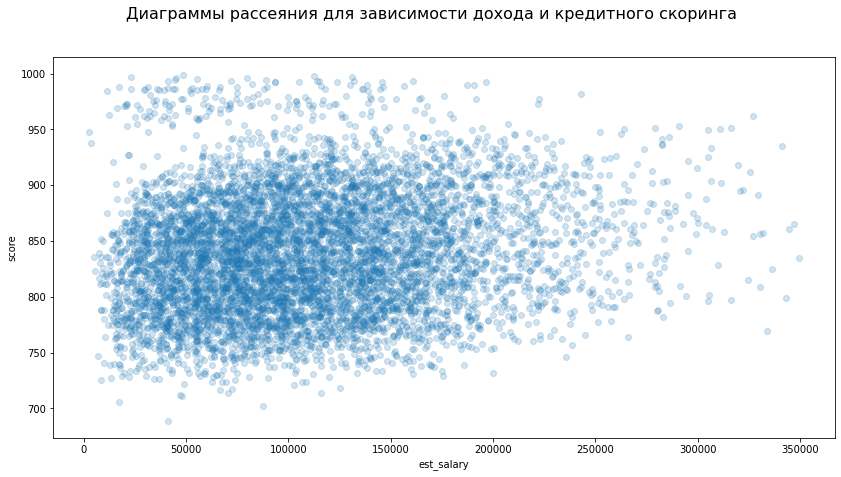

In [128]:
fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Диаграммы рассеяния для зависимости дохода и кредитного скоринга' +'\n', fontsize=16)

sns.regplot(x=data.query(condition)['est_salary'], y=data.query(condition)['score'], 
            fit_reg=False, ax=ax, scatter_kws={"alpha":0.2});

По графику можно отметить, что с ростом дохода клиента повышается нижняя граница кредитного скоринга, который в среднем получает клиент.

***Итак:***
1. *Самый высокий ежемесячный доход в среднем имеют клиенты среднего возраста, следующими идут молодые клиенты, на последнем месте - пожилые.*
2. *Самый высокий ежемесячный доход - в Ярославле. Следующий в рейтинге - Рыбинск, затем - Ростов Великий.*
3. *Не считая клиентов с пропусками в данных о балансе, клиенты, пользующиеся 4-мя продуктами, в среднем имеют более высокий доход (медиана: более 120 тыс. рублей против 105 тыс.).*
4. *Клиенты с пропуском в `balance` в среднем имеют значительно более высокий доход, чем остальные клиенты.*
5. *В среднем, чем ниже доход клиента, тем больше вероятность, что и баланс на его счете будет невысок, однако эта зависимость слабая.*
6. *Практически никакой связи баланса от дохода нет для клиентов среднего возраста.*
7. *С ростом дохода клиента повышается нижняя граница кредитного скоринга, который получает клиент.*

#### Особенности клиентов в зависимости от их кредитного скоринга.

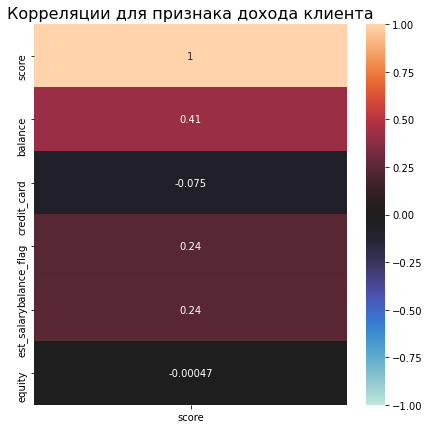

In [129]:
matr_corr(data, 
          ['score', 'balance', 'credit_card', 'balance_flag', 'est_salary', 'equity'],
          'Корреляции для признака дохода клиента',
         cols_show = ['score']
         )

Сильнее всего корреляция с `balance` и `est_salary`. Посмотрим также на корреляции в случае исключения из расчета клиентов с пропусками в `balance`.

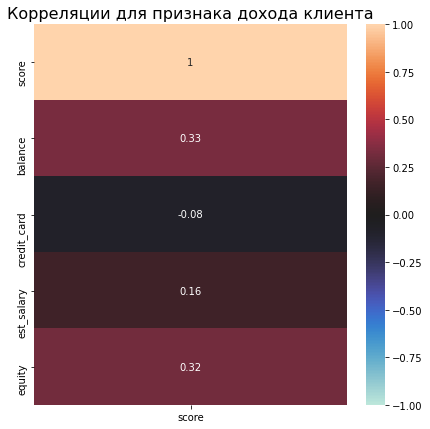

In [130]:
matr_corr(data.query(condition), 
          ['score', 'balance', 'credit_card', 'est_salary', 'equity'],
          'Корреляции для признака дохода клиента',
         cols_show = ['score']
         )

Коэффицент корреляции с `balance` увеличился, кроме того обнаружилось наличие корреляции с `equity`.

***Из предыдущих пунктов:***
1. *С ростом дохода клиента повышается нижняя граница кредитного скоринга, который получает клиент.*

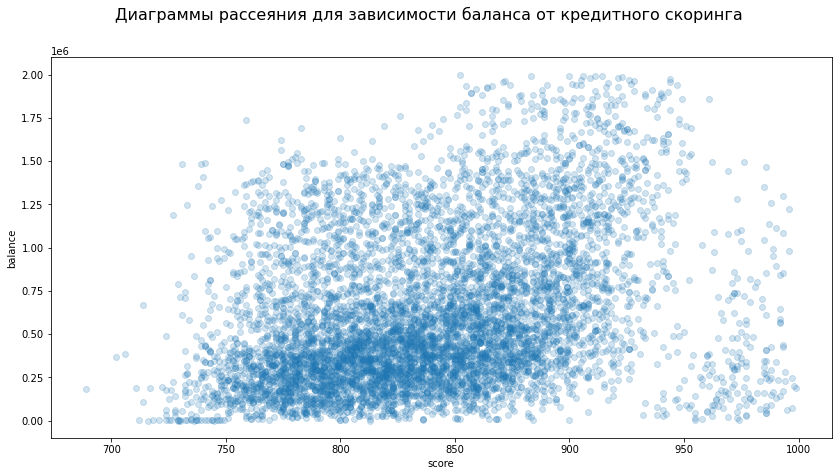

In [131]:
# построим диаграмму рассеяния для исследования зависимости `est_salary` и `balance`
fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Диаграммы рассеяния для зависимости баланса от кредитного скоринга' +'\n', fontsize=16)

sns.regplot(x=data.query(condition)['score'], y=data.query(condition)['balance'], 
            fit_reg=False, ax=ax, scatter_kws={"alpha":0.2});

В среднем прослеживается зависимость, заключающаяся в росте баланса при высоких баллах кредитного скоринга. Из этой зависимости выбивается отдельная небольшая группа клиентов с высокими баллами (более 950).

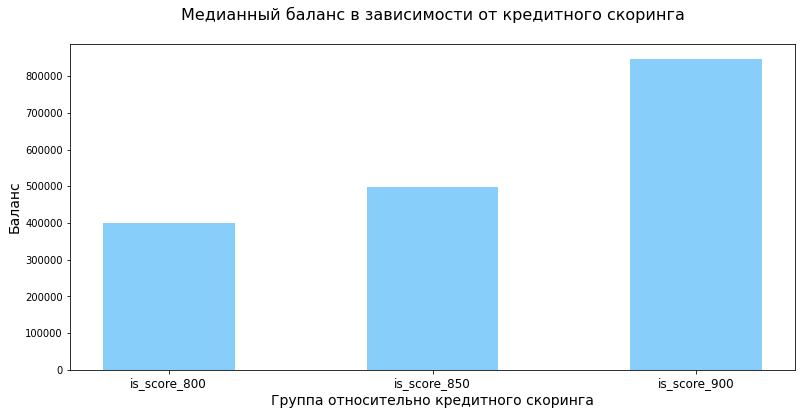

In [132]:
# убедимся в наличии зависимости путём расчета медианного баланса на счетах
# для небольших подгрупп клиентов по баллам кредитного скоринга

# высчитаем медианны для каждой из трех групп
row = []
names = []
for col in score_groups_cols:
    names.append(col)
    row.append(data.loc[data[col] == 1, 'balance'].median())

# построим график
fig, ax = plt.subplots(figsize = (13, 6))
r = [0,1,2]
plt.bar(r, row, width=0.5, color='lightskyblue')

plt.xticks(r, names)
plt.title('Медианный баланс в зависимости от кредитного скоринга' + '\n', fontsize=16)
plt.ylabel('Баланс', fontsize=14)
plt.xlabel('Группа относительно кредитного скоринга', fontsize=14)
plt.xticks(fontsize=12);

Действительно, наблюдается рост баланса.

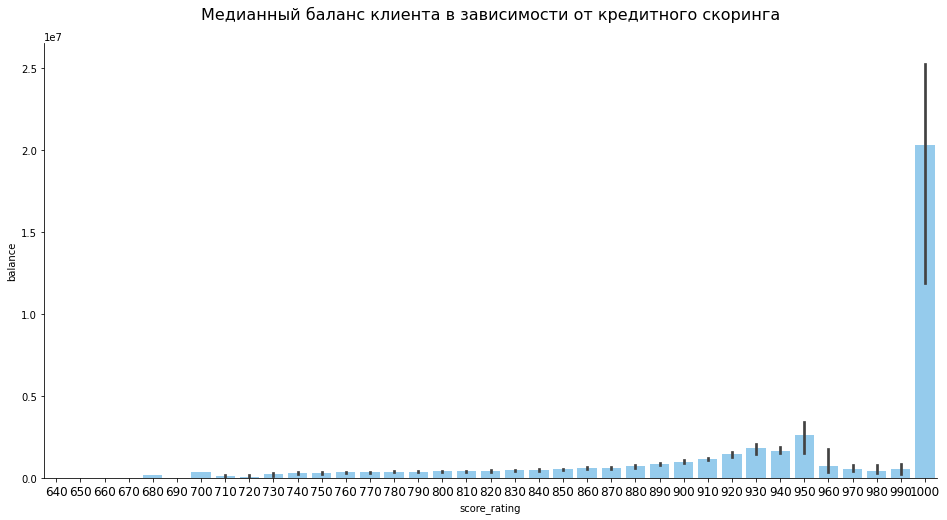

In [133]:
bar_plot(data, "score_rating", "balance", None, color='lightskyblue',
         title='Медианный баланс клиента в зависимости от кредитного скоринга', figsize=(16, 8))

In [134]:
print('Количество человек в группе, где рейтинг равен 1000:', len(data[data['score_rating'] == 1000]), 'чел.')

Количество человек в группе, где рейтинг равен 1000: 6 чел.


Колоссально отличается медианное значение для группы с рейтингом около 1000 баллов, однако в этой группе всего лишь 6 человек, которые хранят большие суммы на счетах, поэтому медианное значение для этой группы сильно выпадает. Тем не менее, за исключением групп с 960-1000 баллами, можно отметить рост баланса с повышением кредитного скоринга.

Следующий признак с выделяющимя коэффициентом корреляции - `equity`. Посмотрим на общую зависимость трех показателей.

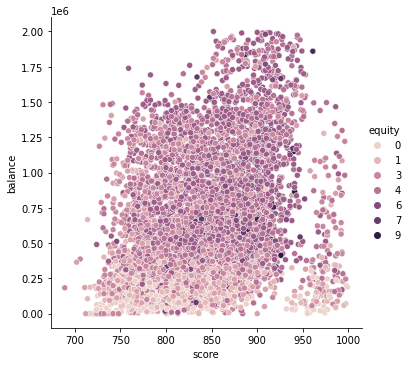

In [135]:
sns.relplot(
    data=data.query(condition), x="score", y="balance",
    hue="equity", 
    kind="scatter"
);

Можно заметить градиент цвета снизу вверх от светлого к темному в получившемся наборе точек. Это говорит о том, что кредитный скоринг меньше связан с балансом клиента, нежели оценка его имущества. Посмотрим более внимательно на взаимосвязь кредитного скоринга и оценки имущества.

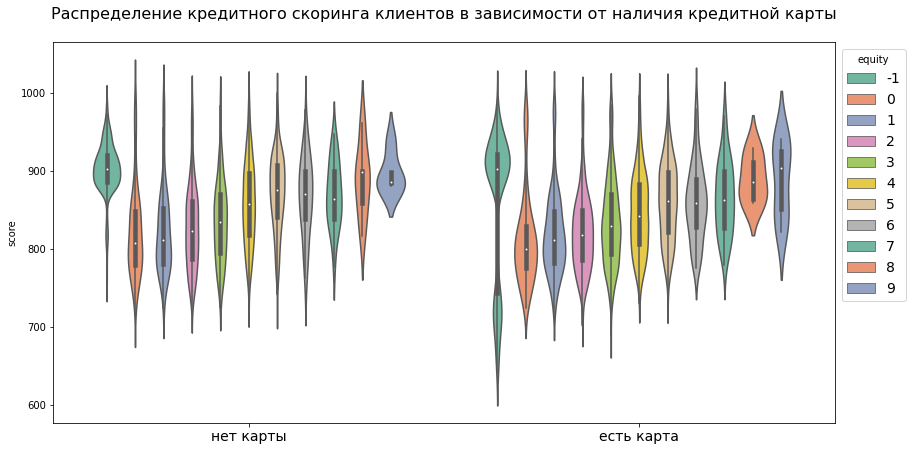

In [136]:
# посмотрим на распределение отдельных групп клиентов
fig, ax = plt.subplots(figsize=(14, 7))
sns.violinplot(x='credit_card', y='score', data=data, ax=ax, hue='equity', palette = sns.color_palette('Set2'))
ax.set_xticklabels(['нет карты', 'есть карта'], fontsize=14)

plt.xlabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=14, title='equity')
plt.title('Распределение кредитного скоринга клиентов в зависимости от наличия кредитной карты' + '\n', fontsize=16);

Самый высокий медианный кредитный балл у группы с пропусками в `balance`. Для остальных групп наблюдается постепенный рост балла с более высокими оценками имущества клиента.

***Итак:***
1. *С ростом дохода клиента повышается нижняя граница кредитного скоринга, который получает клиент.*
2. *Чем выше баланс на счетах клиента, тем более высокий у него кредитный балл.*
3. *Кредитный скоринг меньше связан с балансом клиента, нежели оценка его имущества.*
4. *Самый высокий медианный кредитный балл у группы с пропусками в `balance`.*
5. *Чем выше оценка имущества клиента, тем выше его кредитный балл.*

### Исследование оттока

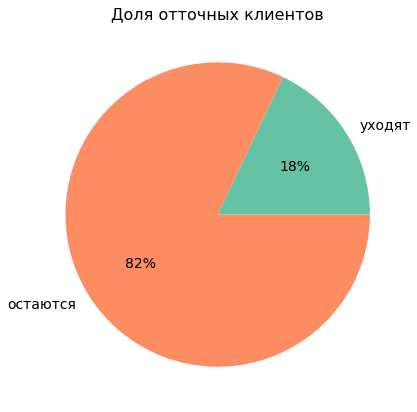

In [137]:
fig, ax = plt.subplots(figsize=(7,7))
plot_pie(data, 'churn', None, labels=['уходят', "остаются"])
plt.title('Доля отточных клиентов', fontsize=16);

Исследование особенностей клиентов, прекративших пользоваться услугами банка, начнём с получения некоторго портрета уходящего клиента.

In [138]:
# для удобной фильрации данных добавим строку-отбор отточных клиентов
churn_cond = 'churn == 1'

#### Портрет уходящего клиента

In [139]:
ratio_table(data, 'city', churn_cond, True)

Количество клиентов  Доля
city                                
Ярославль                 1088  0.19
Рыбинск                    415  0.16
Ростов                     266  0.19

*Доля отточных клиентов в Ярославле и Великом Ростове одинакова - 19%, в Рыбинске она ниже - 16%.*

In [140]:
ratio_table(data, 'age_category', churn_cond, True)

Количество клиентов  Доля
age_category                              
средний возраст                 1028  0.18
молодежь                         675  0.21
пожилые                           66  0.06

*Самая высокая доля отточных клиентов - среди молодежи (21%), меньшая - среди пожилых (6%).*

In [141]:
ratio_table(data, 'gender', churn_cond, True)

Количество клиентов  Доля
gender                           
М                      1153  0.23
Ж                       616  0.13

*Больше всего уходящих среди мужчин.*

In [142]:
print('Медианный баланс отточного клиента', f"({int(round(data.query(churn_cond)['balance'].median(), -3))})", 
      'отличается на', 
      int(round(data.query(churn_cond)['balance'].median() - data['balance'].median(), -3)),
      "от баланса стандартного клиента банка."
     )
print('Медианный доход отточного клиента', f"({int(round(data.query(churn_cond)['est_salary'].median(), -3))})",
      'отличается на',
      int(round(data.query(churn_cond)['est_salary'].median() - data['est_salary'].median(), -3)),
      "от дохода стандартного клиента банка."
     )

Медианный баланс отточного клиента (780000) отличается на 257000 от баланса стандартного клиента банка.
Медианный доход отточного клиента (125000) отличается на 6000 от дохода стандартного клиента банка.


In [143]:
print('Среднее количество используемых продуктов:', data.query(churn_cond)['products'].median())
print('Медианный кредитный скоринг:', data.query(churn_cond)['score'].median())
print('Медианная оценка имущества:', data.query(churn_cond)['equity'].median())
print('Доля владельцев кредитной карты:', f"{data.query(churn_cond)['credit_card'].mean():.1%}")

Среднее количество используемых продуктов: 2.0
Медианный кредитный скоринг: 866.0
Медианная оценка имущества: 4.0
Доля владельцев кредитной карты: 55.2%


***Особенности портрета отточного клиента:*** *это чаще всего молодой мужчина, а его баланс выше обычного клиента банка.*

#### Корреляционный анализ

<AxesSubplot:>

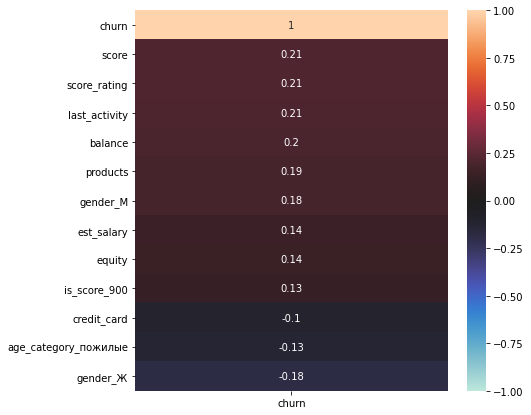

In [203]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(
    (
    data[data['balance_flag'] == 0]
    .corr(method='spearman')
    .query('churn >= 0.1 or churn <= -0.1')['churn']
    .sort_values(ascending=False)
    .to_frame()
    ), 
    ax=ax, cmap='icefire', annot=True, vmin=-1, vmax=1)


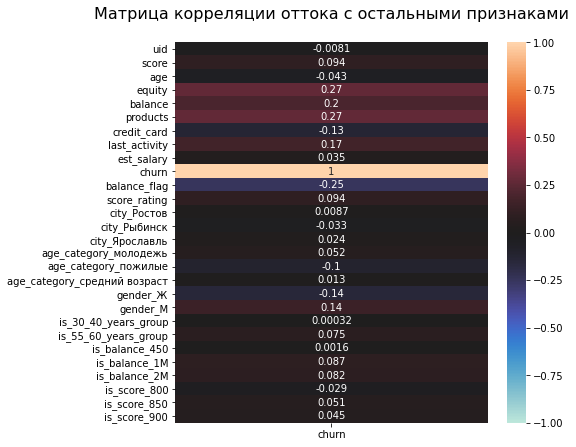

In [145]:
# посмотрим матрицу корреляции для всего датасета
matr_corr(data, data.columns, 'Матрица корреляции оттока с остальными признаками' + '\n', cols_show=['churn'])

Наибольшая корреляция признака оттока наблюдается с признаками `equity`, `products` и `balance_flag`. Так как из предыдущих шагов известно, что эти параметры сильно связаны между собой за счет отдельной группы клиентов, построим также матрицу корреляций по клиентам, у которых нет пропусков в столбце `balance`.

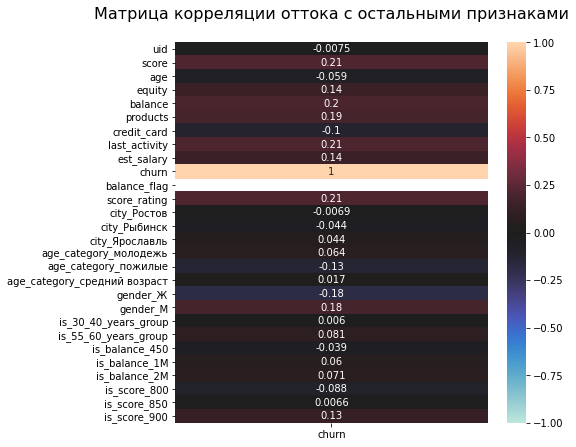

In [146]:
# посмотрим матрицу корреляции для всего датасета
matr_corr(data[data['balance_flag'] == 0], data.columns, 
          'Матрица корреляции оттока с остальными признаками' + '\n', cols_show=['churn'])

Теперь более выражена корреляция с полом клиента, группой возраста и доходом (что было видно на этапе получения портрета отточного клиента), проявляется наличие взаимосвязи с `score` и `last_activity`, а влияние `products` и `equity` снижается.

Посмотрим на имеющиеся зависимости подробнее.

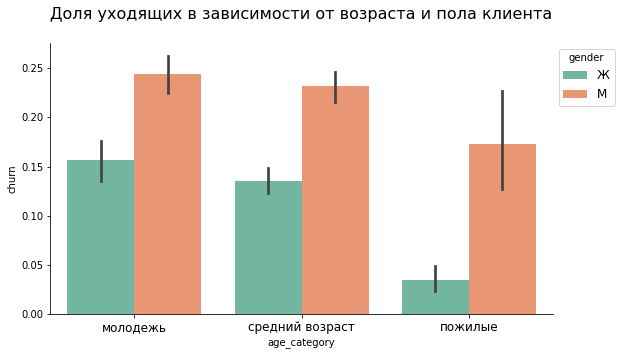

In [147]:
bar_plot(data, "age_category", "churn", "gender", np.mean,
         title='Доля уходящих в зависимости от возраста и пола клиента')

Вне зависимости от возраста, доля уходящих мужчин выше, чем женщин. Кроме того, по графику видно, что доля уходящих пожилых клиентов среди женщин в целом низкая (менее 5%), тогда как для мужчин этот показатель остаётся высоким (более 15%).

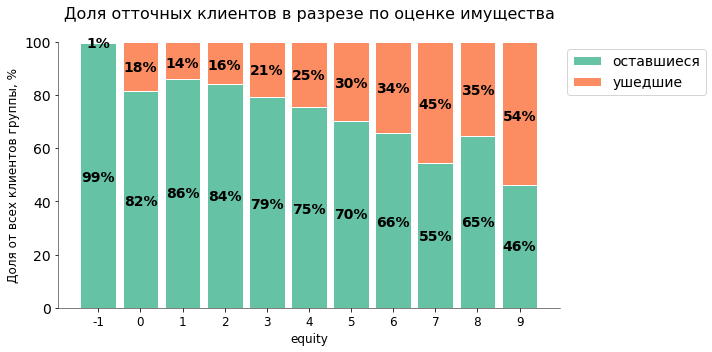

In [148]:
churn_ratio_per_category(data, 'equity', ' в разрезе по оценке имущества', (10, 5))

Можно заметить, что в целом доля отточных клиентов возрастает с повышением оценки их имущества. Немного выпадают из этой зависимости клиенты с оценкой в 8 баллов. Из углубленного анализа известно, что у этих клиентов значительно ниже доля владельцев кредитной карты, по сравнению с другими группами в разрезе.

Самой низкой отточностью (около 1%) обладает группа клиентов с пропусками в столбце `balance`.

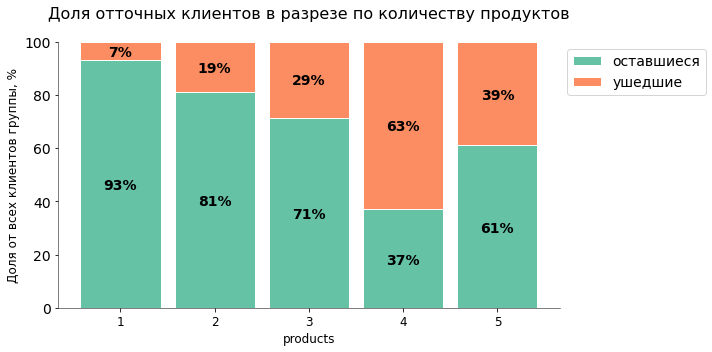

In [149]:
churn_ratio_per_category(data, 'products', ' в разрезе по количеству продуктов', (10, 5))

По всем группам, за исключением пользователей одного продукта, отточность высокая. Самая высокая доля уходящих клиентов среди пользователей 4-х продуктов. В углубленном анализе признаков было отмечено, что эти клиенты в среднем обладают более высоким доходом. Других особенностей по данной группе найдено не было.

Так как известно, что в группе с пропусками в `balance` отточности практически нет, а клиенты этой категории в основном пользуются только одним продуктом, посмотрим на зависимость с исключением этой группы пользователей.

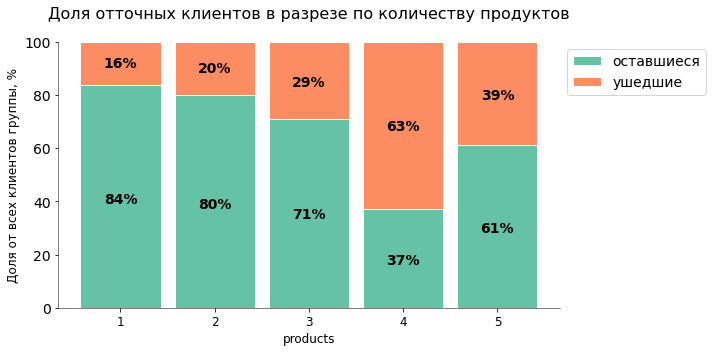

In [150]:
churn_ratio_per_category(data[data['balance_flag'] == 0], 'products', ' в разрезе по количеству продуктов', (10, 5))

Действительно, доля отточных среди пользователей одного продукта повысилась, однако это значение всё ещё остаётся самым низким в разрезе.

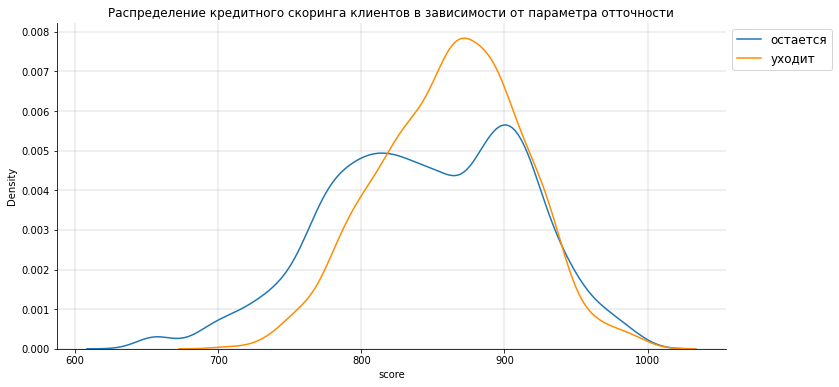

In [151]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data[data['churn']==0], x='score', ax=ax, 
            fill=False, common_norm=False, label='остается')
sns.kdeplot(data=data[data['churn']==1], x='score', ax=ax, color='darkorange',
            fill=False, common_norm=False, label='уходит')
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение кредитного скоринга клиентов в зависимости от параметра отточности")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12);

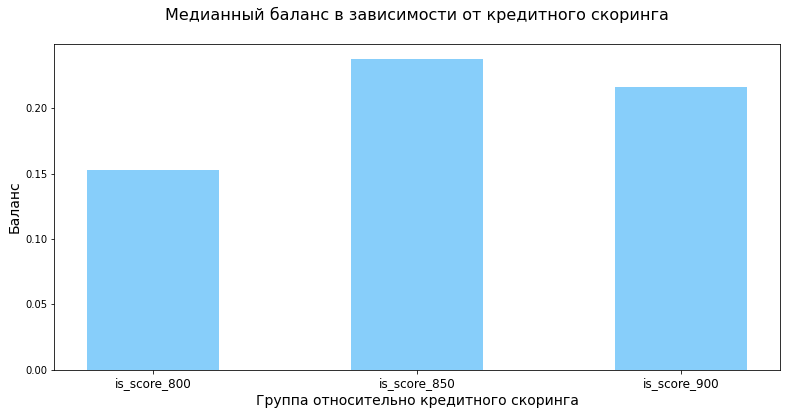

In [152]:
# убедимся в наличии зависимости путём расчета медианного баланса на счетах
# для небольших подгрупп клиентов по баллам кредитного скоринга

# высчитаем медианны для каждой из трех групп
row = []
names = []
for col in score_groups_cols:
    names.append(col)
    row.append(data.loc[data[col] == 1, 'churn'].mean())

# построим график
fig, ax = plt.subplots(figsize = (13, 6))
r = [0,1,2]
plt.bar(r, row, width=0.5, color='lightskyblue')

plt.xticks(r, names)
plt.title('Медианный баланс в зависимости от кредитного скоринга' + '\n', fontsize=16)
plt.ylabel('Баланс', fontsize=14)
plt.xlabel('Группа относительно кредитного скоринга', fontsize=14)
plt.xticks(fontsize=12);

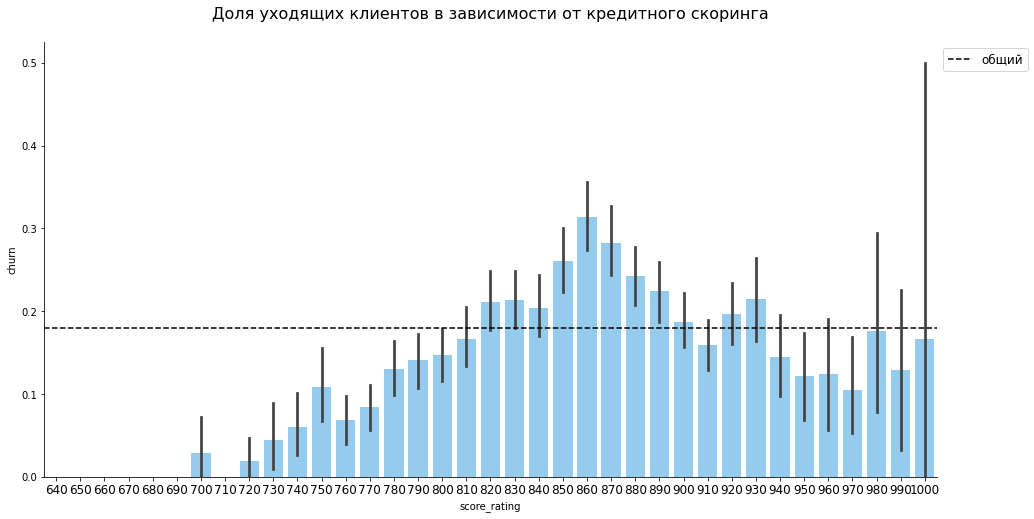

In [153]:
bar_plot(data, "score_rating", "churn", None, np.mean,
         title='Доля уходящих клиентов в зависимости от кредитного скоринга', figsize=(16, 8), color='lightskyblue')
axline_plot(data['churn'].mean(), 'общий')

Распределение отточных клиентов в основном сгруппировано у значения кредитного скоринга 820-930 баллов, медианный рейтинг этой группы также выше. Пониженный отток наблюдается среди клиентов с кредитным скорингом менее 770 баллов.

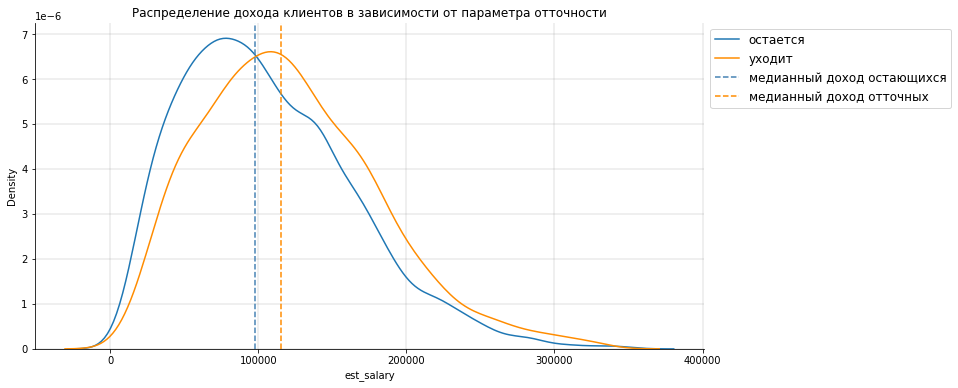

In [154]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data[data['churn']==0].query(condition), x='est_salary', ax=ax, 
            fill=False, common_norm=False, label='остается')
sns.kdeplot(data=data[data['churn']==1].query(condition), x='est_salary', ax=ax, color='darkorange',
            fill=False, common_norm=False, label='уходит')
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение дохода клиентов в зависимости от параметра отточности")
plt.axvline(x=data[data['churn']==0].query(condition)['est_salary'].median(), 
            color='steelblue', linestyle='--', label='медианный доход остающихся')
plt.axvline(x=data[data['churn']==1].query(condition)['est_salary'].median(), 
            color='darkorange', linestyle='--', label='медианный доход отточных')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12);

Медианный доход уходящего клиента выше, чем остающегося.

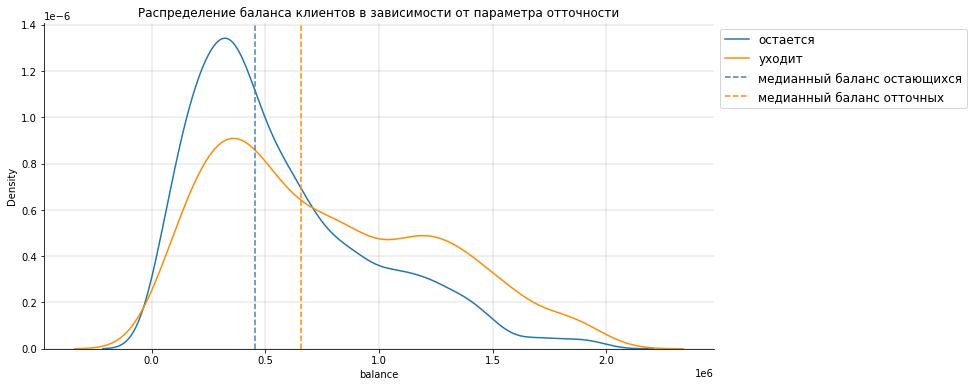

In [155]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data[data['churn']==0].query(condition), x='balance', ax=ax, 
            fill=False, common_norm=False, label='остается')
sns.kdeplot(data=data[data['churn']==1].query(condition), x='balance', ax=ax, color='darkorange',
            fill=False, common_norm=False, label='уходит')
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение баланса клиентов в зависимости от параметра отточности")
plt.axvline(x=data[data['churn']==0].query(condition)['balance'].median(), 
            color='steelblue', linestyle='--', label='медианный баланс остающихся')
plt.axvline(x=data[data['churn']==1].query(condition)['balance'].median(), 
            color='darkorange', linestyle='--', label='медианный баланс отточных')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12);

Медианный баланс уходящего клиента выше, чем остающегося. Клиенты в обоих случаях также делятся на 3 группы, однако в случае с уходящими клиентами, среди них доля клиентов, относящихся к группам с суммами 1,2 млн и 1,8 млн рублей на счетах, выше, чем для остающихся клиентов.

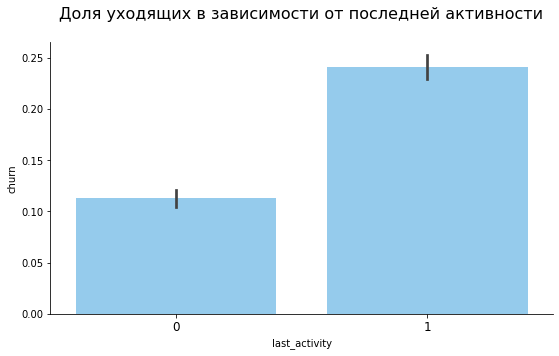

In [156]:
bar_plot(data, "last_activity", "churn", None, np.mean, color='lightskyblue',
         title='Доля уходящих в зависимости от последней активности')

Удивительно, что доля уходящих клиентов выше среди тех, кто проявлял активность в последнее время. Возможно, эта активность и была связана с прекращением пользованием услуг банком.

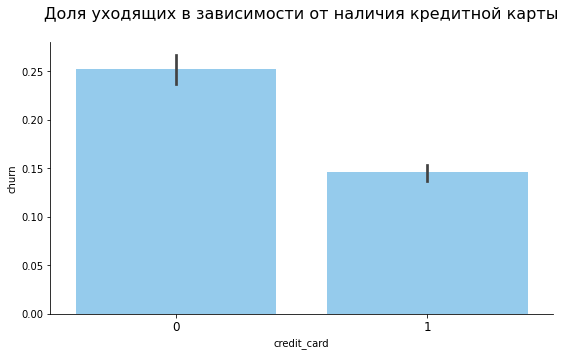

In [157]:
bar_plot(data, "credit_card", "churn", None, np.mean, color='lightskyblue',
         title='Доля уходящих в зависимости от наличия кредитной карты')

Клиенты, у которых есть кредитная карта, в среднем реже уходят в отток.

Проведем дополнительный "трехмерный" анализ исходя из взаимосвязей параметров, видимой на общей матрице корреляций и полученных в углубленном анализе.

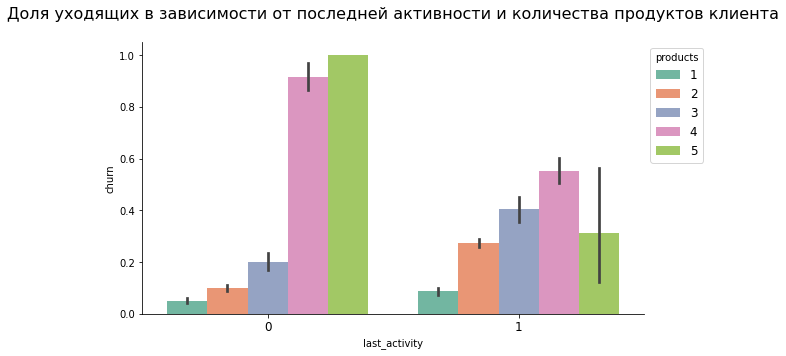

In [158]:
bar_plot(data, "last_activity", "churn", "products", np.mean, 
         title='Доля уходящих в зависимости от последней активности и количества продуктов клиента')

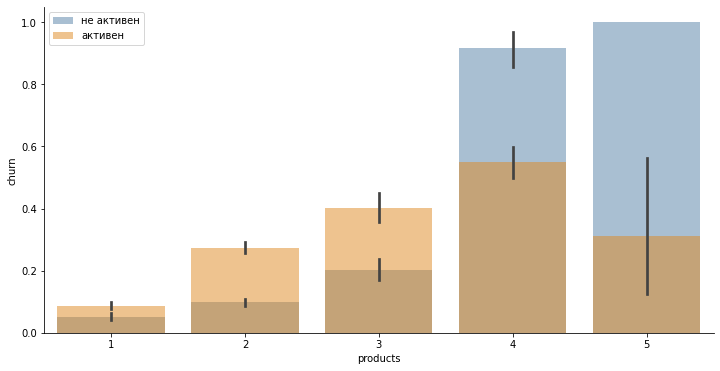

In [160]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data[data['last_activity'] == 0], x='products', y='churn', 
            color='steelblue', label='не активен', alpha=.5, ax=ax)
sns.barplot(data=data[data['last_activity'] == 1], x='products', y='churn', 
            color='darkorange', label='активен', alpha=.5, ax=ax)
plt.legend();

В этом разрезе особенно сильно выделются две группы пользователей: неактивные в последнее время клиенты, пользующиеся 4 или 5 продуктами (~90% и ~100% отточных клиентов соответственно).

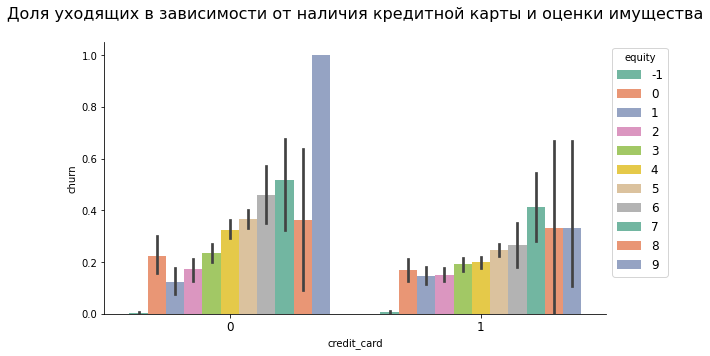

In [161]:
bar_plot(data, "credit_card", "churn", "equity", np.mean,
         title='Доля уходящих в зависимости от наличия кредитной карты и оценки имущества')

В этом разрезе видно, что практически все клиенты без кредитной карты и с оценкой имущества в 9 ед. - отточные.

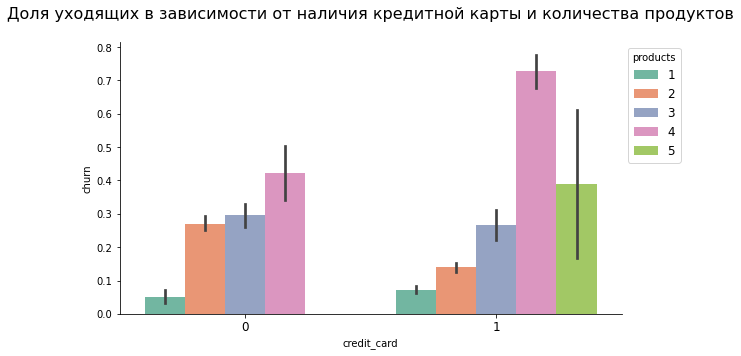

In [162]:
bar_plot(data, "credit_card", "churn", "products", np.mean,
         title='Доля уходящих в зависимости от наличия кредитной карты и количества продуктов')

Следующая самая многочисленная группа по оттоку: клиенты-владельцы кредитных карт, пользующиеся 4-мя продуктами банка.

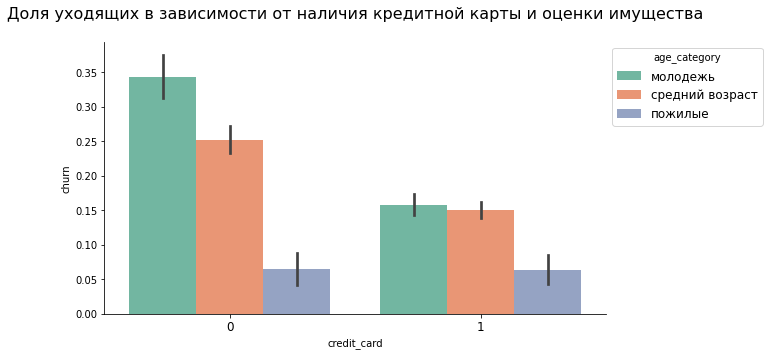

In [163]:
bar_plot(data, "credit_card", "churn", "age_category", np.mean,
         title='Доля уходящих в зависимости от наличия кредитной карты и оценки имущества')

В данном разрезе дополнительно подтверждается отмеченная связь параметра оттока клиента и его возрастной группы.

**Таким образом,**
1. *Общая доля отточных клиентов - 18%*
2. *Доля отточных клиентов в Ярославле и Великом Ростове одинакова - 19%, в Рыбинске она ниже - 16%.*
3. ***Самая высокая доля отточных клиентов - среди молодежи (21%),*** *меньшая - среди пожилых (6%).*
4. ***Больше всего уходящих среди мужчин*** *(23% против 13%).*
5. *Медианный баланс отточного клиента выше баланса стандартного клиента банка.*
6. ***Медианный кредитный скоринг отточного клиента выше стандартного клиента банка.***
7. *Доля уходящих клиентов выше среди тех, кто проявлял активность в последнее время (24% против 11%).*
8. *Доля уходящих клиентов меньше среди владельцев кредитных карт (14% против 25%).*
9. ***Самой низкой отточностью (около 1%) обладает группа клиентов с пропусками в столбце balance.***
10. *Наблюдается тентенция роста оттока с повышением оценки имущества клиента. Есть особенности с клиентами с оценкой имущества в 8 ед.*
11. *В разрезе по количеству продуктов,* ***самая высокая доля уходящих клиентов среди пользователей 4-х продуктов.*** *Слебующие в списке - пользователи 5-и продуктов.*
12. ***Крайне высокий отток у неактивных клиентов, владеющих 4-мя или 5-ю продуктами*** *(90% и 100% внутри группы соответсвенно).*
13. ***Практически все клиенты без кредитной карты и с оценкой имущества в 9 ед. - отточные.***
14. *Среди клиентов-владельцев кредитных карт наибольший отток у пользователей в-х продуктов банка (более 70%).*
15. *Сильнее всего отток коррелирует с параметрами `balance_flag`, `gender`, `products`, `last_activity` и `score`.*

## Проверка статистических гипотез

Проверим следующие гипотезы.

***Гипотеза №1:*** *существует разница в возрасте между клиентами, которые пользуются двумя продуктами банка, и клиентами, которые пользуются только одним.*

Переведём на математический язык. Пусть средний возраст клиентов - это переменная `age`, под `age[prod=2]` будем понимать средний возраст клиентов, которые пользуются двумя продуктами банка. Тогда:

**Н0:** `age[prod=2] - age[prod=1] = 0` (т.е. нет разницы между средним возрастом клиентов с одним продуктом и клиентов с двумя)

**Н1:** `age[prod=2] - age[prod=1] != 0` (т.е. разница есть)

В исследовательском анализе при получении портрета отточного клиента было выявлено, что средний доход отточного клиента выше, чем у стандартного клиента банка. Проверим, что эта разница статистически существена.

***Гипотеза №2:*** *существует разница между средним доходом отточного и неотточного клиента.*

**Н0:** `est_salary[churn=1] - est_salary[churn=0] = 0` (т.е. нет разницы м/у доходами уходящего и остающегося клиентов)

**Н1:** `est_salary[churn=1] - est_salary[churn=0] != 0` (т.е. разница есть)

### Формирование выборок

In [164]:
# формируем генеральные совокупности для первой гипотезы
prod2_sample = data.loc[data['products'] == 2, 'age']
prod1_sample = data.loc[data['products'] == 1, 'age']

# выведем количество наблюдений в каждом случае и сравним их размеры
print('Общий размер набора:', (len(prod2_sample) + len(prod1_sample)))
print('Количество клиентов с двумя продуктами:', 
      len(prod2_sample), 
      f'({(len(prod2_sample) / (len(prod2_sample) + len(prod1_sample))):.0%})'
     )
print('Количество клиентов с одним продуктом:', 
      len(prod1_sample),
      f'({(len(prod1_sample) / (len(prod2_sample) + len(prod1_sample))):.0%})'
     )

Общий размер набора: 8357
Количество клиентов с двумя продуктами: 5070 (61%)
Количество клиентов с одним продуктом: 3287 (39%)


*Обе совокупности небольшие, формировать из них отдельные выборки необязательно.*

In [165]:
# формируем генеральные совокупности для второй гипотезы
churn0_sample = data.loc[data['churn'] == 0, 'est_salary']
churn1_sample = data.loc[data['churn'] == 1, 'est_salary']

# выведем количество наблюдений в каждом случае и сравним их размеры
print('Общий размер набора:', (len(churn0_sample) + len(churn1_sample)))
print('Количество остающихся клиентов:', 
      len(churn0_sample), 
      f'({(len(churn0_sample) / (len(churn0_sample) + len(churn1_sample))):.0%})'
     )
print('Количество отточных клиентов:', 
      len(churn1_sample),
      f'({(len(churn1_sample) / (len(churn0_sample) + len(churn1_sample))):.0%})'
     )

Общий размер набора: 9853
Количество остающихся клиентов: 8084 (82%)
Количество отточных клиентов: 1769 (18%)


*Формировать отдельные выборки также не обязательно.*

### Выбор методов статистического теста

#### Для первой гипотезы

Совокупности для первой гипотезы небольшие, генерировать дополнительные выборки по причине их размера не обязательно. Оценим совокупности на наличие выбросов.

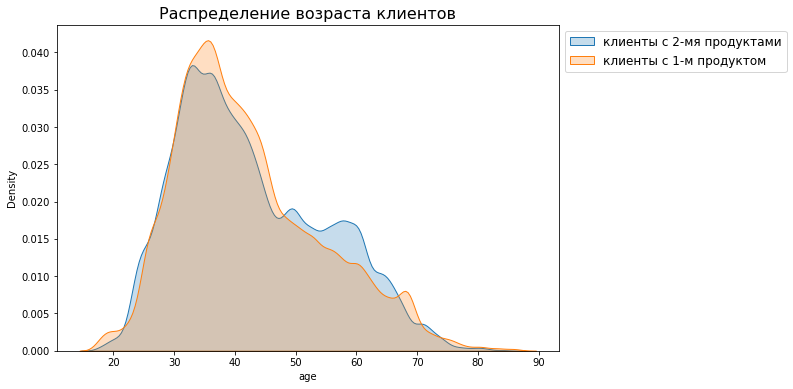

In [166]:
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(prod2_sample, shade=True, ax=ax, bw_adjust=0.5, label='клиенты с 2-мя продуктами')
sns.kdeplot(prod1_sample, shade=True, ax=ax, bw_adjust=0.5, label='клиенты с 1-м продуктом')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12)
plt.title('Распределение возраста клиентов', fontsize=16);

В обоих случаях отсутствуют сильные выбросы, однако произведем проверку критерием Шапиро-Уилка.

In [167]:
# для удобства вывода в цилке, добавим фреймам имена
prod2_sample.name = 'users_of_2_products'
prod1_sample.name = 'users_of_1_products'

for sample in [prod2_sample, prod1_sample]:
    
    # проведем тест
    results = st.shapiro(sample)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

    print(f'p-значение для набора {sample.name}:', p_value)
    
    # возьмем стандартный уровень значимости: 0.05 
    if p_value < 0.05:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
        print()
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
        print()

p-значение для набора users_of_2_products: 1.3087621198381776e-34
Отвергаем нулевую гипотезу: распределение не нормально

p-значение для набора users_of_1_products: 4.3308777863955726e-30
Отвергаем нулевую гипотезу: распределение не нормально



/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



Тем не менее, эти наборы не подходят для t-теста, если их использовать целиком. Эта проблема решается или использованием теста Манна-Уитни, или проведением теста по выборкам из наборов. Чтобы использовать в тесте все данные, **будем проводить исследование тестом Манна-Уитни.**

#### Для второй гипотезы

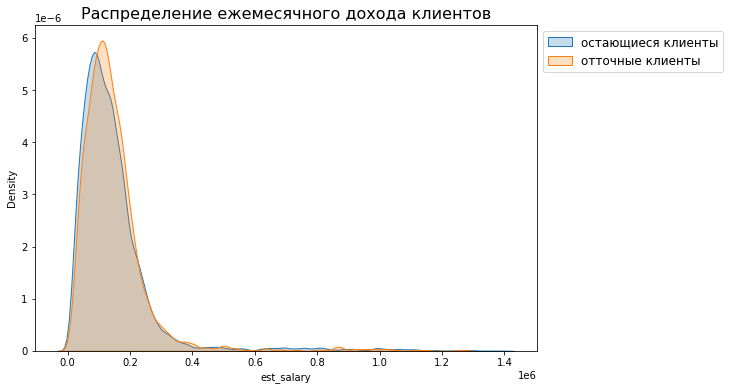

In [168]:
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(churn0_sample, shade=True, ax=ax, bw_adjust=0.5, label='остающиеся клиенты')
sns.kdeplot(churn1_sample, shade=True, ax=ax, bw_adjust=0.5, label='отточные клиенты')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12)
plt.title('Распределение ежемесячного дохода клиентов', fontsize=16);

Распределения в обоих случаях похожи, но имеют длинный хвост выбросов. По этой причине:
1. **воспользуемся тестом Манна-Уитни**,
2. **проведем проверку на двух вариантах данных: на начальных по всему датасету и отдельно для случая среднестатистического клиента**.

In [169]:
# сформируем для проверки второй гипотезы дополнительный набор данных
# формируем генеральные совокупности для второй гипотезы
churn0_mean_sample = data.query(condition).loc[data['churn'] == 0, 'est_salary']
churn1_mean_sample = data.query(condition).loc[data['churn'] == 1, 'est_salary']

# выведем количество наблюдений в каждом случае и сравним их размеры
print('Общий размер набора:', (len(churn0_mean_sample) + len(churn1_mean_sample)))
print('Количество остающихся клиентов:', 
      len(churn0_mean_sample), 
      f'({(len(churn0_mean_sample) / (len(churn0_mean_sample) + len(churn1_mean_sample))):.0%})'
     )
print('Количество отточных клиентов:', 
      len(churn1_mean_sample),
      f'({(len(churn1_mean_sample) / (len(churn0_mean_sample) + len(churn1_mean_sample))):.0%})'
     )

Общий размер набора: 7144
Количество остающихся клиентов: 5607 (78%)
Количество отточных клиентов: 1537 (22%)


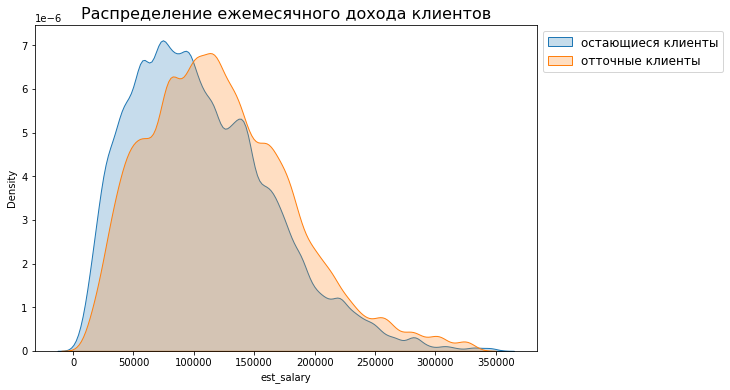

In [170]:
# посмотрим дополнительно на распределение очищенных данных
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(churn0_mean_sample, shade=True, ax=ax, bw_adjust=0.5, label='остающиеся клиенты')
sns.kdeplot(churn1_mean_sample, shade=True, ax=ax, bw_adjust=0.5, label='отточные клиенты')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12)
plt.title('Распределение ежемесячного дохода клиентов', fontsize=16);

***Для проверки обеих гипотез воспользуемся стандартным уровнем статистической значимости: 0.05.***

In [171]:
# укажем уровень стат. значимости
alpha = .05

### Статистические тесты

#### Проверка гипотезы №1

In [172]:
# проведем тест
res = st.mannwhitneyu(prod2_sample, prod1_sample)
# посчитаем относительную разницу значений
diff = prod2_sample.mean() / prod1_sample.mean() - 1

# найдём р-value
print('p-value:', '{0:.6f}'.format(res.pvalue))

# выберем результат теста о выдвигаемых гипотезах
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено')

# выведем разницу
print('Относительное изменение:', f"{diff:.2%}")

p-value: 0.074483
Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено
Относительное изменение: 1.30%


Согласно результатам теста, нет оснований говорить, что существует статистически значимая разница между возрастом клиента, пользующегося двумя продуктами, и клинта, пользующимся только одним продуктом.

In [173]:
# отобразим средние значения для обеих групп
print('Средний возраст пользователя одного продукта:', round(prod1_sample.mean(), 1))
print('Средний возраст пользователя двух продукта:', round(prod2_sample.mean(), 1))

Средний возраст пользователя одного продукта: 42.2
Средний возраст пользователя двух продукта: 42.8


#### Проверка гипотезы №2

##### Проверка по всем данным

In [174]:
# проведем тест
res = st.mannwhitneyu(churn0_sample, churn1_sample)
# посчитаем относительную разницу значений
diff = churn0_sample.mean() / churn1_sample.mean() - 1
diff_median = churn0_sample.median() / churn1_sample.median() - 1

# найдём р-value
print('p-value:', '{0:.2g}'.format(res.pvalue))

# выберем результат теста о выдвигаемых гипотезах
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено')

# выведем разницу
print()
print('Относительное изменение:', f"{diff:.2%}")
print('Относительная разница медианного значения:', f"{diff_median:.2%}")

p-value: 0.00054
Отвергаем нулевую гипотезу: разница статистически значима

Относительное изменение: 0.25%
Относительная разница медианного значения: -5.70%


Согласно результатам теста по всем данным, существует статистически значимая разница между доходом уходящего клиента и доходом остающегося клиента.

In [175]:
# отобразим средние значения для обеих групп
print('Средний доход остающегося клиента:', round(churn0_sample.mean(), 1))
print('Средний доход отточного клиента:', round(churn1_sample.mean(), 1))
print()
print('Медианный доход остающегося клиента:', round(churn0_sample.median(), 1))
print('Медианный доход отточного клиента:', round(churn1_sample.median(), 1))

Средний доход остающегося клиента: 147650.2
Средний доход отточного клиента: 147283.1

Медианный доход остающегося клиента: 118080.6
Медианный доход отточного клиента: 125222.1


#### Проверка по данным среднестатистических клиентов

In [176]:
# проведем тест
res = st.mannwhitneyu(churn0_mean_sample, churn1_mean_sample)
# посчитаем относительную разницу значений
diff = churn0_mean_sample.mean() / churn1_mean_sample.mean() - 1
diff_median = churn0_mean_sample.median() / churn1_mean_sample.median() - 1

# найдём р-value
print('p-value:', '{0:.2g}'.format(res.pvalue))

# выберем результат теста о выдвигаемых гипотезах
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимой разницы не обнаружено')

# выведем разницу
print()
print('Относительное изменение:', f"{diff:.2%}")
print('Относительная разница медианного значения:', f"{diff_median:.2%}")

p-value: 2.8e-20
Отвергаем нулевую гипотезу: разница статистически значима

Относительное изменение: -12.55%
Относительная разница медианного значения: -15.22%


Согласно результатам теста по очищенным данным, существует статистически значимая разница между доходом уходящего клиента и доходом остающегося клиента.

In [177]:
# отобразим средние значения для обеих групп
print('Средний доход остающегося клиента:', round(churn0_mean_sample.mean(), 1))
print('Средний доход отточного клиента:', round(churn1_mean_sample.mean(), 1))
print()
print('Медианный доход остающегося клиента:', round(churn0_mean_sample.median(), 1))
print('Медианный доход отточного клиента:', round(churn1_mean_sample.median(), 1))

Средний доход остающегося клиента: 106506.4
Средний доход отточного клиента: 121788.2

Медианный доход остающегося клиента: 97861.1
Медианный доход отточного клиента: 115429.0


В обоих вариантах теста получаем, что существует статистически значимое отличие между доходом клиента отточного и неотточного.

## Сегментация клиентов

### Отбор признаков для сегментации

Два основных требуемых признака для сегментации - это количество используемых продуктов и отток клиентов. Количество продуктов, исходя из проведенного корреляционного анализа, сильнее всего взаимосвязано с наличием у клиента кредитной карты (коэф. корреляции 0.25) и признаком balance_flag (0.49). Отток тоже сильно связан с признаком balance_flag (0.25) и полом клиента (0.18), а также кредитным скорингом, оценкой имущества, кол-вом продуктов, признаком `last_activity` и возрастной группой клиента. Сегменты будем строить из разных комбинаций этих параметров.

Критерии, которыми будем руководствоваться для итогового формирования сегментов:
1. в сегмент попадает около 300-3000 человек
2. сегмент характеризуется выраженным оттоком (т.е. значительно выше, чем среднестатистические 20%) или наоборот, заметно более низким оттоком

### Формирование сегментов

Выделяется относительно всего датасета группа клиентов с пропусками в столбце `balance`, поэтому имеет смысл эту группу выделить в отдельный сегмент. Проверим, что полученная группа будет удовлетворять требованиям выше.

In [178]:
# сформируем отдельный датасет
segment_1 = data[data['balance_flag'] == 1].copy()

In [179]:
# проверим на выполнение критериев
two_req_check(segment_1)

Количество клиентов в сегменте: 2245
Критерий по количеству клиентов соблюден.

Доля отточных клиентов: 0.53%
Критерий по доле отточных соблюден.


Кроме того, из исследовательского анализа известно, что данная группа клиентов отличается от остальных и по другим критериям: по доходу и распределению по количеству продуктов.

Следующий сегмент сформируем на основе количества продуктов и наличия у клиента кредитной карты. В этом разрезе доля оттока сильно выделяется у группы клиентов, владеющих кредитной картой и пользующихся 4-мя продуктами банка.

In [180]:
# сформируем отдельный датасет
segment_2 = data[(data['products'] == 4) & (data['credit_card'] == 1)].copy()

In [181]:
# проверим на выполнение критериев
two_req_check(segment_2)

Количество клиентов в сегменте: 308
Критерий по количеству клиентов соблюден.

Доля отточных клиентов: 72.73%
Критерий по доле отточных соблюден.


Высокая доля отточных также представлена среди клиентов, владющих 4-5 продуктами и в последнее время не проявляющих активности.

In [182]:
# сформируем отдельный датасет
segment_3 = data[((data['products'] == 4) | (data['products'] == 5)) & (data['last_activity'] == 0)].copy()

In [183]:
# проверим на выполнение критериев
two_req_check(segment_3)

Количество клиентов в сегменте: 98
Критерий по количеству клиентов не соблюден.

Доля отточных клиентов: 91.84%
Критерий по доле отточных соблюден.


В данном случае не выполнен первый критерий, поэтому не будем из этой выделяющейся группы формировать отдельный сегмент. В таком случае рассмотрим группу клиентов, у которых нет кредитной карты, а их оценка имущества составляет 9 ед.

In [184]:
# сформируем отдельный датасет
segment_3 = data[((data['equity'] == 9)) & (data['credit_card'] == 0)].copy()

In [185]:
# проверим на выполнение критериев
two_req_check(segment_3)

Количество клиентов в сегменте: 4
Критерий по количеству клиентов не соблюден.

Доля отточных клиентов: 100.00%
Критерий по доле отточных соблюден.


Попробуем выделить в отдельный сегмент клиентов, в зависимости от их кредитного скоринга. Из анализа оттока отмечено, что пониженный отток наблюдается у групп со скорингом до 770 баллов. Кроме того, чтобы не было пересечений с первым сегментом, выберем тех пользователей, для которых присутствует информация о балансе.

In [186]:
# сформируем отдельный датасет
segment_3 = data[(data['score_rating'].isin(range(600, 780, 10))) & (data['balance_flag'] != 1)].copy()

In [187]:
# проверим на выполнение критериев
two_req_check(segment_3)

Количество клиентов в сегменте: 979
Критерий по количеству клиентов соблюден.

Доля отточных клиентов: 8.38%
Критерий по доле отточных соблюден.


### Характеризация сегментов

#### Сегмент 1

В этот сегмент входят клиенты с пропуском в данных о балансе.

Медианный кредитный скоринг: 902 (по всему датасету: 852)
Средний возраст клиента: 42 (по всему датасету: 43)
Медианный доход клиента: 174838 (по всему датасету: 119460)


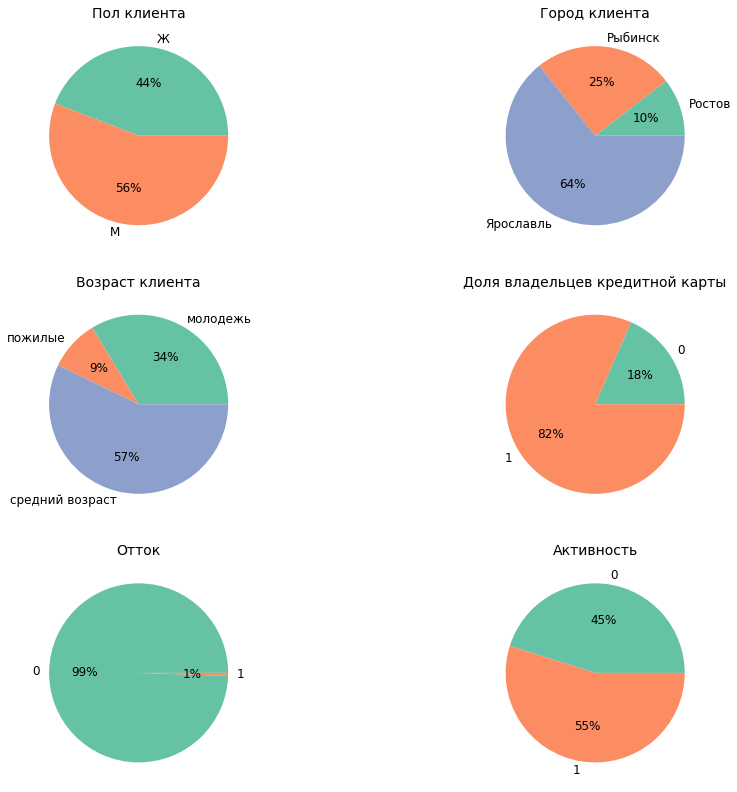

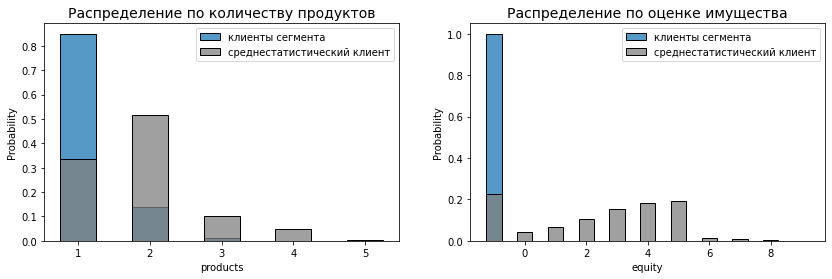

In [188]:
segment_character(data, 'balance_flag == 1')

Первый сегмент характеризуется самыми лояльными клиентами (отток 1%), к нему относятся в основном люди владеющие кредитными картами (82%) и пользующиеся только одним продуктом банка (80%), кроме того у сегмента повышенный кредитный скоринг и доход.

#### Сегмент 2

В этот сегмент входят пользователи 4-х продуктов, владеющие кредитной картой.

Медианный кредитный скоринг: 881 (по всему датасету: 852)
Средний возраст клиента: 39 (по всему датасету: 43)
Медианный доход клиента: 131758 (по всему датасету: 119460)
Медианный баланс клиента: 1015122 (по всему датасету: 522630)


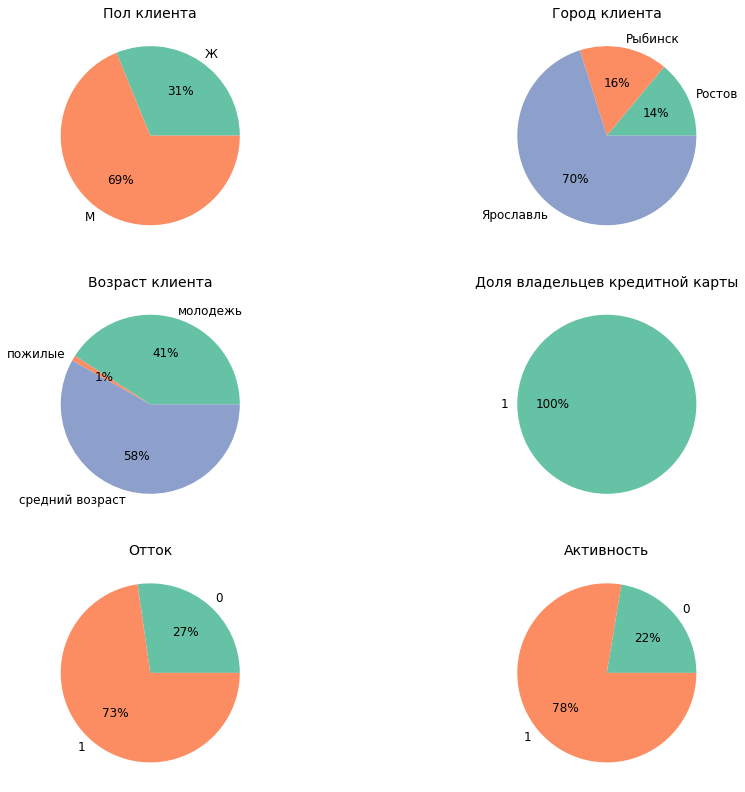

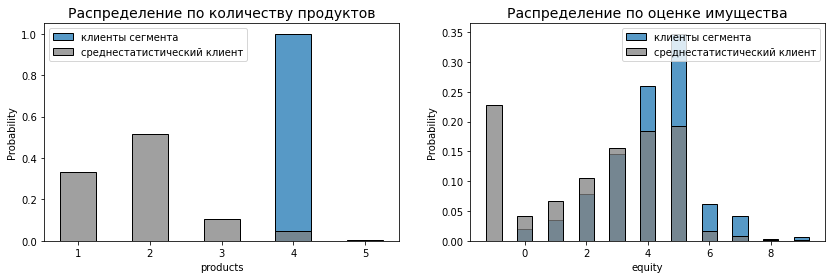

In [189]:
segment_character(data, 'products == 4 and credit_card == 1')

В этом сегменте присутствуют в основном мужчины-жители Ярославля, которые недавно были активны, среди этих клиентов практически нет пожилых людей. Кроме того, данные клиенты характеризуются в среднем повышенной оценкой имущества и более высоким балансом на счетах банка.

#### Сегмент 3

В этот сегмент входят клиенты с низким кредитным скорингом.

Медианный кредитный скоринг: 765 (по всему датасету: 852)
Средний возраст клиента: 43 (по всему датасету: 43)
Медианный доход клиента: 88858 (по всему датасету: 119460)
Медианный баланс клиента: 319920 (по всему датасету: 522630)


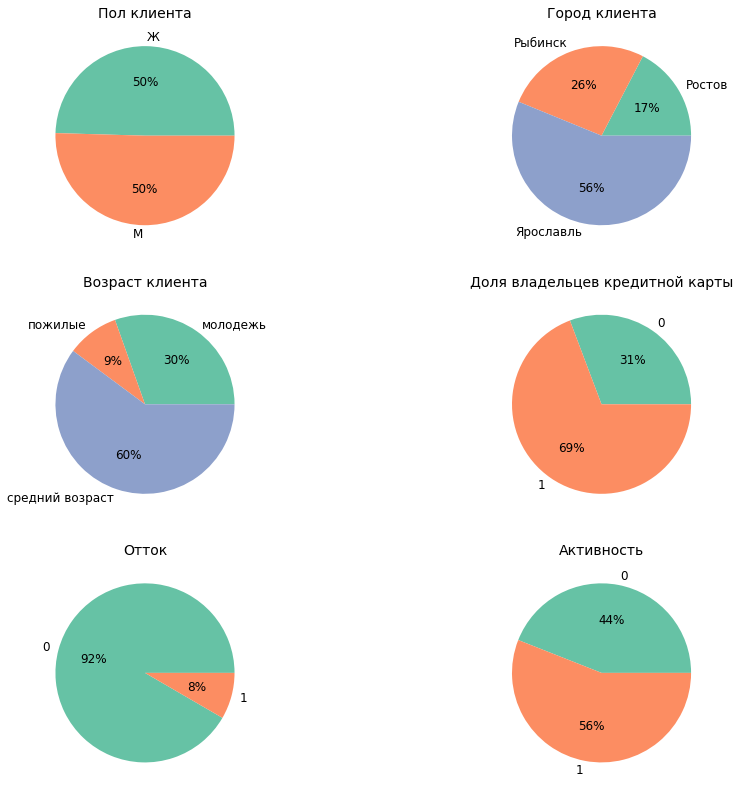

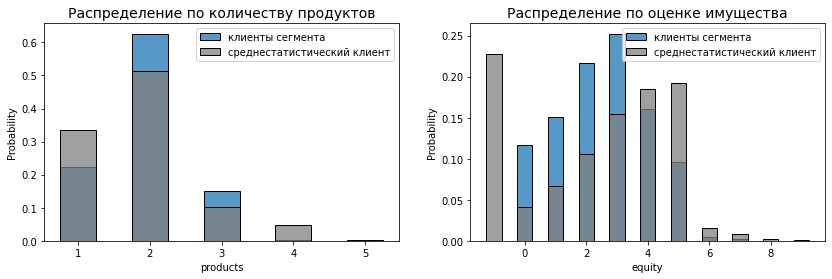

In [190]:
segment_character(data, 'score_rating < 780 and balance_flag != 1')

Клиенты характеризуются низким оттоком, низкой оценкой имущества, ровно как и низкими балансом и доходом. Кроме того, среди них больше пользователей 2-х и 3-х продуктов в сравнении со среднестатистическим клиентом.

## Выводы и рекомендации

### Выводы исследовательского анализа

<font size="4"><b>Общие выводы:</b></font>

**Общие наблюдения о клиентах банка:**
1. *В датасете присутствует группа людей, у которых отсутствуют данные о балансе на счетах банка. Эти клиенты выделяются в среднем более высокими доходом и лояльностью, практически все они являются пользователями одного продукта. Кроме того, почти для всех этих клиентов признак `equity` указан равным нулю, что является подозрительным, с учетом их высокого дохода. Вероятно, т.к. данные в столбце `equity` заполняются исходя из внешней ML модели, то на самом деле значение `equity` для этой группы неизвестно. Возможно, это отдельныя особая группа клиентов банка, информация об имуществе которых хранится в отдельной БД.*
2. *Как и ожидалось, большинство клиентов находятся в Ярославле.*
3. *В банке одинаковое количество женщин и мужчин.*
4. ***В основном клиенты - люди среднего возраста.*** *Кроме того, их можно разделить на подгруппы: 30-40 лет (самая многочисленная группа) и 55-60 лет.*
5. ***Клиенты пользуются в основном не более, чем 2 продуктами*** *(85%). Более половины клиентов используют ровно 2 продукта банка.*
6. ***Доход*** *клиента в месяц в среднем составляет* ***80-120 тыс. рублей.***
7. ***Имущество клиента оценивается средне:*** *около 3-5 баллов или меньше. Большую оценку получают редко.*
8. ***Большинство клиентов хранят на счетах около 400-500 тыс. рублей.*** *Присутствует ещё 2 подгруппы: 1,2-1,4 млн рублей и около 1,8 млн рублей.*
9. ***Медианный кредитный балл - 852.*** *Клиенты делятся на 3 подгруппы: "средний рейтинг" - 790-820 баллов, "повышенный рейтинг" - 840-860 баллов и "высокий рейтинг" - 880-910 баллов.*
10. ***Большинство клиентов банка пользуются кредитной картой (68%).***
11. *Средний возраст клиентов женского пола выше, чем мужского (45 лет и 40).*
12. *Среди женщин меньше владельцев кредитных карт, чем среди мужчин (значения долей отличаются на ~10%). Эта тенденция не меняется с возрастом клиента.*
13. *Чем старше клиент, тем менее охотно он пользуется кредитной картой.*
14. *Средний возраст клиентов женского пола выше, чем мужского.*
15. *Клиенты в возрасте до 25 лет хранят ограниченные суммы на счетах банка (медианное значение - 77 тыс. рублей против 530 тыс. для среднестатистического клиента).*
16. *Самый высокий ежемесячный доход в среднем имеют клиенты среднего возраста, следующими идут молодые клиенты, на последнем месте - пожилые.*
17. *Самый высокий ежемесячный доход - в Ярославле. Следующий в рейтинге - Рыбинск, затем - Ростов Великий.*
18. *Больше всего владельцев кредитных карт среди клиентов Ярославля (70%). Меньше всего - Ростова Великого (55%).*
19. *Среди клиентов, для которых отсутствует информация о балансе на их счетах, доля владельцев кредитной карты повышена: около 80%.*
20. *Клиенты с оценкой имущества в 8 единиц характеризуются значительно пониженой долей владельцев кредитной карты - менее 40%.*
21. *Все клиенты, пользующиеся 5-ю продуктами банка, владеют кредитной картой.*
22. *Среди клиентов, пользующихся только 3-мя продуктами банка, менее 40% владеют кредитной картой.*
23. *Среди клиентов с 5-ю продуктами 17% - это клиенты с суммой около 1 млн рублей на счетах. Среди клиентов, пользующихся только 1-м продуктом, 58% - это клиенты с отсутствием данных о их балансе.*
24. *Не считая клиентов с пропусками в данных о балансе, клиенты, пользующиеся 4-мя продуктами, в среднем имеют более высокий доход (медиана: более 120 тыс. рублей против 105 тыс.).*
25. *Не считая клиентов с пропусками в данных о балансе, клиенты с одним продуктом обладают в среднем более низкой оценкой имущества.*
26. *Клиенты с более высокой оценкой имущества в среднем хранят большие суммы на счетах в банке.*
27. *Кредитный скоринг в среднем выше, если выше оценка имущества клиента.*
28. *Клиенты отделенной группы со значением equity = "-1" (клиенты с пропуском в балансе) обладают в среднем самым высоким кредитным скорингом.*
29. *Значительно более высокий медианный доход имеют клиенты, информация о балансе которых отсутствует в датасете.*
30. *В среднем, чем ниже доход клиента, тем больше вероятность, что и баланс на его счете будет невысок, однако эта зависимость слабая.*
31. *Практически никакой связи баланса от дохода нет для клиентов среднего возраста.*
32. *С ростом дохода клиента повышается нижняя граница кредитного скоринга, который получает клиент.*
33. *Чем выше баланс на счетах клиента, тем более высокий у него кредитный балл.*
34. *Кредитный скоринг меньше связан с балансом клиента, нежели оценка его имущества.*
35. *Самый высокий медианный кредитный балл у группы с пропусками в balance.*
36. *Чем выше оценка имущества клиента, тем выше его кредитный балл.*
37. *Колоссально отличается медианное значение баланса для группы с рейтингом около 1000 баллов (20 млн. рублей), однако в этой группе всего лишь 6 человек, которые хранят большие суммы на счетах, поэтому медианное значение для этой группы сильно выпадает.

**Об оттоке:**

***Особенности портрета отточного клиента:*** *это чаще всего молодой мужчина, а его баланс  и доход выше обычного клиента банка.*
1. *Общая доля отточных клиентов - 18%*
2. *Доля отточных клиентов в Ярославле и Великом Ростове одинакова - 19%, в Рыбинске она ниже - 16%.*
3. ***Самая высокая доля отточных клиентов - среди молодежи (21%),*** *меньшая - среди пожилых (6%).*
4. ***Больше всего уходящих среди мужчин*** *(23% против 13%).*
5. *Медианный баланс отточного клиента выше баланса стандартного клиента банка.*
6. ***Медианный кредитный скоринг отточного клиента выше стандартного клиента банка.***
7. *Доля уходящих клиентов выше среди тех, кто проявлял активность в последнее время (24% против 11%).*
8. *Доля уходящих клиентов меньше среди владельцев кредитных карт (14% против 25%).*
9. ***Самой низкой отточностью (около 1%) обладает группа клиентов с пропусками в столбце balance.***
10. *Наблюдается тентенция роста оттока с повышением оценки имущества клиента. Есть особенности с клиентами с оценкой имущества в 8 ед.*
11. *В разрезе по количеству продуктов,* ***самая высокая доля уходящих клиентов среди пользователей 4-х продуктов.*** *Слебующие в списке - пользователи 5-и продуктов.*
12. ***Крайне высокий отток у неактивных клиентов, владеющих 4-мя или 5-ю продуктами*** *(90% и 100% внутри группы соответсвенно).*
13. ***Практически все клиенты без кредитной карты и с оценкой имущества в 9 ед. - отточные.***
14. *Среди клиентов-владельцев кредитных карт наибольший отток у пользователей в-х продуктов банка (более 70%).*
15. *Сильнее всего отток коррелирует с параметрами `balance_flag`, `gender`, `products`, `last_activity` и `score`.*

**Проверенные статистические гипотезы:**
1. *Согласно результатам теста, нет оснований говорить, что существует статистически значимая разница между возрастом клиента, пользующегося двумя продуктами, и клинта, пользующимся только одним продуктом.*
2. *Согласно результатам теста, существует статистически значимое отличие между доходом отточного и неотточного клиента.*

<font size="4"><b>Сегментация:</b></font>

**Полученные сегменты:**
1. **Сегмент №1:** *группа клиентов с пропусками в столбце `balance`*.
2. **Сегмент №2:** *группа клиентов, владеющих кредитной картой и пользующихся 4-мя продуктами банка.*
3. **Сегмент №3:** *группа клиентов с кредитным скорингом до 770 баллов. Кроме того, чтобы не было пересечений с первым сегментом, выберем тех пользователей, для которых присутствует информация о балансе.*

**Характеристики сегментов:**
1. **Сегмент №1:** *характеризуется самыми лояльными клиентами (отток 1%), к нему относятся в основном люди владеющие кредитными картами (82%) и пользующиеся только одним продуктом банка (80%), кроме того у сегмента повышенный кредитный скоринг и доход.*
2. **Сегмент №2:** *присутствуют в основном мужчины-жители Ярославля, которые недавно были активны, среди этих клиентов практически нет пожилых людей, кроме того, данные клиенты характеризуются в среднем повышенной оценкой имущества и более высоким балансом на счетах банка.*
3. **Сегмент №3:** *характеризуется низким оттоком, низкой оценкой имущества, ровно как и низкими балансом и доходом, кроме того, среди них больше пользователей 2-х и 3-х продуктов в сравнении со среднестатистическим клиентом.*

### Рекомендации

* **Разработать новые предложения для клиентов с высоким доходом и большими суммами на счетах:**

1. В первую очередь важно уточнить, каким именно продуктом пользуются клиенты сегмента №1: несмотря на высокий доход, клиенты данного сегмента крайне лояльны, поэтому можно предложить этот же продукт и для остальных наших клиентов с высоким доходом.
2. Предложить услуги банковской ячейки: для хранения ценностей или денежных сумм, с акцентом на возможность сохранения сумм более, чем 1,4 млн рублей. (Актуально для сегмента №2.)
3. Так как отточные клиенты обладают повышенной оценкой имущества, то предложить клиентам страхование имущества. (Актуально для сегмента №2.)
4. Подготовить специальные предложения по кредитным картам: исходя из исследовательского анализа, доля отточных меньше среди клиентов, пользующихся кредитной картой. Упор сделать на молодых клиентов группы и на женщин, так как среди них наиболее низкая доля владельцев кредитных карт.


* **Экстенсивный маркетинг:**

1. Провести рекламную кампанию по привлечению новых клиентов с особой рекламой продукта, которым пользуются клиенты сегмента №1. (Направлено на привлечение клиентов по портрету сегмента №1).
2. Организовать реферальную программу: выделить пригласительные ссылки с выгодой как для нынешнего клиента банка, так и потенциального клиента. Спланировать 2 программы в зависимости от сегмента клиента. Программа для сегмента №1 должна быть ориентирована на клиентов с повышенным доходом, т.е. обладать VIP предложениями, специальными условиями по вкладам, инвестиционным тарифам. Программа для сегмента №3 - ориентир на бесплатное обслуживание карт, повышенные кэшбеки, продленный беспроцентный период для кредитных карт, дополнительные выплаты клиентам, по чьим ссылкам банк обрел новых клиентов.
3. Провести акцию со специальными условиями по кредитной и дебетовой карте: дополнительным кэшбеком, бесплатным обслуживанием или повышенной длительностью беспроцентного периода пользования кредитной картой.

### Визуализация результатов

Ссылка на [дашборд](https://public.tableau.com/views/clientsandproducts/sheet3?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link).


Ссылка на презентацию: https://disk.yandex.ru/i/z_xQ9U_cJ5ZBQA